In [3]:
import numpy as np
import pandas as pd
import random

from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt 
%matplotlib inline  

import seaborn as sns


In [4]:
def get_data():
    data = load_svmlight_file("diabetes_scale.txt")
    return data[0], data[1]

X, y = get_data()
# print(X)
# print(X.shape)

# print(y)
# print(y.shape)

X_array = X.toarray()
# print(X_array)
# print(X_array.shape)


In [5]:
n_samples, n_features = X.shape
print(n_samples, n_features)

768 8


# EDA

In [6]:
df_features= pd.DataFrame(X_array)
df_features.rename({0: 'Pregnancies',1:'Glucose',2:'BloodPressure',3:'SkinThickness',4:'Insulin',5:'BMI',6:'Diabetes_pedegree_Function',7:'Age'}, axis=1, inplace=True)
df_features

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0      -0.294118  0.487437       0.180328      -0.292929 -1.000000  0.001490   
1      -0.882353 -0.145729       0.081967      -0.414141 -1.000000 -0.207153   
2      -0.058824  0.839196       0.049180      -1.000000 -1.000000 -0.305514   
3      -0.882353 -0.105528       0.081967      -0.535354 -0.777778 -0.162444   
4      -1.000000  0.376884      -0.344262      -0.292929 -0.602837  0.284650   
..           ...       ...            ...            ...       ...       ...   
763     0.176471  0.015075       0.245902      -0.030303 -0.574468 -0.019374   
764    -0.764706  0.226131       0.147541      -0.454545 -1.000000  0.096870   
765    -0.411765  0.216080       0.180328      -0.535354 -0.735225 -0.219076   
766    -0.882353  0.266332      -0.016393      -1.000000 -1.000000 -0.102832   
767    -0.882353 -0.065327       0.147541      -0.373737 -1.000000 -0.093890   

     Diabetes_pedegree_Function       Age  
0                     -0.531170 -0.033333  
1                     -0.766866 -0.666667  
2                     -0.492741 -0.633333  
3                     -0.923997 -1.000000  
4                      0.887276 -0.600000  
..                          ...       ...  
763                   -0.920581  0.400000  
764                   -0.776260 -0.800000  
765                   -0.857387 -0.700000  
766                   -0.768574 -0.133333  
767                   -0.797609 -0.933333  

[768 rows x 8 columns]

Text(0.5, 1.0, 'Diabetes Patient')

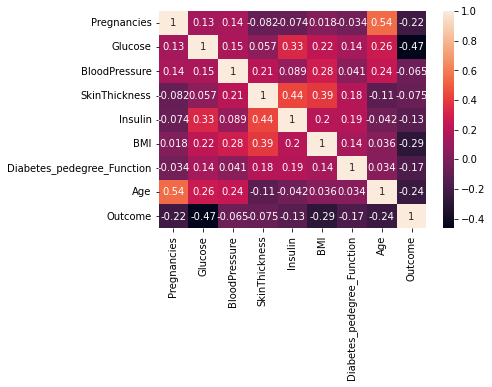

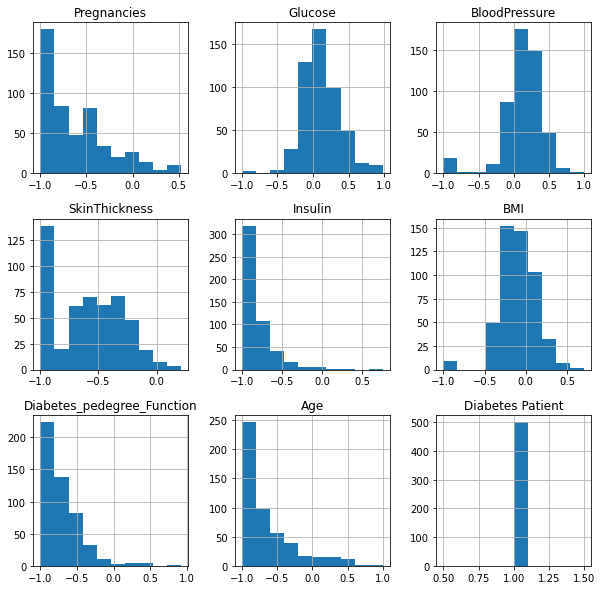

In [7]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# X = df_features[features].values
df_features['Outcome'] = y
# print(df_features)

sns.heatmap(df_features.corr(),annot=True)

p = df_features[df_features['Outcome']==1].hist(figsize = (10,10))
plt.title('Diabetes Patient')

# Basic Perceptron

In [8]:
np.random.seed(0)
m, n = X_array.shape
initial_weight_rand = np.random.rand(n)
initial_weight_normal = np.random.normal(size=(8,))
# print(len(initial_weight_rand))
# for w in initial_weight_rand:
#     print(w)
# for w in initial_weight_uniform[:5]:
#     print(w)

### initial_weight_rand = np.random.rand(n)

In [9]:
m = 3#len(y)
for i in range(m):
    print("Actual ",y[i])
    print('features ', X_array[i])
    print('zero one loss function', y[i]*np.dot(X_array[i],initial_weight_rand))# zero-one Loss Function
    print('zero one loss', (1 if y[i]*np.dot(X_array[i],initial_weight_rand)<0 else 0))
    print("xi*wi",np.sum(initial_weight_rand*X_array[i]))
    print("Prediction ",np.sign(np.sum(initial_weight_rand*X_array[i])))#Prediction to np.sign
    print("------")

Actual  -1.0
features  [-0.294118    0.487437    0.180328   -0.292929   -1.          0.00149028
 -0.53117    -0.0333333 ]
zero one loss function 0.5485743150369319
zero one loss 0
xi*wi -0.5485743150369319
Prediction  -1.0
------
Actual  1.0
features  [-0.882353  -0.145729   0.0819672 -0.414141  -1.        -0.207153
 -0.766866  -0.666667 ]
zero one loss function -2.252262800900816
zero one loss 1
xi*wi -2.252262800900816
Prediction  -1.0
------
Actual  -1.0
features  [-0.0588235  0.839196   0.0491803 -1.        -1.        -0.305514
 -0.492741  -0.633333 ]
zero one loss function 1.348729098346139
zero one loss 0
xi*wi -1.348729098346139
Prediction  -1.0
------


### initial_weight_normal = np.random.normal(size=(8,)) 

In [10]:
for i in range(10,15):
    print("Actual ",y[i])
    print('features ', X_array[i])
    print('zero one loss function', y[i]*np.dot(X_array[i],initial_weight_normal))
    print('zero one loss', (1 if y[i]*np.dot(X_array[i],initial_weight_rand)<0 else 0))
    
    print("xi*wi",np.sum(initial_weight_normal*X_array[i]))
    print("Prediction ",np.sign(np.sum(initial_weight_normal*X_array[i])))#Prediction to np.sign
    print("------")

Actual  1.0
features  [-0.529412  0.105528  0.508197 -1.       -1.        0.120715 -0.903501
 -0.7     ]
zero one loss function -2.66404868809322
zero one loss 1
xi*wi -2.66404868809322
Prediction  -1.0
------
Actual  -1.0
features  [ 0.176471  0.688442  0.213115 -1.       -1.        0.132638 -0.608027
 -0.566667]
zero one loss function 2.3629795956145427
zero one loss 0
xi*wi -2.3629795956145427
Prediction  -1.0
------
Actual  1.0
features  [ 0.176471  0.396985  0.311475 -1.       -1.       -0.19225   0.163962
  0.2     ]
zero one loss function -1.9095394015639777
zero one loss 1
xi*wi -1.9095394015639777
Prediction  -1.0
------
Actual  -1.0
features  [-0.882353   0.899497  -0.0163934 -0.535354   1.        -0.102832
 -0.726729   0.266667 ]
zero one loss function -0.19443236974760203
zero one loss 1
xi*wi 0.19443236974760203
Prediction  1.0
------
Actual  -1.0
features  [-0.411765  0.668342  0.180328 -0.616162 -0.586288 -0.230999 -0.565329
  0.      ]
zero one loss function 1.278393699

# Split Data into Training/Validation/Testing

In [11]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X_array, y, test_size=0.20,random_state=88)#,stratify=y,shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.20, random_state=88)#,stratify=y_trainval, shuffle=True)
print("Training Size :",X_train.shape)
print("Testing Size :",X_test.shape)
print("Validation Size :",X_val.shape)

Training Size : (491, 8)
Testing Size : (154, 8)
Validation Size : (123, 8)


In [50]:
def plot_graph(epoch, val_loss_list, train_loss_list, val_acc_list, train_acc_list, figsize=(10,5)):
    
    plt.figure(figsize=figsize)

    plt.subplot(2, 1, 1) 
    plt.title(f'loss curve')
    plt.plot(range(epoch),val_loss_list,label='validation loss')
    plt.plot(range(epoch),train_loss_list,label='training loss')
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.legend()
   
    plt.subplot(2, 1, 2) 
    plt.title(f'accuracy curve')
    plt.plot(range(epoch),val_acc_list,label='validation acc')
    plt.plot(range(epoch),train_acc_list,label='training acc')
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
def plot_graph_4(epoch, val_loss_list1,val_loss_list2, train_loss_list1, train_loss_list2,
                 val_acc_list1,val_acc_list2, train_acc_list1, train_acc_list2,figsize=(10,10)):
    
    fig, axs = plt.subplots(2, 2,figsize=(10,10))
    axs[0, 0].plot(range(epoch),val_loss_list1,label='validation loss')
    axs[0, 0].plot(range(epoch),train_loss_list1,label='training loss')
    axs[0, 0].set_title("loss curve with initial weight = uniform random")
    axs[1, 0].plot(range(epoch),val_acc_list1,label='validation acc')
    axs[1, 0].plot(range(epoch),train_acc_list1,label='training acc')
    axs[1, 0].set_title("acc curve with initial weight = uniform random")
#     axs[1, 0].sharex(axs[0, 0])
    axs[0, 1].plot(range(epoch),val_loss_list2,label='validation loss')
    axs[0, 1].plot(range(epoch),train_loss_list2,label='training loss')
    axs[0, 1].set_title("loss curve with initial weight = normal random")
    axs[1, 1].plot(range(epoch),val_acc_list2,label='validation acc')
    axs[1, 1].plot(range(epoch),train_acc_list2,label='training acc')
    axs[1, 1].set_title("acc curve with initial weight = normal random")
    fig.tight_layout()
   
#     plt.subplot(2, 1, 2) 
#     plt.title(f'accuracy curve')
#     plt.plot(range(epoch),val_acc_list,label='validation acc')
#     plt.plot(range(epoch),train_acc_list,label='training acc')
#     plt.xlabel("epoch")
#     plt.ylabel("accuracy")
#     plt.legend()
    
#     plt.tight_layout()
    plt.show()

def make_prediction(X,y,weight):
    prediction = []
    for j in X:
        activation_fuc = 0
        for i in range(len(j)):
            activation_fuc += (weight[i]*j[i])
        prediction.append(np.sign(activation_fuc))
    return np.array(prediction)

def zero_one_loss(X,y,weight):
    zero_one_loss = 0
    for i in range(len(y)):
        zero_one_loss += (1 if y[i]*np.dot(X[i],weight)<0 else 0)
    return zero_one_loss/len(y)


def update_weight(X,y,weight, lr=0.01):
    summation = 0
    for i in range(len(y)):
        summation += y[i]*X[i]*(1 if y[i]*np.dot(X[i],weight)<0 else 0) 
    weight += lr*summation
    return weight

# Base Model (epoch = 80, lr = 0.001) initial weight = rand(8)

In [111]:
np.random.seed(0)
initial_weight_rand_1 = np.random.rand(8)


epoch = 80
best_acc = 0
weight = initial_weight_rand_1
val_loss_list = []
train_loss_list = []
val_acc_list = []
train_acc_list = []
for i in range(epoch):
    weight = update_weight(X_train, y_train, weight, lr=0.001)

    y_train_pred = make_prediction(X_train, y_train, weight)
    y_val_pred = make_prediction(X_val, y_val, weight)

    train_acc = accuracy_score(y_train, y_train_pred)
    val_acc = accuracy_score(y_val, y_val_pred)
    
    train_acc_list.append(train_acc)
    val_acc_list.append(val_acc)

    train_loss = zero_one_loss(X_train, y_train, weight)
    val_loss = zero_one_loss(X_val, y_val, weight)
    
    train_loss_list.append(train_loss)
    val_loss_list.append(val_loss)

    
    if val_acc>best_acc:
        best_acc = val_acc
    
    print('weight ', weight)
    print('EPOCH %d'%(epoch) ,'ITERATION %d'%(i+1), f'LR 0.01')

    print('train acc: %.5f'%train_acc, 'val acc: %.5f'%val_acc, 
          'best acc: %.5f'%best_acc)
    print('train loss: %.5f'%train_loss, 'val loss: %.5f'%val_loss)
    
    print('----')

weight  [0.361637   0.73962153 0.62774699 0.36346904 0.16726237 0.61250217
 0.22687414 0.68647299]
EPOCH 80 ITERATION 1 LR 0.01
train acc: 0.31365 val acc: 0.24390 best acc: 0.24390
train loss: 0.68635 val loss: 0.75610
----
weight  [ 0.17734285  0.74279238  0.63815683  0.20143874 -0.0595887   0.57659011
  0.03978277  0.48387298]
EPOCH 80 ITERATION 2 LR 0.01
train acc: 0.26273 val acc: 0.25203 best acc: 0.25203
train loss: 0.73727 val loss: 0.74797
----
weight  [ 0.03934283  0.69673209  0.61743551  0.09200438 -0.20590548  0.53098058
 -0.07919075  0.32523964]
EPOCH 80 ITERATION 3 LR 0.01
train acc: 0.38900 val acc: 0.44715 best acc: 0.44715
train loss: 0.61100 val loss: 0.55285
----
weight  [-0.00771599  0.62164667  0.56476337  0.07572153 -0.22572582  0.49281962
 -0.0893291   0.26440629]
EPOCH 80 ITERATION 4 LR 0.01
train acc: 0.45214 val acc: 0.49593 best acc: 0.49593
train loss: 0.54786 val loss: 0.50407
----
weight  [-0.01918658  0.54393311  0.50887811  0.09082251 -0.20007334  0.4577

weight  [-0.19759829 -0.20582056  0.06343542 -0.12021827 -0.1267685  -0.17050388
 -0.21687317 -0.14669382]
EPOCH 80 ITERATION 54 LR 0.01
train acc: 0.64155 val acc: 0.68293 best acc: 0.79675
train loss: 0.35845 val loss: 0.31707
----
weight  [-0.12289239 -0.27585071  0.03435345 -0.02130919  0.00751991 -0.17669465
 -0.10729589 -0.06619382]
EPOCH 80 ITERATION 55 LR 0.01
train acc: 0.74134 val acc: 0.78049 best acc: 0.79675
train loss: 0.25866 val loss: 0.21951
----
weight  [-0.06836297 -0.2885693   0.02861574  0.03092313  0.08093834 -0.17542938
 -0.04804568 -0.01009382]
EPOCH 80 ITERATION 56 LR 0.01
train acc: 0.62525 val acc: 0.62602 best acc: 0.79675
train loss: 0.37475 val loss: 0.37398
----
weight  [-0.14624534 -0.24333312  0.05336985 -0.06436979 -0.0489671  -0.17639808
 -0.15799614 -0.09532715]
EPOCH 80 ITERATION 57 LR 0.01
train acc: 0.66191 val acc: 0.73171 best acc: 0.79675
train loss: 0.33809 val loss: 0.26829
----
weight  [-0.07389238 -0.30165472  0.02759935  0.02653928  0.0754

In [113]:

base_weight =  [-0.07383355 ,-0.24139846,  0.04499281 ,-0.00637991 , 0.04515345 ,-0.1788288,
 -0.09234288 ,-0.0162605 ]


y_test_pred_base = make_prediction(X_test, y_test, base_weight)

test_acc_base = accuracy_score(y_test, y_test_pred_base)

print('test acc: %.5f'%test_acc_base)


test acc: 0.79221


Accuracy: 0.792208
Precision: 0.841121
Recall: 0.857143
F1 score: 0.849057


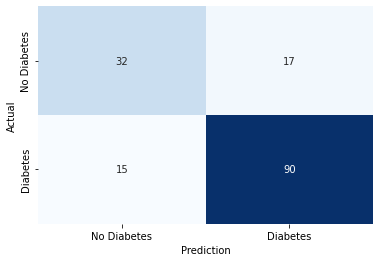

<Figure size 432x288 with 0 Axes>

In [115]:
accuracy = accuracy_score(y_test, y_test_pred_base ) # accuracy: (tp + tn) / (p + n)
print('Accuracy: %f' % accuracy)

precision = precision_score(y_test, y_test_pred_base) # precision tp / (tp + fp)
print('Precision: %f' % precision)

recall = recall_score(y_test, y_test_pred_base) # recall: tp / (tp + fn)
print('Recall: %f' % recall)

f1 = f1_score(y_test, y_test_pred_base) # f1: 2 tp / (2 tp + fp + fn)
print('F1 score: %f' % f1)

from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(y_test, y_test_pred_base)
ax = sns.heatmap(c_matrix, annot = True, xticklabels = ['No Diabetes', 'Diabetes'], yticklabels = ['No Diabetes', 'Diabetes'], cbar = False, cmap = 'Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()
plt.clf()

In [76]:
initial_weight_rand_1.shape

(8,)

sample= 768 and feature = 8
EPOCH 80 ITERATION 80 LR 0.001


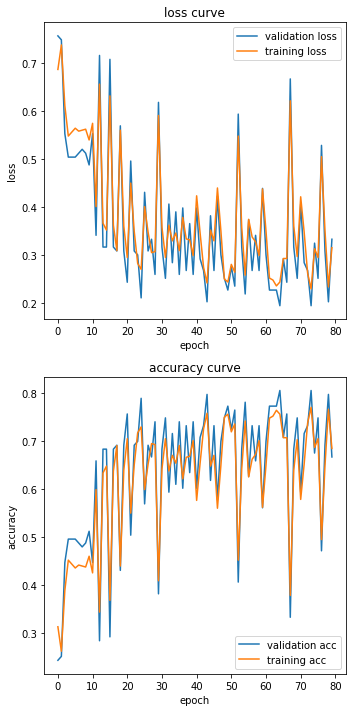

In [77]:
print(f'sample= {n_samples} and feature = {n_features}')
print('EPOCH %d'%(epoch) ,'ITERATION %d'%(i+1), f'LR 0.001')
plot_graph(epoch, val_loss_list, train_loss_list, val_acc_list, train_acc_list, figsize=(5,10))

# experiment 1  (epoch = 80, lr = 0.001) initial weight = normal  

In [78]:
np.random.seed(0)
initial_weight_normal_1 = np.random.normal(size=(8,))


epoch = 80
best_acc = 0
weight = initial_weight_normal_1
val_loss_list = []
train_loss_list = []
val_acc_list = []
train_acc_list = []
for i in range(epoch):
    weight = update_weight(X_train, y_train, weight, lr=0.001)

    y_train_pred = make_prediction(X_train, y_train, weight)
    y_val_pred = make_prediction(X_val, y_val, weight)

    train_acc = accuracy_score(y_train, y_train_pred)
    val_acc = accuracy_score(y_val, y_val_pred)
    
    train_acc_list.append(train_acc)
    val_acc_list.append(val_acc)

    train_loss = zero_one_loss(X_train, y_train, weight)
    val_loss = zero_one_loss(X_val, y_val, weight)
    
    train_loss_list.append(train_loss)
    val_loss_list.append(val_loss)

    
    if val_acc>best_acc:
        best_acc = val_acc
    print('EPOCH %d'%(epoch) ,'ITERATION %d'%(i+1), f'LR 0.01')

    print('train acc: %.5f'%train_acc, 'val acc: %.5f'%val_acc, 
          'best acc: %.5f'%best_acc)
    print('train loss: %.5f'%train_loss, 'val loss: %.5f'%val_loss)
    
    print('----')

EPOCH 80 ITERATION 1 LR 0.01
train acc: 0.36456 val acc: 0.32520 best acc: 0.32520
train loss: 0.63544 val loss: 0.67480
----
EPOCH 80 ITERATION 2 LR 0.01
train acc: 0.36864 val acc: 0.32520 best acc: 0.32520
train loss: 0.63136 val loss: 0.67480
----
EPOCH 80 ITERATION 3 LR 0.01
train acc: 0.36049 val acc: 0.30894 best acc: 0.32520
train loss: 0.63951 val loss: 0.69106
----
EPOCH 80 ITERATION 4 LR 0.01
train acc: 0.34216 val acc: 0.30081 best acc: 0.32520
train loss: 0.65784 val loss: 0.69919
----
EPOCH 80 ITERATION 5 LR 0.01
train acc: 0.36253 val acc: 0.39024 best acc: 0.39024
train loss: 0.63747 val loss: 0.60976
----
EPOCH 80 ITERATION 6 LR 0.01
train acc: 0.52138 val acc: 0.52846 best acc: 0.52846
train loss: 0.47862 val loss: 0.47154
----
EPOCH 80 ITERATION 7 LR 0.01
train acc: 0.56415 val acc: 0.61789 best acc: 0.61789
train loss: 0.43585 val loss: 0.38211
----
EPOCH 80 ITERATION 8 LR 0.01
train acc: 0.57637 val acc: 0.62602 best acc: 0.62602
train loss: 0.42363 val loss: 0.373

sample= 768 and feature = 8
EPOCH 80 ITERATION 80 LR 0.001


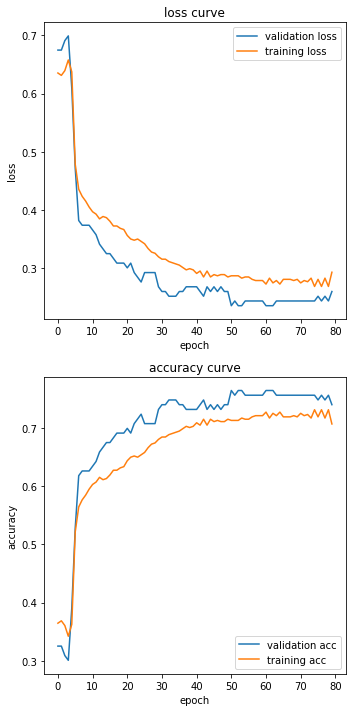

In [79]:
print(f'sample= {n_samples} and feature = {n_features}')
print('EPOCH %d'%(epoch) ,'ITERATION %d'%(i+1), f'LR 0.001')
plot_graph(epoch, val_loss_list, train_loss_list, val_acc_list, train_acc_list, figsize=(5,10))

In [56]:
initial_weight_normal_1.shape

(8,)

# Hyperparameter tuning with uniform random

# Experiment 2-add bias

In [80]:
np.random.seed(0)
initial_weight_b = np.random.rand(9)

In [58]:
bias = np.ones((n_samples,1))
print(bias.shape)
X_b = np.append(X_array, bias, axis=1)
print(X_b[0])
print(X_b.shape)

(768, 1)
[-0.294118    0.487437    0.180328   -0.292929   -1.          0.00149028
 -0.53117    -0.0333333   1.        ]
(768, 9)


In [81]:
X_b_trainval, X_b_test, y_b_trainval, y_b_test = train_test_split(X_b, y, test_size=0.20,random_state=88)#, stratify=y, shuffle=True)
X_b_train, X_b_val, y_b_train, y_b_val = train_test_split(X_b_trainval, y_b_trainval, test_size=0.20, random_state=88)#,stratify=y_b_trainval,shuffle=True)
print("Training Size :",X_b_train.shape)
print("Testing Size :",X_b_test.shape)
print("Validation Size :",X_b_val.shape)

Training Size : (491, 9)
Testing Size : (154, 9)
Validation Size : (123, 9)


In [82]:
n_samples_b, n_features_b = X_b.shape

In [83]:
epoch_b = 80
best_b_acc = 0
weight_b = initial_weight_b
val_loss_list_b = []
train_loss_list_b = []
val_acc_list_b = []
train_acc_list_b = []
for i in range(epoch_b):
    weight_b = update_weight(X_b_train, y_b_train, weight_b)

    y_b_train_pred = make_prediction(X_b_train, y_b_train, weight_b)
    y_b_val_pred = make_prediction(X_b_val, y_b_val, weight_b)

    train_b_acc = accuracy_score(y_b_train, y_b_train_pred)
    val_b_acc = accuracy_score(y_b_val, y_b_val_pred)
    
    train_acc_list_b.append(train_b_acc)
    val_acc_list_b.append(val_b_acc)

    train_b_loss = zero_one_loss(X_b_train, y_b_train, weight_b)
    val_b_loss = zero_one_loss(X_b_val, y_b_val, weight_b)
    
    train_loss_list_b.append(train_b_loss)
    val_loss_list_b.append(val_b_loss)

    
    if val_b_acc>best_b_acc:
        best_b_acc = val_b_acc
    print('EPOCH %d'%(epoch_b) ,'ITERATION %d'%(i+1), f'LR 0.001')

    print('train acc: %.5f'%train_b_acc, 'val acc: %.5f'%val_b_acc, 
          'best acc: %.5f'%best_b_acc)
    
    print('train loss: %.5f'%train_b_loss, 'val loss: %.5f'%val_b_loss)
  
    print('----')

EPOCH 80 ITERATION 1 LR 0.001
train acc: 0.63544 val acc: 0.67480 best acc: 0.67480
train loss: 0.36456 val loss: 0.32520
----
EPOCH 80 ITERATION 2 LR 0.001
train acc: 0.63544 val acc: 0.67480 best acc: 0.67480
train loss: 0.36456 val loss: 0.32520
----
EPOCH 80 ITERATION 3 LR 0.001
train acc: 0.36456 val acc: 0.32520 best acc: 0.67480
train loss: 0.63544 val loss: 0.67480
----
EPOCH 80 ITERATION 4 LR 0.001
train acc: 0.63544 val acc: 0.67480 best acc: 0.67480
train loss: 0.36456 val loss: 0.32520
----
EPOCH 80 ITERATION 5 LR 0.001
train acc: 0.71894 val acc: 0.74797 best acc: 0.74797
train loss: 0.28106 val loss: 0.25203
----
EPOCH 80 ITERATION 6 LR 0.001
train acc: 0.36456 val acc: 0.32520 best acc: 0.74797
train loss: 0.63544 val loss: 0.67480
----
EPOCH 80 ITERATION 7 LR 0.001
train acc: 0.63544 val acc: 0.67480 best acc: 0.74797
train loss: 0.36456 val loss: 0.32520
----
EPOCH 80 ITERATION 8 LR 0.001
train acc: 0.64155 val acc: 0.67480 best acc: 0.74797
train loss: 0.35845 val los

sample= 768, feature = 9 included bias
EPOCH 80 ITERATION 80 LR 0.001


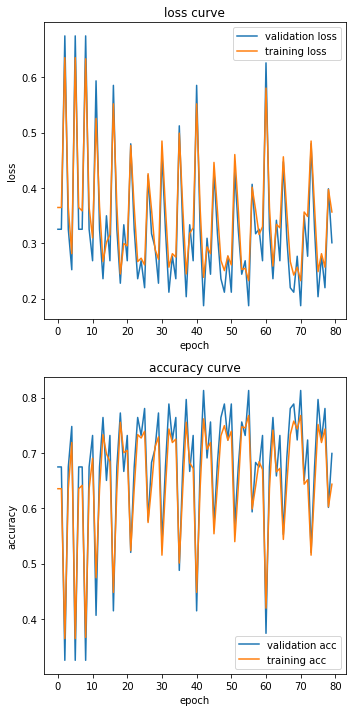

In [85]:
print(f'sample= {n_samples_b}, feature = {n_features_b} included bias')
print('EPOCH %d'%(epoch_b) ,'ITERATION %d'%(i+1), f'LR 0.001')
plot_graph(epoch, val_loss_list_b, train_loss_list_b, val_acc_list_b, train_acc_list_b, figsize=(5,10))


# Experiment 3 - learning rate


EPOCH 80 ITERATION 1 LR 1
train acc: 0.63340 val acc: 0.67480 best acc: 0.67480 best lr 1
train loss: 0.36660 val loss: 0.32520
----
EPOCH 80 ITERATION 2 LR 1
train acc: 0.63544 val acc: 0.67480 best acc: 0.67480 best lr 1
train loss: 0.36456 val loss: 0.32520
----
EPOCH 80 ITERATION 3 LR 1
train acc: 0.70061 val acc: 0.63415 best acc: 0.67480 best lr 1
train loss: 0.29939 val loss: 0.36585
----
EPOCH 80 ITERATION 4 LR 1
train acc: 0.64766 val acc: 0.69106 best acc: 0.69106 best lr 1
train loss: 0.35234 val loss: 0.30894
----
EPOCH 80 ITERATION 5 LR 1
train acc: 0.36660 val acc: 0.33333 best acc: 0.69106 best lr 1
train loss: 0.63340 val loss: 0.66667
----
EPOCH 80 ITERATION 6 LR 1
train acc: 0.63544 val acc: 0.67480 best acc: 0.69106 best lr 1
train loss: 0.36456 val loss: 0.32520
----
EPOCH 80 ITERATION 7 LR 1
train acc: 0.68024 val acc: 0.73171 best acc: 0.73171 best lr 1
train loss: 0.31976 val loss: 0.26829
----
EPOCH 80 ITERATION 8 LR 1
train acc: 0.43381 val acc: 0.36585 best ac

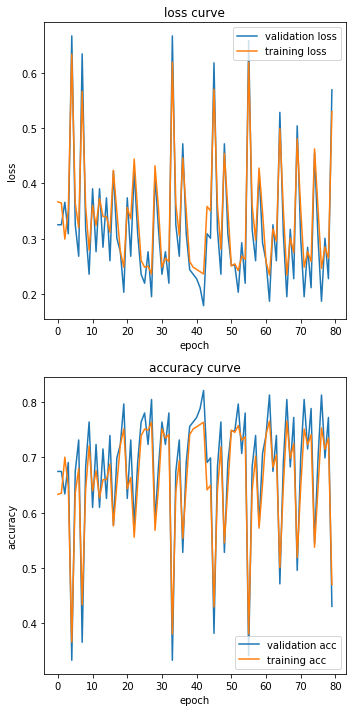

EPOCH 80 ITERATION 1 LR 0.1
train acc: 0.63340 val acc: 0.67480 best acc: 0.82114 best lr 1
train loss: 0.36660 val loss: 0.32520
----
EPOCH 80 ITERATION 2 LR 0.1
train acc: 0.63340 val acc: 0.67480 best acc: 0.82114 best lr 1
train loss: 0.36660 val loss: 0.32520
----
EPOCH 80 ITERATION 3 LR 0.1
train acc: 0.61100 val acc: 0.56911 best acc: 0.82114 best lr 1
train loss: 0.38900 val loss: 0.43089
----
EPOCH 80 ITERATION 4 LR 0.1
train acc: 0.63544 val acc: 0.67480 best acc: 0.82114 best lr 1
train loss: 0.36456 val loss: 0.32520
----
EPOCH 80 ITERATION 5 LR 0.1
train acc: 0.59470 val acc: 0.58537 best acc: 0.82114 best lr 1
train loss: 0.40530 val loss: 0.41463
----
EPOCH 80 ITERATION 6 LR 0.1
train acc: 0.63747 val acc: 0.67480 best acc: 0.82114 best lr 1
train loss: 0.36253 val loss: 0.32520
----
EPOCH 80 ITERATION 7 LR 0.1
train acc: 0.72098 val acc: 0.68293 best acc: 0.82114 best lr 1
train loss: 0.27902 val loss: 0.31707
----
EPOCH 80 ITERATION 8 LR 0.1
train acc: 0.66599 val acc:

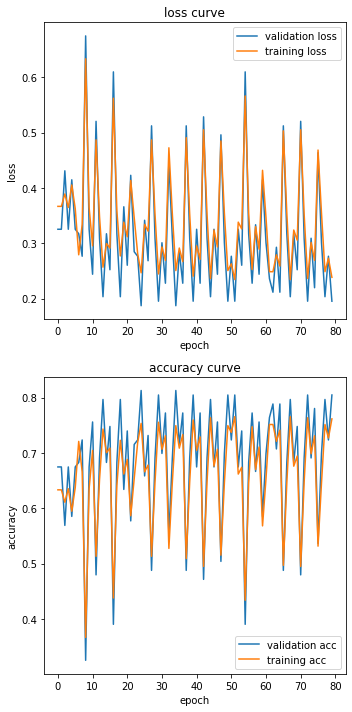

EPOCH 80 ITERATION 1 LR 0.001
train acc: 0.31365 val acc: 0.24390 best acc: 0.82114 best lr 1
train loss: 0.68635 val loss: 0.75610
----
EPOCH 80 ITERATION 2 LR 0.001
train acc: 0.26273 val acc: 0.25203 best acc: 0.82114 best lr 1
train loss: 0.73727 val loss: 0.74797
----
EPOCH 80 ITERATION 3 LR 0.001
train acc: 0.38900 val acc: 0.44715 best acc: 0.82114 best lr 1
train loss: 0.61100 val loss: 0.55285
----
EPOCH 80 ITERATION 4 LR 0.001
train acc: 0.45214 val acc: 0.49593 best acc: 0.82114 best lr 1
train loss: 0.54786 val loss: 0.50407
----
EPOCH 80 ITERATION 5 LR 0.001
train acc: 0.44399 val acc: 0.49593 best acc: 0.82114 best lr 1
train loss: 0.55601 val loss: 0.50407
----
EPOCH 80 ITERATION 6 LR 0.001
train acc: 0.43585 val acc: 0.49593 best acc: 0.82114 best lr 1
train loss: 0.56415 val loss: 0.50407
----
EPOCH 80 ITERATION 7 LR 0.001
train acc: 0.44196 val acc: 0.48780 best acc: 0.82114 best lr 1
train loss: 0.55804 val loss: 0.51220
----
EPOCH 80 ITERATION 8 LR 0.001
train acc: 

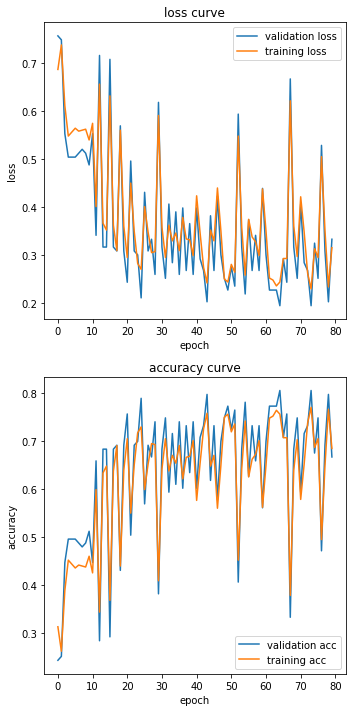

EPOCH 80 ITERATION 1 LR 0.0001
train acc: 0.34420 val acc: 0.29268 best acc: 0.82114 best lr 1
train loss: 0.65580 val loss: 0.70732
----
EPOCH 80 ITERATION 2 LR 0.0001
train acc: 0.34623 val acc: 0.29268 best acc: 0.82114 best lr 1
train loss: 0.65377 val loss: 0.70732
----
EPOCH 80 ITERATION 3 LR 0.0001
train acc: 0.34420 val acc: 0.29268 best acc: 0.82114 best lr 1
train loss: 0.65580 val loss: 0.70732
----
EPOCH 80 ITERATION 4 LR 0.0001
train acc: 0.34420 val acc: 0.29268 best acc: 0.82114 best lr 1
train loss: 0.65580 val loss: 0.70732
----
EPOCH 80 ITERATION 5 LR 0.0001
train acc: 0.34012 val acc: 0.28455 best acc: 0.82114 best lr 1
train loss: 0.65988 val loss: 0.71545
----
EPOCH 80 ITERATION 6 LR 0.0001
train acc: 0.33401 val acc: 0.27642 best acc: 0.82114 best lr 1
train loss: 0.66599 val loss: 0.72358
----
EPOCH 80 ITERATION 7 LR 0.0001
train acc: 0.33401 val acc: 0.26829 best acc: 0.82114 best lr 1
train loss: 0.66599 val loss: 0.73171
----
EPOCH 80 ITERATION 8 LR 0.0001
tra

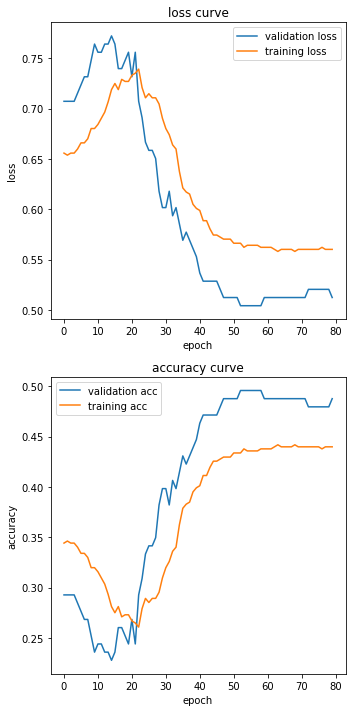

EPOCH 80 ITERATION 1 LR 1e-05
train acc: 0.34827 val acc: 0.29268 best acc: 0.82114 best lr 1
train loss: 0.65173 val loss: 0.70732
----
EPOCH 80 ITERATION 2 LR 1e-05
train acc: 0.34827 val acc: 0.29268 best acc: 0.82114 best lr 1
train loss: 0.65173 val loss: 0.70732
----
EPOCH 80 ITERATION 3 LR 1e-05
train acc: 0.34827 val acc: 0.29268 best acc: 0.82114 best lr 1
train loss: 0.65173 val loss: 0.70732
----
EPOCH 80 ITERATION 4 LR 1e-05
train acc: 0.34623 val acc: 0.29268 best acc: 0.82114 best lr 1
train loss: 0.65377 val loss: 0.70732
----
EPOCH 80 ITERATION 5 LR 1e-05
train acc: 0.34623 val acc: 0.29268 best acc: 0.82114 best lr 1
train loss: 0.65377 val loss: 0.70732
----
EPOCH 80 ITERATION 6 LR 1e-05
train acc: 0.34623 val acc: 0.29268 best acc: 0.82114 best lr 1
train loss: 0.65377 val loss: 0.70732
----
EPOCH 80 ITERATION 7 LR 1e-05
train acc: 0.34623 val acc: 0.29268 best acc: 0.82114 best lr 1
train loss: 0.65377 val loss: 0.70732
----
EPOCH 80 ITERATION 8 LR 1e-05
train acc: 

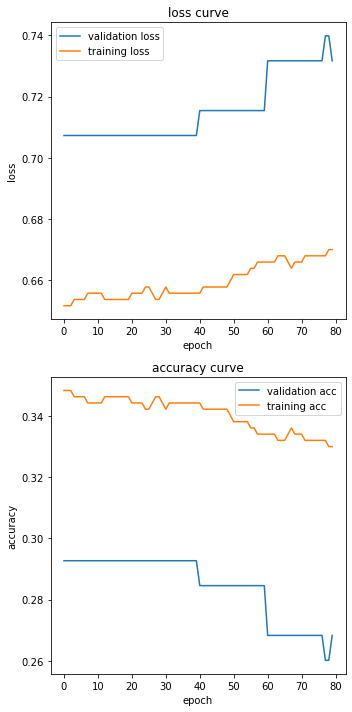

In [90]:
epoch2 = 80
best_acc2 = 0
best_lr = 0
plot_result = []
lr = [1, 0.1, 0.001, 0.0001, 0.00001]
for l in lr:
    np.random.seed(0)
    initial_weight_lr = np.random.rand(8)
    weight2 = initial_weight_lr
    val_loss_list_lr = []
    train_loss_list_lr = []
    val_acc_list_lr = []
    train_acc_list_lr = []

    for i in range(epoch2):
        
        weight2 = update_weight(X_train, y_train, weight2, lr=l)

        y_train_pred2 = make_prediction(X_train, y_train, weight2)
        y_val_pred2 = make_prediction(X_val, y_val, weight2)

        train_acc2 = accuracy_score(y_train, y_train_pred2)
        val_acc2 = accuracy_score(y_val, y_val_pred2)

        train_acc_list_lr.append(train_acc2)
        val_acc_list_lr.append(val_acc2)

        train_loss2 = zero_one_loss(X_train, y_train, weight2)
        val_loss2 = zero_one_loss(X_val, y_val, weight2)

        train_loss_list_lr.append(train_loss2)
        val_loss_list_lr.append(val_loss2)       
        
        if val_acc2>best_acc2:
            best_acc2 = val_acc2
            best_lr = l
        print('EPOCH %d'%(epoch2) ,'ITERATION %d'%(i+1), f'LR {l}')

        print('train acc: %.5f'%train_acc2, 'val acc: %.5f'%val_acc2, 
              'best acc: %.5f'%best_acc2, f'best lr {best_lr}')
        print('train loss: %.5f'%train_loss2, 'val loss: %.5f'%val_loss2)

        print('----')
    print(f'sample= {n_samples} and feature = {n_features}') 
    print('EPOCH %d'%(epoch2) ,'ITERATION %d'%(i+1), f'LR {l}')
    
    plot_graph(epoch2, val_loss_list_lr, train_loss_list_lr, val_acc_list_lr, train_acc_list_lr, figsize=(5,10))

# experiment 4: bias + lr

EPOCH 80 ITERATION 1 LR1
train acc: 0.63544 val acc: 0.67480 best acc: 0.67480 best lr 1
train loss: 0.36456 val loss: 0.32520
----
EPOCH 80 ITERATION 2 LR1
train acc: 0.65988 val acc: 0.70732 best acc: 0.70732 best lr 1
train loss: 0.34012 val loss: 0.29268
----
EPOCH 80 ITERATION 3 LR1
train acc: 0.36456 val acc: 0.32520 best acc: 0.70732 best lr 1
train loss: 0.63544 val loss: 0.67480
----
EPOCH 80 ITERATION 4 LR1
train acc: 0.63544 val acc: 0.67480 best acc: 0.70732 best lr 1
train loss: 0.36456 val loss: 0.32520
----
EPOCH 80 ITERATION 5 LR1
train acc: 0.70061 val acc: 0.74797 best acc: 0.74797 best lr 1
train loss: 0.29939 val loss: 0.25203
----
EPOCH 80 ITERATION 6 LR1
train acc: 0.38086 val acc: 0.34146 best acc: 0.74797 best lr 1
train loss: 0.61914 val loss: 0.65854
----
EPOCH 80 ITERATION 7 LR1
train acc: 0.63340 val acc: 0.67480 best acc: 0.74797 best lr 1
train loss: 0.36660 val loss: 0.32520
----
EPOCH 80 ITERATION 8 LR1
train acc: 0.68228 val acc: 0.73984 best acc: 0.747

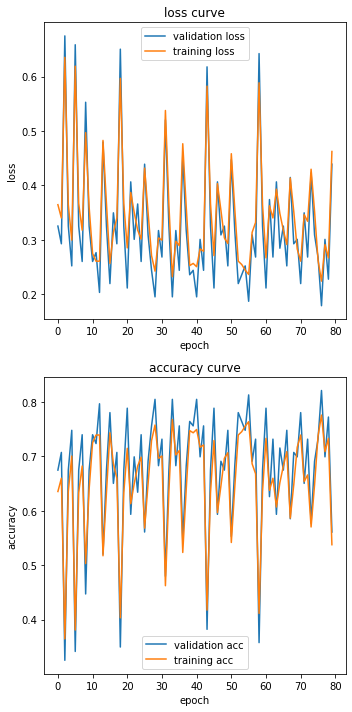

EPOCH 80 ITERATION 1 LR0.1
train acc: 0.63544 val acc: 0.67480 best acc: 0.82114 best lr 1
train loss: 0.36456 val loss: 0.32520
----
EPOCH 80 ITERATION 2 LR0.1
train acc: 0.64969 val acc: 0.69106 best acc: 0.82114 best lr 1
train loss: 0.35031 val loss: 0.30894
----
EPOCH 80 ITERATION 3 LR0.1
train acc: 0.36456 val acc: 0.32520 best acc: 0.82114 best lr 1
train loss: 0.63544 val loss: 0.67480
----
EPOCH 80 ITERATION 4 LR0.1
train acc: 0.63544 val acc: 0.67480 best acc: 0.82114 best lr 1
train loss: 0.36456 val loss: 0.32520
----
EPOCH 80 ITERATION 5 LR0.1
train acc: 0.69654 val acc: 0.73984 best acc: 0.82114 best lr 1
train loss: 0.30346 val loss: 0.26016
----
EPOCH 80 ITERATION 6 LR0.1
train acc: 0.37475 val acc: 0.33333 best acc: 0.82114 best lr 1
train loss: 0.62525 val loss: 0.66667
----
EPOCH 80 ITERATION 7 LR0.1
train acc: 0.63340 val acc: 0.67480 best acc: 0.82114 best lr 1
train loss: 0.36660 val loss: 0.32520
----
EPOCH 80 ITERATION 8 LR0.1
train acc: 0.68024 val acc: 0.73171

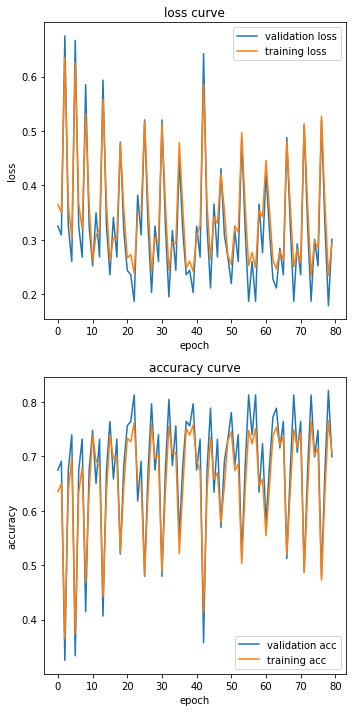

EPOCH 80 ITERATION 1 LR0.001
train acc: 0.31161 val acc: 0.34146 best acc: 0.82114 best lr 1
train loss: 0.68839 val loss: 0.65854
----
EPOCH 80 ITERATION 2 LR0.001
train acc: 0.43585 val acc: 0.46341 best acc: 0.82114 best lr 1
train loss: 0.56415 val loss: 0.53659
----
EPOCH 80 ITERATION 3 LR0.001
train acc: 0.41344 val acc: 0.43902 best acc: 0.82114 best lr 1
train loss: 0.58656 val loss: 0.56098
----
EPOCH 80 ITERATION 4 LR0.001
train acc: 0.40937 val acc: 0.46341 best acc: 0.82114 best lr 1
train loss: 0.59063 val loss: 0.53659
----
EPOCH 80 ITERATION 5 LR0.001
train acc: 0.40733 val acc: 0.46341 best acc: 0.82114 best lr 1
train loss: 0.59267 val loss: 0.53659
----
EPOCH 80 ITERATION 6 LR0.001
train acc: 0.41548 val acc: 0.46341 best acc: 0.82114 best lr 1
train loss: 0.58452 val loss: 0.53659
----
EPOCH 80 ITERATION 7 LR0.001
train acc: 0.43177 val acc: 0.47154 best acc: 0.82114 best lr 1
train loss: 0.56823 val loss: 0.52846
----
EPOCH 80 ITERATION 8 LR0.001
train acc: 0.43992 

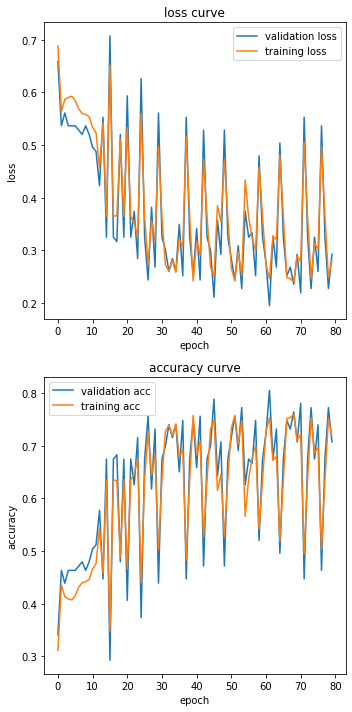

EPOCH 80 ITERATION 1 LR0.0001
train acc: 0.28513 val acc: 0.26016 best acc: 0.82114 best lr 1
train loss: 0.71487 val loss: 0.73984
----
EPOCH 80 ITERATION 2 LR0.0001
train acc: 0.27699 val acc: 0.27642 best acc: 0.82114 best lr 1
train loss: 0.72301 val loss: 0.72358
----
EPOCH 80 ITERATION 3 LR0.0001
train acc: 0.27902 val acc: 0.27642 best acc: 0.82114 best lr 1
train loss: 0.72098 val loss: 0.72358
----
EPOCH 80 ITERATION 4 LR0.0001
train acc: 0.28717 val acc: 0.30081 best acc: 0.82114 best lr 1
train loss: 0.71283 val loss: 0.69919
----
EPOCH 80 ITERATION 5 LR0.0001
train acc: 0.28921 val acc: 0.31707 best acc: 0.82114 best lr 1
train loss: 0.71079 val loss: 0.68293
----
EPOCH 80 ITERATION 6 LR0.0001
train acc: 0.28106 val acc: 0.29268 best acc: 0.82114 best lr 1
train loss: 0.71894 val loss: 0.70732
----
EPOCH 80 ITERATION 7 LR0.0001
train acc: 0.28513 val acc: 0.29268 best acc: 0.82114 best lr 1
train loss: 0.71487 val loss: 0.70732
----
EPOCH 80 ITERATION 8 LR0.0001
train acc: 

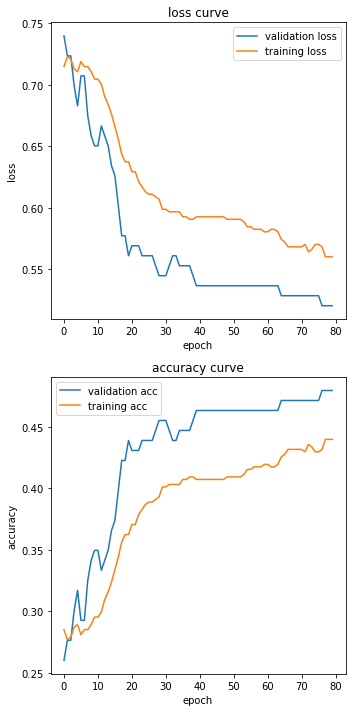

EPOCH 80 ITERATION 1 LR1e-05
train acc: 0.28717 val acc: 0.26829 best acc: 0.82114 best lr 1
train loss: 0.71283 val loss: 0.73171
----
EPOCH 80 ITERATION 2 LR1e-05
train acc: 0.28513 val acc: 0.26829 best acc: 0.82114 best lr 1
train loss: 0.71487 val loss: 0.73171
----
EPOCH 80 ITERATION 3 LR1e-05
train acc: 0.28513 val acc: 0.26829 best acc: 0.82114 best lr 1
train loss: 0.71487 val loss: 0.73171
----
EPOCH 80 ITERATION 4 LR1e-05
train acc: 0.28310 val acc: 0.26829 best acc: 0.82114 best lr 1
train loss: 0.71690 val loss: 0.73171
----
EPOCH 80 ITERATION 5 LR1e-05
train acc: 0.28310 val acc: 0.26829 best acc: 0.82114 best lr 1
train loss: 0.71690 val loss: 0.73171
----
EPOCH 80 ITERATION 6 LR1e-05
train acc: 0.28310 val acc: 0.26829 best acc: 0.82114 best lr 1
train loss: 0.71690 val loss: 0.73171
----
EPOCH 80 ITERATION 7 LR1e-05
train acc: 0.28717 val acc: 0.26016 best acc: 0.82114 best lr 1
train loss: 0.71283 val loss: 0.73984
----
EPOCH 80 ITERATION 8 LR1e-05
train acc: 0.28717 

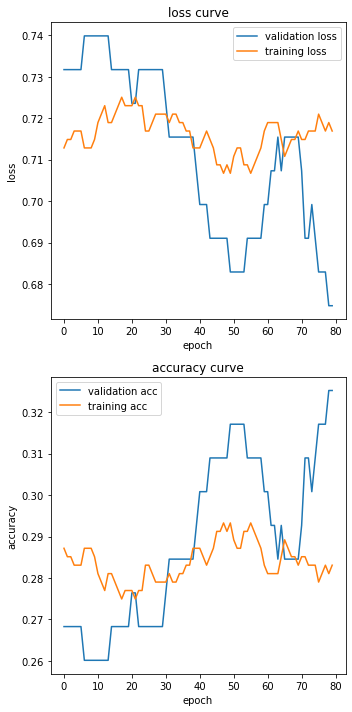

In [92]:
epoch_blr = 80
best_blr_acc = 0
best_blr = 0
lr = [1, 0.1, 0.001, 0.0001, 0.00001]
for l3 in lr:
    np.random.seed(0)
    initial_weight_blr = np.random.rand(9)
    weight_blr = initial_weight_blr

    val_loss_list_blr = []
    train_loss_list_blr = []
    val_acc_list_blr = []
    train_acc_list_blr = []

    for i in range(epoch_blr):
        
        weight_blr = update_weight(X_b_train, y_b_train, weight_blr, lr=l3)

        y_train_pred3 = make_prediction(X_b_train, y_b_train, weight_blr)
        y_val_pred3 = make_prediction(X_b_val, y_b_val, weight_blr)

        train_acc3 = accuracy_score(y_b_train, y_train_pred3)
        val_acc3 = accuracy_score(y_b_val, y_val_pred3)

        train_acc_list_blr.append(train_acc3)
        val_acc_list_blr.append(val_acc3)

        train_loss3 = zero_one_loss(X_b_train, y_b_train, weight_blr)
        val_loss3 = zero_one_loss(X_b_val, y_b_val, weight_blr)

        train_loss_list_blr.append(train_loss3)
        val_loss_list_blr.append(val_loss3)
        
        if val_acc3>best_blr_acc:
            best_blr_acc = val_acc3
            best_blr = l3
        print('EPOCH %d'%(epoch_blr) ,'ITERATION %d'%(i+1), f'LR{l3}')

        print('train acc: %.5f'%train_acc3, 'val acc: %.5f'%val_acc3, 
              'best acc: %.5f'%best_blr_acc, f'best lr {best_blr}')
        print('train loss: %.5f'%train_loss3, 'val loss: %.5f'%val_loss3)

        print('----')
    print(f'sample= {n_samples_b}, feature = {n_features_b} included bias')

    print('EPOCH %d'%(epoch_blr) ,'ITERATION %d'%(i+1), f'LR{l3}')
    plot_graph(epoch_blr, val_loss_list_blr, train_loss_list_blr, val_acc_list_blr, train_acc_list_blr, figsize=(5,10))

# experiment 5: epoch

10
EPOCH 10 ITERATION 1 LR 0.001
train acc: 0.63340 val acc: 0.67480 best acc: 0.67480 best epoch:10
train loss: 0.36660 val loss: 0.32520
----
EPOCH 10 ITERATION 2 LR 0.001
train acc: 0.63340 val acc: 0.67480 best acc: 0.67480 best epoch:10
train loss: 0.36660 val loss: 0.32520
----
EPOCH 10 ITERATION 3 LR 0.001
train acc: 0.36456 val acc: 0.32520 best acc: 0.67480 best epoch:10
train loss: 0.63544 val loss: 0.67480
----
EPOCH 10 ITERATION 4 LR 0.001
train acc: 0.63340 val acc: 0.67480 best acc: 0.67480 best epoch:10
train loss: 0.36660 val loss: 0.32520
----
EPOCH 10 ITERATION 5 LR 0.001
train acc: 0.64358 val acc: 0.69106 best acc: 0.69106 best epoch:10
train loss: 0.35642 val loss: 0.30894
----
EPOCH 10 ITERATION 6 LR 0.001
train acc: 0.36660 val acc: 0.32520 best acc: 0.69106 best epoch:10
train loss: 0.63340 val loss: 0.67480
----
EPOCH 10 ITERATION 7 LR 0.001
train acc: 0.63544 val acc: 0.67480 best acc: 0.69106 best epoch:10
train loss: 0.36456 val loss: 0.32520
----
EPOCH 10 I

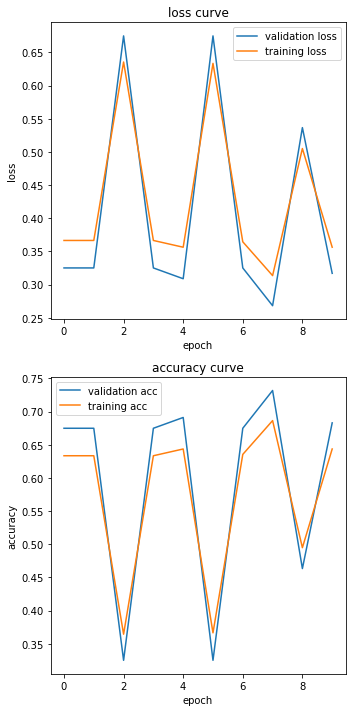

20
EPOCH 20 ITERATION 1 LR 0.001
train acc: 0.63340 val acc: 0.67480 best acc: 0.73171 best epoch:10
train loss: 0.36660 val loss: 0.32520
----
EPOCH 20 ITERATION 2 LR 0.001
train acc: 0.63340 val acc: 0.67480 best acc: 0.73171 best epoch:10
train loss: 0.36660 val loss: 0.32520
----
EPOCH 20 ITERATION 3 LR 0.001
train acc: 0.36456 val acc: 0.32520 best acc: 0.73171 best epoch:10
train loss: 0.63544 val loss: 0.67480
----
EPOCH 20 ITERATION 4 LR 0.001
train acc: 0.63340 val acc: 0.67480 best acc: 0.73171 best epoch:10
train loss: 0.36660 val loss: 0.32520
----
EPOCH 20 ITERATION 5 LR 0.001
train acc: 0.64358 val acc: 0.69106 best acc: 0.73171 best epoch:10
train loss: 0.35642 val loss: 0.30894
----
EPOCH 20 ITERATION 6 LR 0.001
train acc: 0.36660 val acc: 0.32520 best acc: 0.73171 best epoch:10
train loss: 0.63340 val loss: 0.67480
----
EPOCH 20 ITERATION 7 LR 0.001
train acc: 0.63544 val acc: 0.67480 best acc: 0.73171 best epoch:10
train loss: 0.36456 val loss: 0.32520
----
EPOCH 20 I

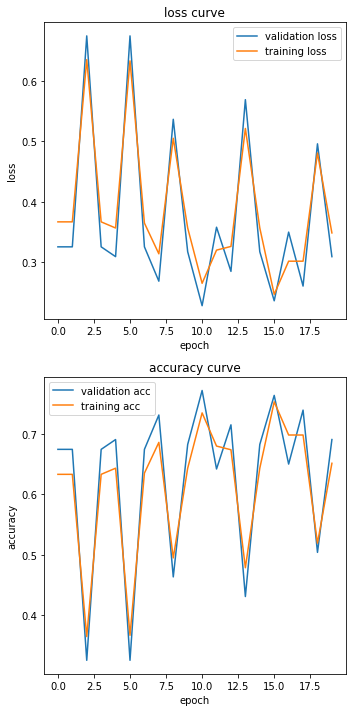

30
EPOCH 30 ITERATION 1 LR 0.001
train acc: 0.63340 val acc: 0.67480 best acc: 0.77236 best epoch:20
train loss: 0.36660 val loss: 0.32520
----
EPOCH 30 ITERATION 2 LR 0.001
train acc: 0.63340 val acc: 0.67480 best acc: 0.77236 best epoch:20
train loss: 0.36660 val loss: 0.32520
----
EPOCH 30 ITERATION 3 LR 0.001
train acc: 0.36456 val acc: 0.32520 best acc: 0.77236 best epoch:20
train loss: 0.63544 val loss: 0.67480
----
EPOCH 30 ITERATION 4 LR 0.001
train acc: 0.63340 val acc: 0.67480 best acc: 0.77236 best epoch:20
train loss: 0.36660 val loss: 0.32520
----
EPOCH 30 ITERATION 5 LR 0.001
train acc: 0.64358 val acc: 0.69106 best acc: 0.77236 best epoch:20
train loss: 0.35642 val loss: 0.30894
----
EPOCH 30 ITERATION 6 LR 0.001
train acc: 0.36660 val acc: 0.32520 best acc: 0.77236 best epoch:20
train loss: 0.63340 val loss: 0.67480
----
EPOCH 30 ITERATION 7 LR 0.001
train acc: 0.63544 val acc: 0.67480 best acc: 0.77236 best epoch:20
train loss: 0.36456 val loss: 0.32520
----
EPOCH 30 I

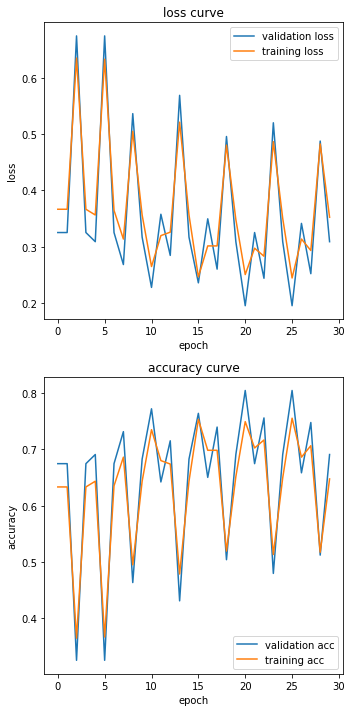

40
EPOCH 40 ITERATION 1 LR 0.001
train acc: 0.63340 val acc: 0.67480 best acc: 0.80488 best epoch:30
train loss: 0.36660 val loss: 0.32520
----
EPOCH 40 ITERATION 2 LR 0.001
train acc: 0.63340 val acc: 0.67480 best acc: 0.80488 best epoch:30
train loss: 0.36660 val loss: 0.32520
----
EPOCH 40 ITERATION 3 LR 0.001
train acc: 0.36456 val acc: 0.32520 best acc: 0.80488 best epoch:30
train loss: 0.63544 val loss: 0.67480
----
EPOCH 40 ITERATION 4 LR 0.001
train acc: 0.63340 val acc: 0.67480 best acc: 0.80488 best epoch:30
train loss: 0.36660 val loss: 0.32520
----
EPOCH 40 ITERATION 5 LR 0.001
train acc: 0.64358 val acc: 0.69106 best acc: 0.80488 best epoch:30
train loss: 0.35642 val loss: 0.30894
----
EPOCH 40 ITERATION 6 LR 0.001
train acc: 0.36660 val acc: 0.32520 best acc: 0.80488 best epoch:30
train loss: 0.63340 val loss: 0.67480
----
EPOCH 40 ITERATION 7 LR 0.001
train acc: 0.63544 val acc: 0.67480 best acc: 0.80488 best epoch:30
train loss: 0.36456 val loss: 0.32520
----
EPOCH 40 I

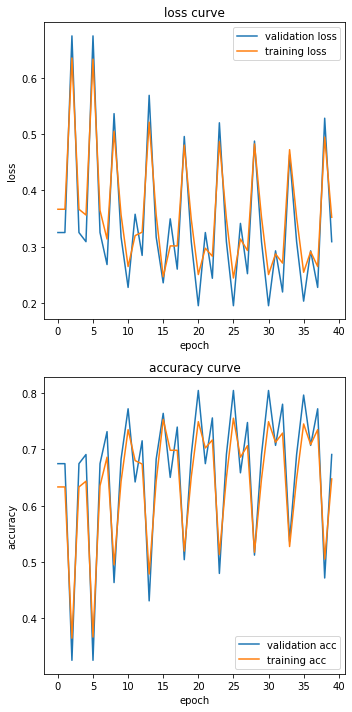

50
EPOCH 50 ITERATION 1 LR 0.001
train acc: 0.63340 val acc: 0.67480 best acc: 0.80488 best epoch:30
train loss: 0.36660 val loss: 0.32520
----
EPOCH 50 ITERATION 2 LR 0.001
train acc: 0.63340 val acc: 0.67480 best acc: 0.80488 best epoch:30
train loss: 0.36660 val loss: 0.32520
----
EPOCH 50 ITERATION 3 LR 0.001
train acc: 0.36456 val acc: 0.32520 best acc: 0.80488 best epoch:30
train loss: 0.63544 val loss: 0.67480
----
EPOCH 50 ITERATION 4 LR 0.001
train acc: 0.63340 val acc: 0.67480 best acc: 0.80488 best epoch:30
train loss: 0.36660 val loss: 0.32520
----
EPOCH 50 ITERATION 5 LR 0.001
train acc: 0.64358 val acc: 0.69106 best acc: 0.80488 best epoch:30
train loss: 0.35642 val loss: 0.30894
----
EPOCH 50 ITERATION 6 LR 0.001
train acc: 0.36660 val acc: 0.32520 best acc: 0.80488 best epoch:30
train loss: 0.63340 val loss: 0.67480
----
EPOCH 50 ITERATION 7 LR 0.001
train acc: 0.63544 val acc: 0.67480 best acc: 0.80488 best epoch:30
train loss: 0.36456 val loss: 0.32520
----
EPOCH 50 I

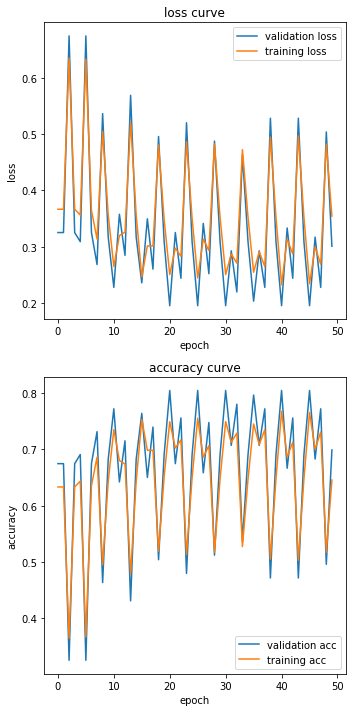

60
EPOCH 60 ITERATION 1 LR 0.001
train acc: 0.63340 val acc: 0.67480 best acc: 0.80488 best epoch:30
train loss: 0.36660 val loss: 0.32520
----
EPOCH 60 ITERATION 2 LR 0.001
train acc: 0.63340 val acc: 0.67480 best acc: 0.80488 best epoch:30
train loss: 0.36660 val loss: 0.32520
----
EPOCH 60 ITERATION 3 LR 0.001
train acc: 0.36456 val acc: 0.32520 best acc: 0.80488 best epoch:30
train loss: 0.63544 val loss: 0.67480
----
EPOCH 60 ITERATION 4 LR 0.001
train acc: 0.63340 val acc: 0.67480 best acc: 0.80488 best epoch:30
train loss: 0.36660 val loss: 0.32520
----
EPOCH 60 ITERATION 5 LR 0.001
train acc: 0.64358 val acc: 0.69106 best acc: 0.80488 best epoch:30
train loss: 0.35642 val loss: 0.30894
----
EPOCH 60 ITERATION 6 LR 0.001
train acc: 0.36660 val acc: 0.32520 best acc: 0.80488 best epoch:30
train loss: 0.63340 val loss: 0.67480
----
EPOCH 60 ITERATION 7 LR 0.001
train acc: 0.63544 val acc: 0.67480 best acc: 0.80488 best epoch:30
train loss: 0.36456 val loss: 0.32520
----
EPOCH 60 I

EPOCH 60 ITERATION 59 LR 0.001
train acc: 0.49287 val acc: 0.47967 best acc: 0.80488 best epoch:30
train loss: 0.50713 val loss: 0.52033
----
EPOCH 60 ITERATION 60 LR 0.001
train acc: 0.64562 val acc: 0.69106 best acc: 0.80488 best epoch:30
train loss: 0.35438 val loss: 0.30894
----
sample= 768 and feature = 8
EPOCH 60 ITERATION 60 LR 0.001


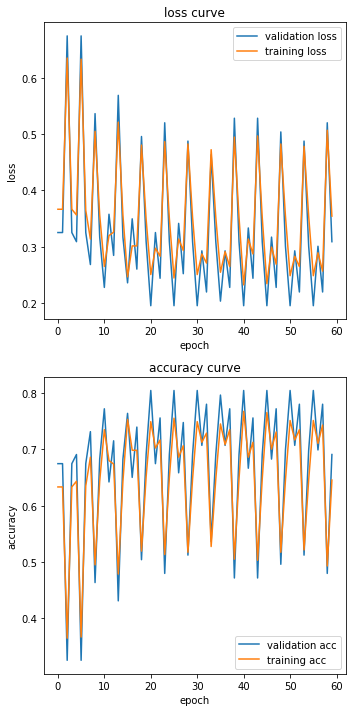

70
EPOCH 70 ITERATION 1 LR 0.001
train acc: 0.63340 val acc: 0.67480 best acc: 0.80488 best epoch:30
train loss: 0.36660 val loss: 0.32520
----
EPOCH 70 ITERATION 2 LR 0.001
train acc: 0.63340 val acc: 0.67480 best acc: 0.80488 best epoch:30
train loss: 0.36660 val loss: 0.32520
----
EPOCH 70 ITERATION 3 LR 0.001
train acc: 0.36456 val acc: 0.32520 best acc: 0.80488 best epoch:30
train loss: 0.63544 val loss: 0.67480
----
EPOCH 70 ITERATION 4 LR 0.001
train acc: 0.63340 val acc: 0.67480 best acc: 0.80488 best epoch:30
train loss: 0.36660 val loss: 0.32520
----
EPOCH 70 ITERATION 5 LR 0.001
train acc: 0.64358 val acc: 0.69106 best acc: 0.80488 best epoch:30
train loss: 0.35642 val loss: 0.30894
----
EPOCH 70 ITERATION 6 LR 0.001
train acc: 0.36660 val acc: 0.32520 best acc: 0.80488 best epoch:30
train loss: 0.63340 val loss: 0.67480
----
EPOCH 70 ITERATION 7 LR 0.001
train acc: 0.63544 val acc: 0.67480 best acc: 0.80488 best epoch:30
train loss: 0.36456 val loss: 0.32520
----
EPOCH 70 I

EPOCH 70 ITERATION 65 LR 0.001
train acc: 0.64562 val acc: 0.69919 best acc: 0.80488 best epoch:30
train loss: 0.35438 val loss: 0.30081
----
EPOCH 70 ITERATION 66 LR 0.001
train acc: 0.75764 val acc: 0.80488 best acc: 0.80488 best epoch:30
train loss: 0.24236 val loss: 0.19512
----
EPOCH 70 ITERATION 67 LR 0.001
train acc: 0.70468 val acc: 0.69106 best acc: 0.80488 best epoch:30
train loss: 0.29532 val loss: 0.30894
----
EPOCH 70 ITERATION 68 LR 0.001
train acc: 0.73320 val acc: 0.78049 best acc: 0.80488 best epoch:30
train loss: 0.26680 val loss: 0.21951
----
EPOCH 70 ITERATION 69 LR 0.001
train acc: 0.50916 val acc: 0.49593 best acc: 0.80488 best epoch:30
train loss: 0.49084 val loss: 0.50407
----
EPOCH 70 ITERATION 70 LR 0.001
train acc: 0.64562 val acc: 0.69919 best acc: 0.80488 best epoch:30
train loss: 0.35438 val loss: 0.30081
----
sample= 768 and feature = 8
EPOCH 70 ITERATION 70 LR 0.001


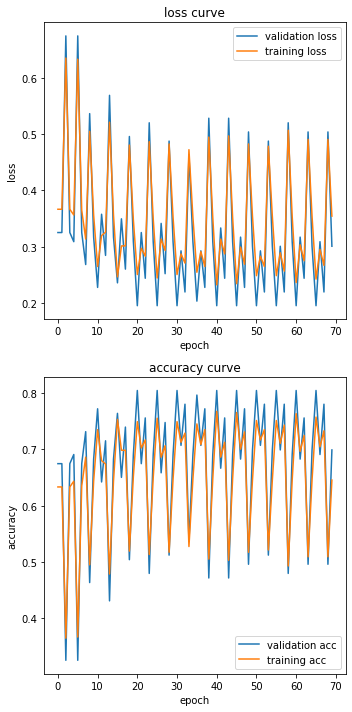

80
EPOCH 80 ITERATION 1 LR 0.001
train acc: 0.63340 val acc: 0.67480 best acc: 0.80488 best epoch:30
train loss: 0.36660 val loss: 0.32520
----
EPOCH 80 ITERATION 2 LR 0.001
train acc: 0.63340 val acc: 0.67480 best acc: 0.80488 best epoch:30
train loss: 0.36660 val loss: 0.32520
----
EPOCH 80 ITERATION 3 LR 0.001
train acc: 0.36456 val acc: 0.32520 best acc: 0.80488 best epoch:30
train loss: 0.63544 val loss: 0.67480
----
EPOCH 80 ITERATION 4 LR 0.001
train acc: 0.63340 val acc: 0.67480 best acc: 0.80488 best epoch:30
train loss: 0.36660 val loss: 0.32520
----
EPOCH 80 ITERATION 5 LR 0.001
train acc: 0.64358 val acc: 0.69106 best acc: 0.80488 best epoch:30
train loss: 0.35642 val loss: 0.30894
----
EPOCH 80 ITERATION 6 LR 0.001
train acc: 0.36660 val acc: 0.32520 best acc: 0.80488 best epoch:30
train loss: 0.63340 val loss: 0.67480
----
EPOCH 80 ITERATION 7 LR 0.001
train acc: 0.63544 val acc: 0.67480 best acc: 0.80488 best epoch:30
train loss: 0.36456 val loss: 0.32520
----
EPOCH 80 I

EPOCH 80 ITERATION 62 LR 0.001
train acc: 0.69654 val acc: 0.68293 best acc: 0.80488 best epoch:30
train loss: 0.30346 val loss: 0.31707
----
EPOCH 80 ITERATION 63 LR 0.001
train acc: 0.72505 val acc: 0.75610 best acc: 0.80488 best epoch:30
train loss: 0.27495 val loss: 0.24390
----
EPOCH 80 ITERATION 64 LR 0.001
train acc: 0.50916 val acc: 0.49593 best acc: 0.80488 best epoch:30
train loss: 0.49084 val loss: 0.50407
----
EPOCH 80 ITERATION 65 LR 0.001
train acc: 0.64562 val acc: 0.69919 best acc: 0.80488 best epoch:30
train loss: 0.35438 val loss: 0.30081
----
EPOCH 80 ITERATION 66 LR 0.001
train acc: 0.75764 val acc: 0.80488 best acc: 0.80488 best epoch:30
train loss: 0.24236 val loss: 0.19512
----
EPOCH 80 ITERATION 67 LR 0.001
train acc: 0.70468 val acc: 0.69106 best acc: 0.80488 best epoch:30
train loss: 0.29532 val loss: 0.30894
----
EPOCH 80 ITERATION 68 LR 0.001
train acc: 0.73320 val acc: 0.78049 best acc: 0.80488 best epoch:30
train loss: 0.26680 val loss: 0.21951
----
EPOCH 

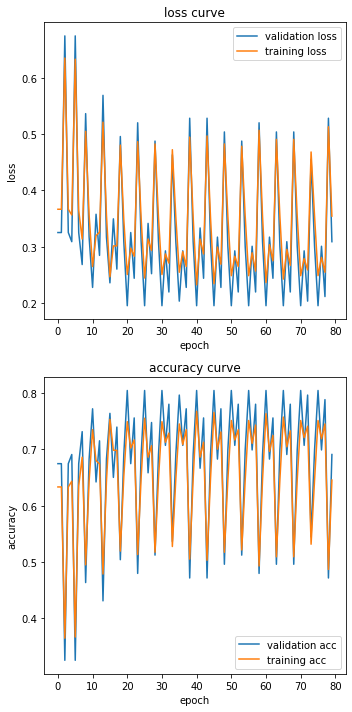

90
EPOCH 90 ITERATION 1 LR 0.001
train acc: 0.63340 val acc: 0.67480 best acc: 0.80488 best epoch:30
train loss: 0.36660 val loss: 0.32520
----
EPOCH 90 ITERATION 2 LR 0.001
train acc: 0.63340 val acc: 0.67480 best acc: 0.80488 best epoch:30
train loss: 0.36660 val loss: 0.32520
----
EPOCH 90 ITERATION 3 LR 0.001
train acc: 0.36456 val acc: 0.32520 best acc: 0.80488 best epoch:30
train loss: 0.63544 val loss: 0.67480
----
EPOCH 90 ITERATION 4 LR 0.001
train acc: 0.63340 val acc: 0.67480 best acc: 0.80488 best epoch:30
train loss: 0.36660 val loss: 0.32520
----
EPOCH 90 ITERATION 5 LR 0.001
train acc: 0.64358 val acc: 0.69106 best acc: 0.80488 best epoch:30
train loss: 0.35642 val loss: 0.30894
----
EPOCH 90 ITERATION 6 LR 0.001
train acc: 0.36660 val acc: 0.32520 best acc: 0.80488 best epoch:30
train loss: 0.63340 val loss: 0.67480
----
EPOCH 90 ITERATION 7 LR 0.001
train acc: 0.63544 val acc: 0.67480 best acc: 0.80488 best epoch:30
train loss: 0.36456 val loss: 0.32520
----
EPOCH 90 I

EPOCH 90 ITERATION 83 LR 0.001
train acc: 0.74134 val acc: 0.77236 best acc: 0.80488 best epoch:30
train loss: 0.25866 val loss: 0.22764
----
EPOCH 90 ITERATION 84 LR 0.001
train acc: 0.50713 val acc: 0.49593 best acc: 0.80488 best epoch:30
train loss: 0.49287 val loss: 0.50407
----
EPOCH 90 ITERATION 85 LR 0.001
train acc: 0.64766 val acc: 0.69919 best acc: 0.80488 best epoch:30
train loss: 0.35234 val loss: 0.30081
----
EPOCH 90 ITERATION 86 LR 0.001
train acc: 0.76375 val acc: 0.80488 best acc: 0.80488 best epoch:30
train loss: 0.23625 val loss: 0.19512
----
EPOCH 90 ITERATION 87 LR 0.001
train acc: 0.69246 val acc: 0.68293 best acc: 0.80488 best epoch:30
train loss: 0.30754 val loss: 0.31707
----
EPOCH 90 ITERATION 88 LR 0.001
train acc: 0.71690 val acc: 0.75610 best acc: 0.80488 best epoch:30
train loss: 0.28310 val loss: 0.24390
----
EPOCH 90 ITERATION 89 LR 0.001
train acc: 0.49898 val acc: 0.48780 best acc: 0.80488 best epoch:30
train loss: 0.50102 val loss: 0.51220
----
EPOCH 

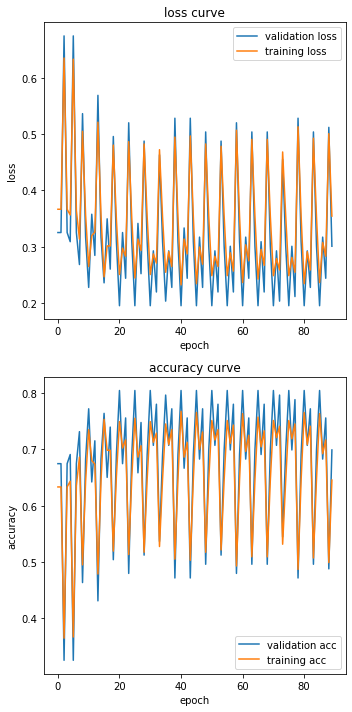

100
EPOCH 100 ITERATION 1 LR 0.001
train acc: 0.63340 val acc: 0.67480 best acc: 0.80488 best epoch:30
train loss: 0.36660 val loss: 0.32520
----
EPOCH 100 ITERATION 2 LR 0.001
train acc: 0.63340 val acc: 0.67480 best acc: 0.80488 best epoch:30
train loss: 0.36660 val loss: 0.32520
----
EPOCH 100 ITERATION 3 LR 0.001
train acc: 0.36456 val acc: 0.32520 best acc: 0.80488 best epoch:30
train loss: 0.63544 val loss: 0.67480
----
EPOCH 100 ITERATION 4 LR 0.001
train acc: 0.63340 val acc: 0.67480 best acc: 0.80488 best epoch:30
train loss: 0.36660 val loss: 0.32520
----
EPOCH 100 ITERATION 5 LR 0.001
train acc: 0.64358 val acc: 0.69106 best acc: 0.80488 best epoch:30
train loss: 0.35642 val loss: 0.30894
----
EPOCH 100 ITERATION 6 LR 0.001
train acc: 0.36660 val acc: 0.32520 best acc: 0.80488 best epoch:30
train loss: 0.63340 val loss: 0.67480
----
EPOCH 100 ITERATION 7 LR 0.001
train acc: 0.63544 val acc: 0.67480 best acc: 0.80488 best epoch:30
train loss: 0.36456 val loss: 0.32520
----
EP

EPOCH 100 ITERATION 85 LR 0.001
train acc: 0.64766 val acc: 0.69919 best acc: 0.80488 best epoch:30
train loss: 0.35234 val loss: 0.30081
----
EPOCH 100 ITERATION 86 LR 0.001
train acc: 0.76375 val acc: 0.80488 best acc: 0.80488 best epoch:30
train loss: 0.23625 val loss: 0.19512
----
EPOCH 100 ITERATION 87 LR 0.001
train acc: 0.69246 val acc: 0.68293 best acc: 0.80488 best epoch:30
train loss: 0.30754 val loss: 0.31707
----
EPOCH 100 ITERATION 88 LR 0.001
train acc: 0.71690 val acc: 0.75610 best acc: 0.80488 best epoch:30
train loss: 0.28310 val loss: 0.24390
----
EPOCH 100 ITERATION 89 LR 0.001
train acc: 0.49898 val acc: 0.48780 best acc: 0.80488 best epoch:30
train loss: 0.50102 val loss: 0.51220
----
EPOCH 100 ITERATION 90 LR 0.001
train acc: 0.64562 val acc: 0.69919 best acc: 0.80488 best epoch:30
train loss: 0.35438 val loss: 0.30081
----
EPOCH 100 ITERATION 91 LR 0.001
train acc: 0.76578 val acc: 0.79675 best acc: 0.80488 best epoch:30
train loss: 0.23422 val loss: 0.20325
----

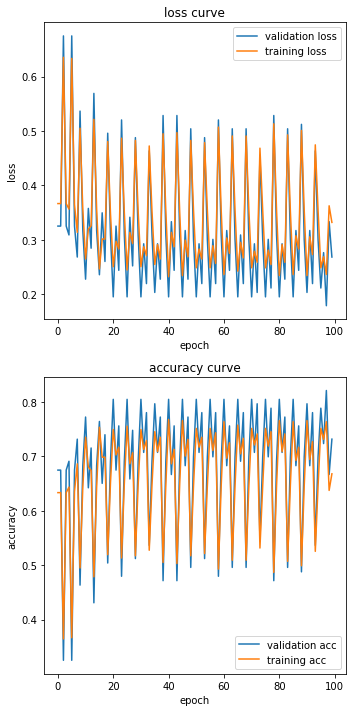

In [97]:
epoch_list = list(range(10,110,10))
best_acc_ep = 0
best_epoch = 0


for epoch_item in epoch_list:
    val_loss_list_ep = []
    train_loss_list_ep = []
    val_acc_list_ep = []
    train_acc_list_ep = []
    np.random.seed(0)
    initial_weight_ep = np.random.rand(8)
    weight_ep = initial_weight_ep
    print(epoch_item)
    for i in range(epoch_item):
        weight_ep = update_weight(X_train, y_train, weight_ep)

        y_train_pred_ep = make_prediction(X_train, y_train, weight_ep)
        y_val_pred_ep = make_prediction(X_val, y_val, weight_ep)

        train_acc_ep = accuracy_score(y_train, y_train_pred_ep)
        val_acc_ep = accuracy_score(y_val, y_val_pred_ep)

        train_acc_list_ep.append(train_acc_ep)
        val_acc_list_ep.append(val_acc_ep)

        train_loss_ep = zero_one_loss(X_train, y_train, weight_ep)
        val_loss_ep = zero_one_loss(X_val, y_val, weight_ep)

        train_loss_list_ep.append(train_loss_ep)
        val_loss_list_ep.append(val_loss_ep)


        if val_acc_ep>best_acc_ep:
            best_acc_ep = val_acc_ep
            best_epoch = epoch_item
        print('EPOCH %d'%(epoch_item) ,'ITERATION %d'%(i+1), f'LR 0.001')

        print('train acc: %.5f'%train_acc_ep, 'val acc: %.5f'%val_acc_ep, 
              'best acc: %.5f'%best_acc_ep, f'best epoch:{best_epoch}')
        print('train loss: %.5f'%train_loss_ep, 'val loss: %.5f'%val_loss_ep)

        print('----')
    print(f'sample= {n_samples} and feature = {n_features}') 

    print('EPOCH %d'%(epoch_item) ,'ITERATION %d'%(i+1), f'LR 0.001')
    plot_graph(epoch_item, val_loss_list_ep, train_loss_list_ep, val_acc_list_ep, train_acc_list_ep, figsize=(5,10))

# experiment 6: bias, lr, epoch 

EPOCH 10 ITERATION 1 LR1
weight  [-186.62769      25.1473487    25.58637488 -180.86925492 -255.9687788
  -32.74604786 -210.27547989 -204.4082377 ]
train acc: 0.63340 val acc: 0.67480 best acc: 0.67480 best epoch:10 best lr:1 best weight:[-186.62769      25.1473487    25.58637488 -180.86925492 -255.9687788
  -32.74604786 -210.27547989 -204.4082377 ]
train loss: 0.36660 val loss: 0.32520
----
EPOCH 10 ITERATION 2 LR1
weight  [-111.333555    -48.83254082   -5.52838732  -81.37432152 -119.1342705
  -40.46885595 -101.01501953 -122.2082364 ]
train acc: 0.63544 val acc: 0.67480 best acc: 0.67480 best epoch:10 best lr:1 best weight:[-111.333555    -48.83254082   -5.52838732  -81.37432152 -119.1342705
  -40.46885595 -101.01501953 -122.2082364 ]
train loss: 0.36456 val loss: 0.32520
----
EPOCH 10 ITERATION 3 LR1
weight  [ -35.627655   -122.40539534  -36.29888752   17.98929888   17.4685598
  -48.02325904    7.62972783  -39.7749021 ]
train acc: 0.70061 val acc: 0.63415 best acc: 0.67480 best epoch:

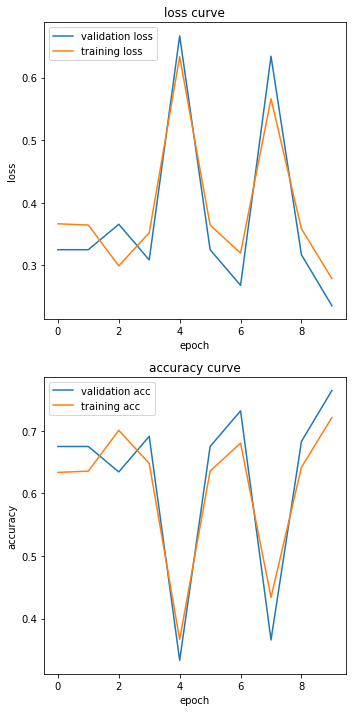

EPOCH 10 ITERATION 1 LR0.1
weight  [-18.16883685   3.1584053    3.10112453 -17.59653063 -25.21558856
  -2.69330008 -20.6337195  -19.63822807]
train acc: 0.63340 val acc: 0.67480 best acc: 0.76423 best epoch:10 best lr:1 best weight:[-119.9217715  -256.44055773  -37.80708982  -19.27336792  -28.3896124
 -127.07692333  -61.05857273 -122.7082549 ]
train loss: 0.36660 val loss: 0.32520
----
EPOCH 10 ITERATION 2 LR0.1
weight  [-1.06394233e+01 -4.23958365e+00 -1.03516939e-02 -7.64703729e+00
 -1.15321377e+01 -3.46558089e+00 -9.70767346e+00 -1.14182279e+01]
train acc: 0.63340 val acc: 0.67480 best acc: 0.76423 best epoch:10 best lr:1 best weight:[-119.9217715  -256.44055773  -37.80708982  -19.27336792  -28.3896124
 -127.07692333  -61.05857273 -122.7082549 ]
train loss: 0.36660 val loss: 0.32520
----
EPOCH 10 ITERATION 3 LR0.1
weight  [ -3.11000985 -11.6375726   -3.12182791   2.30245605   2.1513131
  -4.2378617    1.21837257  -3.19822781]
train acc: 0.61100 val acc: 0.56911 best acc: 0.76423 bes

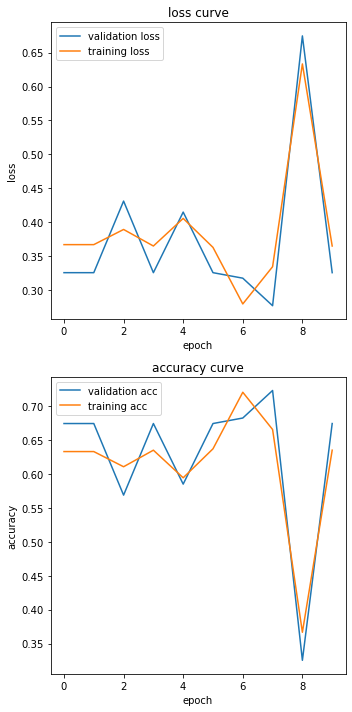

EPOCH 10 ITERATION 1 LR0.001
weight  [0.361637   0.73962153 0.62774699 0.36346904 0.16726237 0.61250217
 0.22687414 0.68647299]
train acc: 0.31365 val acc: 0.24390 best acc: 0.76423 best epoch:10 best lr:1 best weight:[-119.9217715  -256.44055773  -37.80708982  -19.27336792  -28.3896124
 -127.07692333  -61.05857273 -122.7082549 ]
train loss: 0.68635 val loss: 0.75610
----
EPOCH 10 ITERATION 2 LR0.001
weight  [ 0.17734285  0.74279238  0.63815683  0.20143874 -0.0595887   0.57659011
  0.03978277  0.48387298]
train acc: 0.26273 val acc: 0.25203 best acc: 0.76423 best epoch:10 best lr:1 best weight:[-119.9217715  -256.44055773  -37.80708982  -19.27336792  -28.3896124
 -127.07692333  -61.05857273 -122.7082549 ]
train loss: 0.73727 val loss: 0.74797
----
EPOCH 10 ITERATION 3 LR0.001
weight  [ 0.03934283  0.69673209  0.61743551  0.09200438 -0.20590548  0.53098058
 -0.07919075  0.32523964]
train acc: 0.38900 val acc: 0.44715 best acc: 0.76423 best epoch:10 best lr:1 best weight:[-119.9217715  -

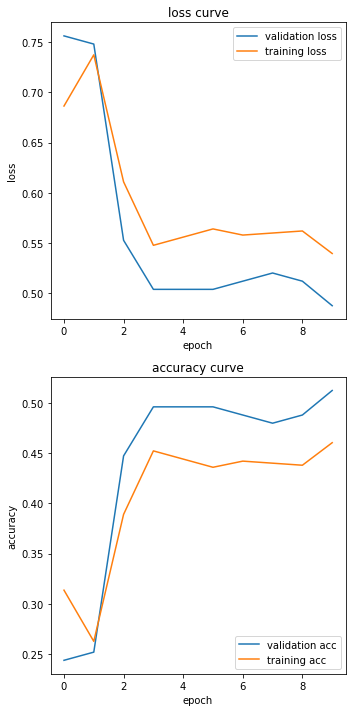

EPOCH 10 ITERATION 1 LR0.0001
weight  [0.53009585 0.71763258 0.60526174 0.52674177 0.39801556 0.64255492
 0.4165159  0.871243  ]
train acc: 0.34420 val acc: 0.29268 best acc: 0.76423 best epoch:10 best lr:1 best weight:[-119.9217715  -256.44055773  -37.80708982  -19.27336792  -28.3896124
 -127.07692333  -61.05857273 -122.7082549 ]
train loss: 0.65580 val loss: 0.70732
----
EPOCH 10 ITERATION 2 LR0.0001
weight  [0.51136644 0.71997329 0.60769125 0.50868318 0.37249546 0.63918264
 0.39554084 0.850723  ]
train acc: 0.34623 val acc: 0.29268 best acc: 0.76423 best epoch:10 best lr:1 best weight:[-119.9217715  -256.44055773  -37.80708982  -19.27336792  -28.3896124
 -127.07692333  -61.05857273 -122.7082549 ]
train loss: 0.65377 val loss: 0.70732
----
EPOCH 10 ITERATION 3 LR0.0001
weight  [0.49264291 0.72221901 0.61008961 0.4907246  0.34707537 0.63583257
 0.37462538 0.83014966]
train acc: 0.34420 val acc: 0.29268 best acc: 0.76423 best epoch:10 best lr:1 best weight:[-119.9217715  -256.44055773 

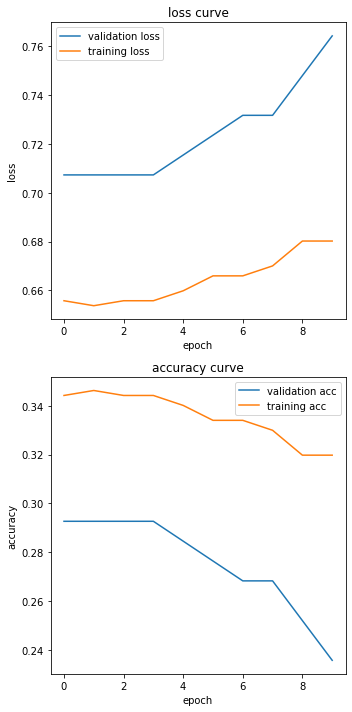

EPOCH 10 ITERATION 1 LR1e-05
weight  [0.54694174 0.71543369 0.60301321 0.54306904 0.42109088 0.64556019
 0.43548008 0.88972   ]
train acc: 0.34827 val acc: 0.29268 best acc: 0.76423 best epoch:10 best lr:1 best weight:[-119.9217715  -256.44055773  -37.80708982  -19.27336792  -28.3896124
 -127.07692333  -61.05857273 -122.7082549 ]
train loss: 0.65173 val loss: 0.70732
----
EPOCH 10 ITERATION 2 LR1e-05
weight  [0.54506997 0.71567801 0.60326305 0.5412549  0.41852695 0.64522627
 0.43337295 0.887667  ]
train acc: 0.34827 val acc: 0.29268 best acc: 0.76423 best epoch:10 best lr:1 best weight:[-119.9217715  -256.44055773  -37.80708982  -19.27336792  -28.3896124
 -127.07692333  -61.05857273 -122.7082549 ]
train loss: 0.65173 val loss: 0.70732
----
EPOCH 10 ITERATION 3 LR1e-05
weight  [0.54319821 0.71592233 0.60351288 0.53944076 0.41596303 0.64489235
 0.43126582 0.885614  ]
train acc: 0.34827 val acc: 0.29268 best acc: 0.76423 best epoch:10 best lr:1 best weight:[-119.9217715  -256.44055773  -3

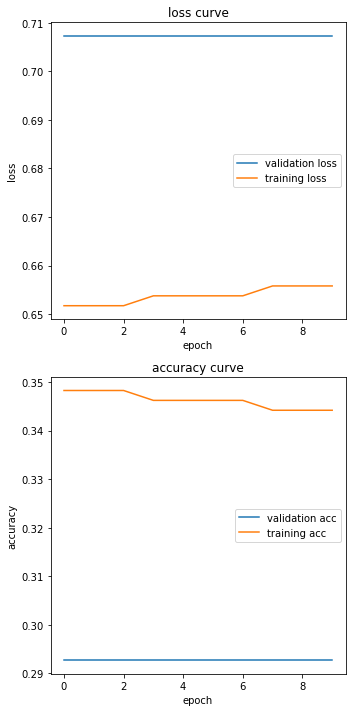

EPOCH 20 ITERATION 1 LR1
weight  [-186.62769      25.1473487    25.58637488 -180.86925492 -255.9687788
  -32.74604786 -210.27547989 -204.4082377 ]
train acc: 0.63340 val acc: 0.67480 best acc: 0.76423 best epoch:10 best lr:1 best weight:[-119.9217715  -256.44055773  -37.80708982  -19.27336792  -28.3896124
 -127.07692333  -61.05857273 -122.7082549 ]
train loss: 0.36660 val loss: 0.32520
----
EPOCH 20 ITERATION 2 LR1
weight  [-111.333555    -48.83254082   -5.52838732  -81.37432152 -119.1342705
  -40.46885595 -101.01501953 -122.2082364 ]
train acc: 0.63544 val acc: 0.67480 best acc: 0.76423 best epoch:10 best lr:1 best weight:[-119.9217715  -256.44055773  -37.80708982  -19.27336792  -28.3896124
 -127.07692333  -61.05857273 -122.7082549 ]
train loss: 0.36456 val loss: 0.32520
----
EPOCH 20 ITERATION 3 LR1
weight  [ -35.627655   -122.40539534  -36.29888752   17.98929888   17.4685598
  -48.02325904    7.62972783  -39.7749021 ]
train acc: 0.70061 val acc: 0.63415 best acc: 0.76423 best epoch:

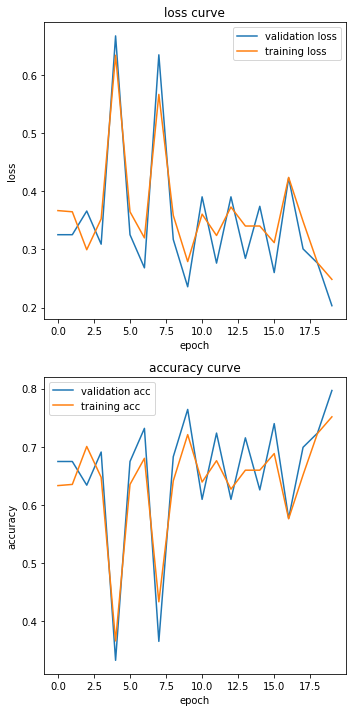

EPOCH 20 ITERATION 1 LR0.1
weight  [-18.16883685   3.1584053    3.10112453 -17.59653063 -25.21558856
  -2.69330008 -20.6337195  -19.63822807]
train acc: 0.63340 val acc: 0.67480 best acc: 0.79675 best epoch:20 best lr:1 best weight:[ -91.921759   -267.05362371   16.40604018  -26.92994912   -2.1177659
 -162.23045302  -83.15849165  -65.7749347 ]
train loss: 0.36660 val loss: 0.32520
----
EPOCH 20 ITERATION 2 LR0.1
weight  [-1.06394233e+01 -4.23958365e+00 -1.03516939e-02 -7.64703729e+00
 -1.15321377e+01 -3.46558089e+00 -9.70767346e+00 -1.14182279e+01]
train acc: 0.63340 val acc: 0.67480 best acc: 0.79675 best epoch:20 best lr:1 best weight:[ -91.921759   -267.05362371   16.40604018  -26.92994912   -2.1177659
 -162.23045302  -83.15849165  -65.7749347 ]
train loss: 0.36660 val loss: 0.32520
----
EPOCH 20 ITERATION 3 LR0.1
weight  [ -3.11000985 -11.6375726   -3.12182791   2.30245605   2.1513131
  -4.2378617    1.21837257  -3.19822781]
train acc: 0.61100 val acc: 0.56911 best acc: 0.79675 bes

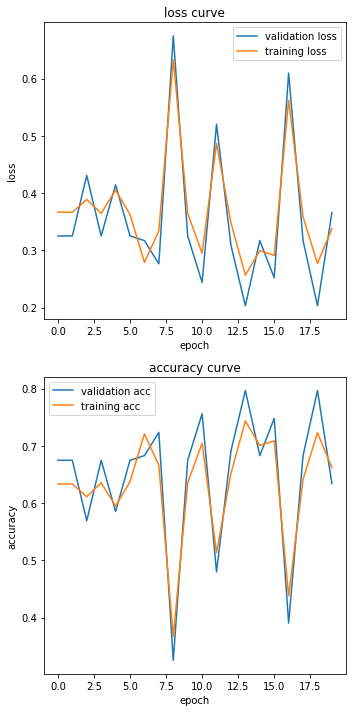

EPOCH 20 ITERATION 1 LR0.001
weight  [0.361637   0.73962153 0.62774699 0.36346904 0.16726237 0.61250217
 0.22687414 0.68647299]
train acc: 0.31365 val acc: 0.24390 best acc: 0.79675 best epoch:20 best lr:1 best weight:[ -91.921759   -267.05362371   16.40604018  -26.92994912   -2.1177659
 -162.23045302  -83.15849165  -65.7749347 ]
train loss: 0.68635 val loss: 0.75610
----
EPOCH 20 ITERATION 2 LR0.001
weight  [ 0.17734285  0.74279238  0.63815683  0.20143874 -0.0595887   0.57659011
  0.03978277  0.48387298]
train acc: 0.26273 val acc: 0.25203 best acc: 0.79675 best epoch:20 best lr:1 best weight:[ -91.921759   -267.05362371   16.40604018  -26.92994912   -2.1177659
 -162.23045302  -83.15849165  -65.7749347 ]
train loss: 0.73727 val loss: 0.74797
----
EPOCH 20 ITERATION 3 LR0.001
weight  [ 0.03934283  0.69673209  0.61743551  0.09200438 -0.20590548  0.53098058
 -0.07919075  0.32523964]
train acc: 0.38900 val acc: 0.44715 best acc: 0.79675 best epoch:20 best lr:1 best weight:[ -91.921759   -

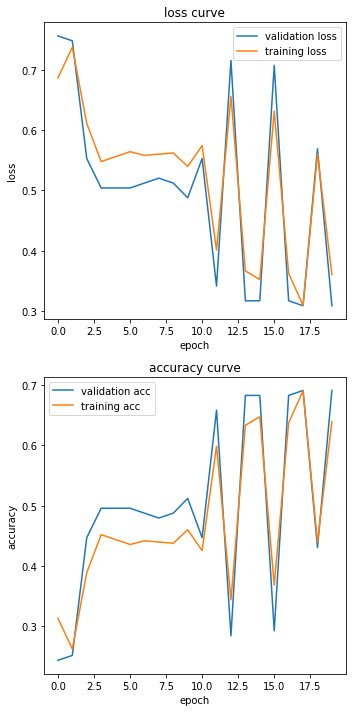

EPOCH 20 ITERATION 1 LR0.0001
weight  [0.53009585 0.71763258 0.60526174 0.52674177 0.39801556 0.64255492
 0.4165159  0.871243  ]
train acc: 0.34420 val acc: 0.29268 best acc: 0.79675 best epoch:20 best lr:1 best weight:[ -91.921759   -267.05362371   16.40604018  -26.92994912   -2.1177659
 -162.23045302  -83.15849165  -65.7749347 ]
train loss: 0.65580 val loss: 0.70732
----
EPOCH 20 ITERATION 2 LR0.0001
weight  [0.51136644 0.71997329 0.60769125 0.50868318 0.37249546 0.63918264
 0.39554084 0.850723  ]
train acc: 0.34623 val acc: 0.29268 best acc: 0.79675 best epoch:20 best lr:1 best weight:[ -91.921759   -267.05362371   16.40604018  -26.92994912   -2.1177659
 -162.23045302  -83.15849165  -65.7749347 ]
train loss: 0.65377 val loss: 0.70732
----
EPOCH 20 ITERATION 3 LR0.0001
weight  [0.49264291 0.72221901 0.61008961 0.4907246  0.34707537 0.63583257
 0.37462538 0.83014966]
train acc: 0.34420 val acc: 0.29268 best acc: 0.79675 best epoch:20 best lr:1 best weight:[ -91.921759   -267.05362371 

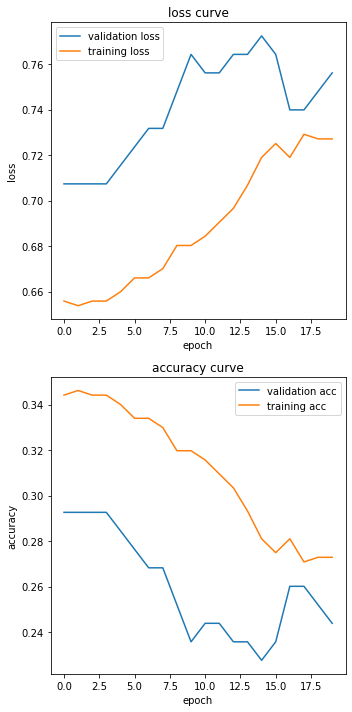

EPOCH 20 ITERATION 1 LR1e-05
weight  [0.54694174 0.71543369 0.60301321 0.54306904 0.42109088 0.64556019
 0.43548008 0.88972   ]
train acc: 0.34827 val acc: 0.29268 best acc: 0.79675 best epoch:20 best lr:1 best weight:[ -91.921759   -267.05362371   16.40604018  -26.92994912   -2.1177659
 -162.23045302  -83.15849165  -65.7749347 ]
train loss: 0.65173 val loss: 0.70732
----
EPOCH 20 ITERATION 2 LR1e-05
weight  [0.54506997 0.71567801 0.60326305 0.5412549  0.41852695 0.64522627
 0.43337295 0.887667  ]
train acc: 0.34827 val acc: 0.29268 best acc: 0.79675 best epoch:20 best lr:1 best weight:[ -91.921759   -267.05362371   16.40604018  -26.92994912   -2.1177659
 -162.23045302  -83.15849165  -65.7749347 ]
train loss: 0.65173 val loss: 0.70732
----
EPOCH 20 ITERATION 3 LR1e-05
weight  [0.54319821 0.71592233 0.60351288 0.53944076 0.41596303 0.64489235
 0.43126582 0.885614  ]
train acc: 0.34827 val acc: 0.29268 best acc: 0.79675 best epoch:20 best lr:1 best weight:[ -91.921759   -267.05362371   1

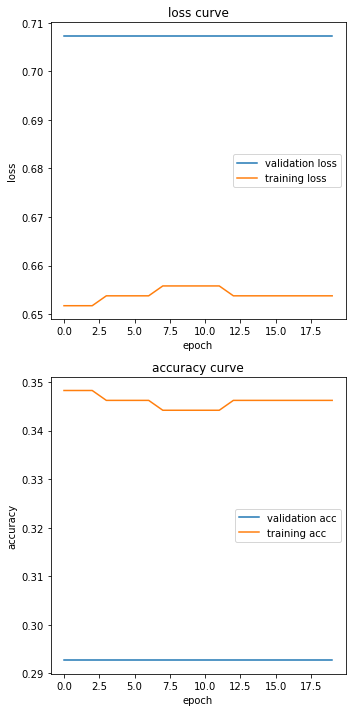

EPOCH 30 ITERATION 1 LR1
weight  [-186.62769      25.1473487    25.58637488 -180.86925492 -255.9687788
  -32.74604786 -210.27547989 -204.4082377 ]
train acc: 0.63340 val acc: 0.67480 best acc: 0.79675 best epoch:20 best lr:1 best weight:[ -91.921759   -267.05362371   16.40604018  -26.92994912   -2.1177659
 -162.23045302  -83.15849165  -65.7749347 ]
train loss: 0.36660 val loss: 0.32520
----
EPOCH 30 ITERATION 2 LR1
weight  [-111.333555    -48.83254082   -5.52838732  -81.37432152 -119.1342705
  -40.46885595 -101.01501953 -122.2082364 ]
train acc: 0.63544 val acc: 0.67480 best acc: 0.79675 best epoch:20 best lr:1 best weight:[ -91.921759   -267.05362371   16.40604018  -26.92994912   -2.1177659
 -162.23045302  -83.15849165  -65.7749347 ]
train loss: 0.36456 val loss: 0.32520
----
EPOCH 30 ITERATION 3 LR1
weight  [ -35.627655   -122.40539534  -36.29888752   17.98929888   17.4685598
  -48.02325904    7.62972783  -39.7749021 ]
train acc: 0.70061 val acc: 0.63415 best acc: 0.79675 best epoch:

EPOCH 30 ITERATION 29 LR1
weight  [ -41.921739   -212.03855882   33.27491268   13.33267308   72.6410796
 -154.99053594  -49.09788163   11.3917224 ]
train acc: 0.56823 val acc: 0.58537 best acc: 0.80488 best epoch:30 best lr:1 best weight:[ -41.921739   -212.03855882   33.27491268   13.33267308   72.6410796
 -154.99053594  -49.09788163   11.3917224 ]
train loss: 0.43177 val loss: 0.41463
----
EPOCH 30 ITERATION 30 LR1
weight  [-148.627643   -165.75715733   57.42246138  -97.51580202  -86.0657757
 -157.72674676 -180.39677033 -107.9749502 ]
train acc: 0.64562 val acc: 0.68293 best acc: 0.80488 best epoch:30 best lr:1 best weight:[-148.627643   -165.75715733   57.42246138  -97.51580202  -86.0657757
 -157.72674676 -180.39677033 -107.9749502 ]
train loss: 0.35438 val loss: 0.31707
----
sample= 768 and feature = 8
EPOCH 30 ITERATION 30 LR1


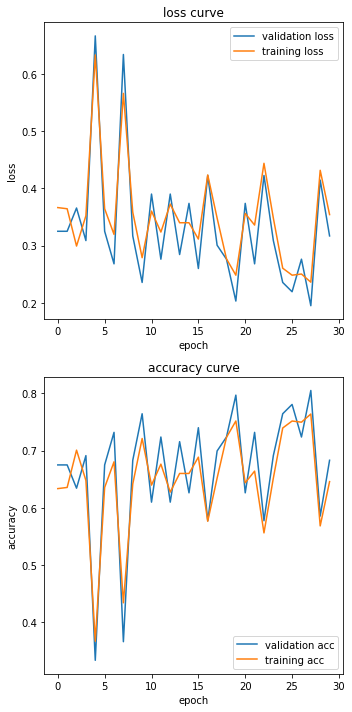

EPOCH 30 ITERATION 1 LR0.1
weight  [-18.16883685   3.1584053    3.10112453 -17.59653063 -25.21558856
  -2.69330008 -20.6337195  -19.63822807]
train acc: 0.63340 val acc: 0.67480 best acc: 0.80488 best epoch:30 best lr:1 best weight:[-148.627643   -165.75715733   57.42246138  -97.51580202  -86.0657757
 -157.72674676 -180.39677033 -107.9749502 ]
train loss: 0.36660 val loss: 0.32520
----
EPOCH 30 ITERATION 2 LR0.1
weight  [-1.06394233e+01 -4.23958365e+00 -1.03516939e-02 -7.64703729e+00
 -1.15321377e+01 -3.46558089e+00 -9.70767346e+00 -1.14182279e+01]
train acc: 0.63340 val acc: 0.67480 best acc: 0.80488 best epoch:30 best lr:1 best weight:[-148.627643   -165.75715733   57.42246138  -97.51580202  -86.0657757
 -157.72674676 -180.39677033 -107.9749502 ]
train loss: 0.36660 val loss: 0.32520
----
EPOCH 30 ITERATION 3 LR0.1
weight  [ -3.11000985 -11.6375726   -3.12182791   2.30245605   2.1513131
  -4.2378617    1.21837257  -3.19822781]
train acc: 0.61100 val acc: 0.56911 best acc: 0.80488 bes

EPOCH 30 ITERATION 28 LR0.1
weight  [ -4.3688306  -28.01646551   2.9781743    3.61154033   8.63452192
 -16.89897061  -3.01758269  -0.38823169]
train acc: 0.51324 val acc: 0.48780 best acc: 0.81301 best epoch:30 best lr:0.1 best weight:[ -4.3688306  -28.01646551   2.9781743    3.61154033   8.63452192
 -16.89897061  -3.01758269  -0.38823169]
train loss: 0.48676 val loss: 0.51220
----
EPOCH 30 ITERATION 29 LR0.1
weight  [-17.5747153  -23.14963196   5.75194554 -10.20967099 -10.52268846
 -18.0213247  -19.09034066 -14.72489885]
train acc: 0.64766 val acc: 0.69106 best acc: 0.81301 best epoch:30 best lr:0.1 best weight:[-17.5747153  -23.14963196   5.75194554 -10.20967099 -10.52268846
 -18.0213247  -19.09034066 -14.72489885]
train loss: 0.35234 val loss: 0.30894
----
EPOCH 30 ITERATION 30 LR0.1
weight  [-10.0982429  -29.94108841   2.96342022  -0.43492505   2.77589255
 -18.55053551  -8.2393587   -6.70156545]
train acc: 0.75560 val acc: 0.80488 best acc: 0.81301 best epoch:30 best lr:0.1 best we

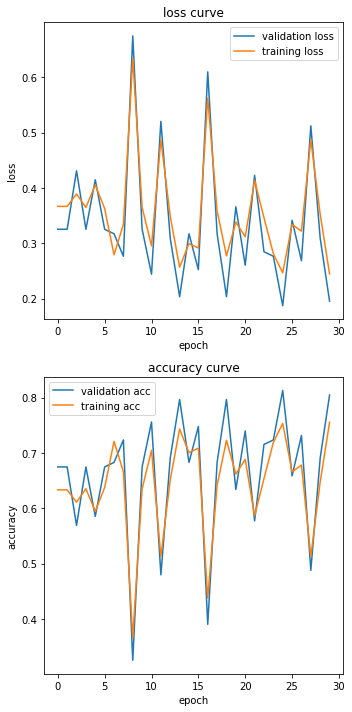

EPOCH 30 ITERATION 1 LR0.001
weight  [0.361637   0.73962153 0.62774699 0.36346904 0.16726237 0.61250217
 0.22687414 0.68647299]
train acc: 0.31365 val acc: 0.24390 best acc: 0.81301 best epoch:30 best lr:0.1 best weight:[-10.0982429  -29.94108841   2.96342022  -0.43492505   2.77589255
 -18.55053551  -8.2393587   -6.70156545]
train loss: 0.68635 val loss: 0.75610
----
EPOCH 30 ITERATION 2 LR0.001
weight  [ 0.17734285  0.74279238  0.63815683  0.20143874 -0.0595887   0.57659011
  0.03978277  0.48387298]
train acc: 0.26273 val acc: 0.25203 best acc: 0.81301 best epoch:30 best lr:0.1 best weight:[-10.0982429  -29.94108841   2.96342022  -0.43492505   2.77589255
 -18.55053551  -8.2393587   -6.70156545]
train loss: 0.73727 val loss: 0.74797
----
EPOCH 30 ITERATION 3 LR0.001
weight  [ 0.03934283  0.69673209  0.61743551  0.09200438 -0.20590548  0.53098058
 -0.07919075  0.32523964]
train acc: 0.38900 val acc: 0.44715 best acc: 0.81301 best epoch:30 best lr:0.1 best weight:[-10.0982429  -29.941088

EPOCH 30 ITERATION 28 LR0.001
weight  [-0.08201005 -0.2628708  -0.00195806  0.04451915 -0.00908523 -0.06029368
 -0.01535562  0.01230623]
train acc: 0.69450 val acc: 0.66667 best acc: 0.81301 best epoch:30 best lr:0.1 best weight:[-10.0982429  -29.94108841   2.96342022  -0.43492505   2.77589255
 -18.55053551  -8.2393587   -6.70156545]
train loss: 0.30550 val loss: 0.33333
----
EPOCH 30 ITERATION 29 LR0.001
weight  [-0.1185983  -0.21932306  0.01782883 -0.02412731 -0.0839032  -0.0690746
 -0.08393889 -0.03346044]
train acc: 0.69246 val acc: 0.73984 best acc: 0.81301 best epoch:30 best lr:0.1 best weight:[-10.0982429  -29.94108841   2.96342022  -0.43492505   2.77589255
 -18.55053551  -8.2393587   -6.70156545]
train loss: 0.30754 val loss: 0.26016
----
EPOCH 30 ITERATION 30 LR0.001
weight  [-0.05277476 -0.26222256 -0.00202363  0.05840803  0.03393131 -0.07131455
  0.00870757  0.03583956]
train acc: 0.40937 val acc: 0.38211 best acc: 0.81301 best epoch:30 best lr:0.1 best weight:[-10.0982429  

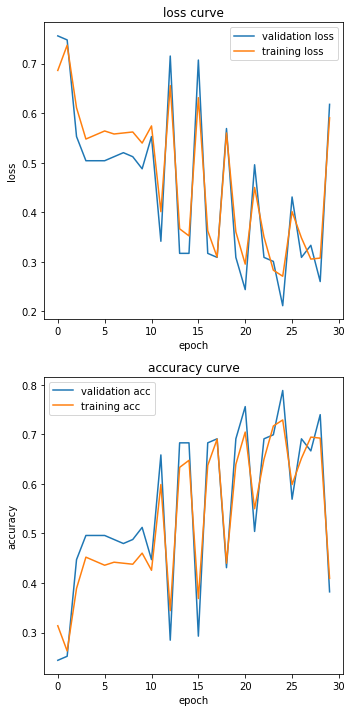

EPOCH 30 ITERATION 1 LR0.0001
weight  [0.53009585 0.71763258 0.60526174 0.52674177 0.39801556 0.64255492
 0.4165159  0.871243  ]
train acc: 0.34420 val acc: 0.29268 best acc: 0.81301 best epoch:30 best lr:0.1 best weight:[-10.0982429  -29.94108841   2.96342022  -0.43492505   2.77589255
 -18.55053551  -8.2393587   -6.70156545]
train loss: 0.65580 val loss: 0.70732
----
EPOCH 30 ITERATION 2 LR0.0001
weight  [0.51136644 0.71997329 0.60769125 0.50868318 0.37249546 0.63918264
 0.39554084 0.850723  ]
train acc: 0.34623 val acc: 0.29268 best acc: 0.81301 best epoch:30 best lr:0.1 best weight:[-10.0982429  -29.94108841   2.96342022  -0.43492505   2.77589255
 -18.55053551  -8.2393587   -6.70156545]
train loss: 0.65377 val loss: 0.70732
----
EPOCH 30 ITERATION 3 LR0.0001
weight  [0.49264291 0.72221901 0.61008961 0.4907246  0.34707537 0.63583257
 0.37462538 0.83014966]
train acc: 0.34420 val acc: 0.29268 best acc: 0.81301 best epoch:30 best lr:0.1 best weight:[-10.0982429  -29.94108841   2.963420

EPOCH 30 ITERATION 28 LR0.0001
weight  [ 0.08572519  0.67866224  0.60286665  0.14369428 -0.13378231  0.53642841
 -0.02050809  0.37477964]
train acc: 0.28921 val acc: 0.34959 best acc: 0.81301 best epoch:30 best lr:0.1 best weight:[-10.0982429  -29.94108841   2.96342022  -0.43492505   2.77589255
 -18.55053551  -8.2393587   -6.70156545]
train loss: 0.71079 val loss: 0.65041
----
EPOCH 30 ITERATION 29 LR0.0001
weight  [ 0.07520166  0.67244365  0.59924698  0.13696599 -0.14303267  0.53231381
 -0.02800911  0.36199297]
train acc: 0.29532 val acc: 0.38211 best acc: 0.81301 best epoch:30 best lr:0.1 best weight:[-10.0982429  -29.94108841   2.96342022  -0.43492505   2.77589255
 -18.55053551  -8.2393587   -6.70156545]
train loss: 0.70468 val loss: 0.61789
----
EPOCH 30 ITERATION 30 LR0.0001
weight  [ 0.06546049  0.66600043  0.59536829  0.13109932 -0.15133716  0.52830904
 -0.03479963  0.3497863 ]
train acc: 0.30957 val acc: 0.39837 best acc: 0.81301 best epoch:30 best lr:0.1 best weight:[-10.09824

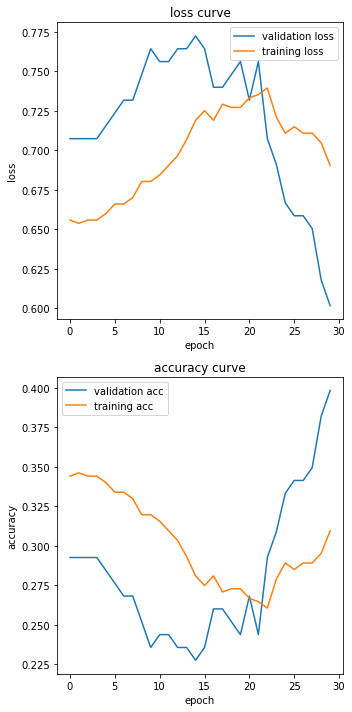

EPOCH 30 ITERATION 1 LR1e-05
weight  [0.54694174 0.71543369 0.60301321 0.54306904 0.42109088 0.64556019
 0.43548008 0.88972   ]
train acc: 0.34827 val acc: 0.29268 best acc: 0.81301 best epoch:30 best lr:0.1 best weight:[-10.0982429  -29.94108841   2.96342022  -0.43492505   2.77589255
 -18.55053551  -8.2393587   -6.70156545]
train loss: 0.65173 val loss: 0.70732
----
EPOCH 30 ITERATION 2 LR1e-05
weight  [0.54506997 0.71567801 0.60326305 0.5412549  0.41852695 0.64522627
 0.43337295 0.887667  ]
train acc: 0.34827 val acc: 0.29268 best acc: 0.81301 best epoch:30 best lr:0.1 best weight:[-10.0982429  -29.94108841   2.96342022  -0.43492505   2.77589255
 -18.55053551  -8.2393587   -6.70156545]
train loss: 0.65173 val loss: 0.70732
----
EPOCH 30 ITERATION 3 LR1e-05
weight  [0.54319821 0.71592233 0.60351288 0.53944076 0.41596303 0.64489235
 0.43126582 0.885614  ]
train acc: 0.34827 val acc: 0.29268 best acc: 0.81301 best epoch:30 best lr:0.1 best weight:[-10.0982429  -29.94108841   2.96342022 

EPOCH 30 ITERATION 28 LR1e-05
weight  [0.49640526 0.72160303 0.60950469 0.4944751  0.35235896 0.63649397
 0.3789256  0.83423366]
train acc: 0.34623 val acc: 0.29268 best acc: 0.81301 best epoch:30 best lr:0.1 best weight:[-10.0982429  -29.94108841   2.96342022  -0.43492505   2.77589255
 -18.55053551  -8.2393587   -6.70156545]
train loss: 0.65377 val loss: 0.70732
----
EPOCH 30 ITERATION 29 LR1e-05
weight  [0.49453644 0.72181354 0.60972157 0.49269662 0.34984901 0.63615494
 0.3768606  0.83216966]
train acc: 0.34623 val acc: 0.29268 best acc: 0.81301 best epoch:30 best lr:0.1 best weight:[-10.0982429  -29.94108841   2.96342022  -0.43492505   2.77589255
 -18.55053551  -8.2393587   -6.70156545]
train loss: 0.65377 val loss: 0.70732
----
EPOCH 30 ITERATION 30 LR1e-05
weight  [0.49266761 0.72202404 0.60993846 0.49091813 0.34733906 0.6358159
 0.37479561 0.83010566]
train acc: 0.34420 val acc: 0.29268 best acc: 0.81301 best epoch:30 best lr:0.1 best weight:[-10.0982429  -29.94108841   2.9634202

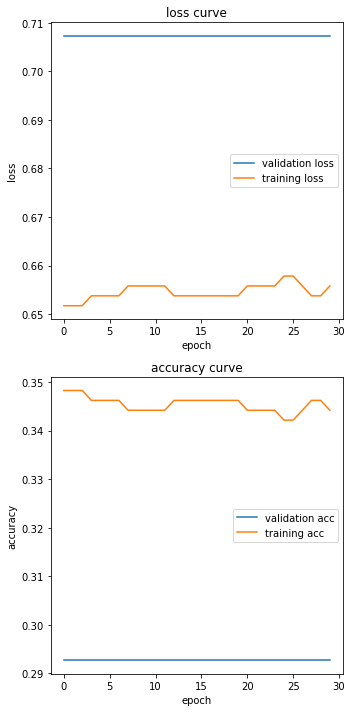

EPOCH 40 ITERATION 1 LR1
weight  [-186.62769      25.1473487    25.58637488 -180.86925492 -255.9687788
  -32.74604786 -210.27547989 -204.4082377 ]
train acc: 0.63340 val acc: 0.67480 best acc: 0.81301 best epoch:30 best lr:0.1 best weight:[-10.0982429  -29.94108841   2.96342022  -0.43492505   2.77589255
 -18.55053551  -8.2393587   -6.70156545]
train loss: 0.36660 val loss: 0.32520
----
EPOCH 40 ITERATION 2 LR1
weight  [-111.333555    -48.83254082   -5.52838732  -81.37432152 -119.1342705
  -40.46885595 -101.01501953 -122.2082364 ]
train acc: 0.63544 val acc: 0.67480 best acc: 0.81301 best epoch:30 best lr:0.1 best weight:[-10.0982429  -29.94108841   2.96342022  -0.43492505   2.77589255
 -18.55053551  -8.2393587   -6.70156545]
train loss: 0.36456 val loss: 0.32520
----
EPOCH 40 ITERATION 3 LR1
weight  [ -35.627655   -122.40539534  -36.29888752   17.98929888   17.4685598
  -48.02325904    7.62972783  -39.7749021 ]
train acc: 0.70061 val acc: 0.63415 best acc: 0.81301 best epoch:30 best lr

EPOCH 40 ITERATION 28 LR1
weight  [ -73.686454   -218.8626793    37.14376338  -18.24308232   27.4495916
 -159.91750559  -84.15082273  -23.0082777 ]
train acc: 0.76375 val acc: 0.80488 best acc: 0.81301 best epoch:30 best lr:0.1 best weight:[-10.0982429  -29.94108841   2.96342022  -0.43492505   2.77589255
 -18.55053551  -8.2393587   -6.70156545]
train loss: 0.23625 val loss: 0.19512
----
EPOCH 40 ITERATION 29 LR1
weight  [ -41.921739   -212.03855882   33.27491268   13.33267308   72.6410796
 -154.99053594  -49.09788163   11.3917224 ]
train acc: 0.56823 val acc: 0.58537 best acc: 0.81301 best epoch:30 best lr:0.1 best weight:[-10.0982429  -29.94108841   2.96342022  -0.43492505   2.77589255
 -18.55053551  -8.2393587   -6.70156545]
train loss: 0.43177 val loss: 0.41463
----
EPOCH 40 ITERATION 30 LR1
weight  [-148.627643   -165.75715733   57.42246138  -97.51580202  -86.0657757
 -157.72674676 -180.39677033 -107.9749502 ]
train acc: 0.64562 val acc: 0.68293 best acc: 0.81301 best epoch:30 best

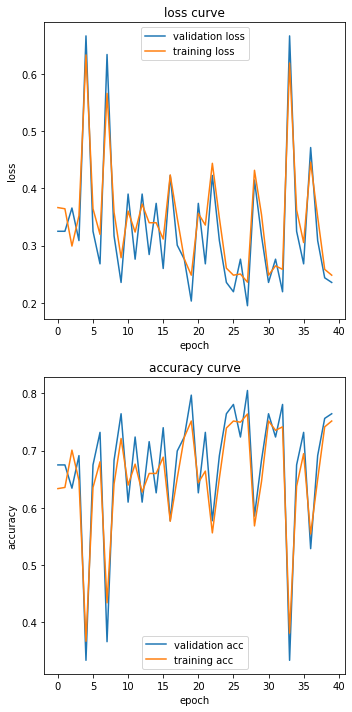

EPOCH 40 ITERATION 1 LR0.1
weight  [-18.16883685   3.1584053    3.10112453 -17.59653063 -25.21558856
  -2.69330008 -20.6337195  -19.63822807]
train acc: 0.63340 val acc: 0.67480 best acc: 0.81301 best epoch:30 best lr:0.1 best weight:[-10.0982429  -29.94108841   2.96342022  -0.43492505   2.77589255
 -18.55053551  -8.2393587   -6.70156545]
train loss: 0.36660 val loss: 0.32520
----
EPOCH 40 ITERATION 2 LR0.1
weight  [-1.06394233e+01 -4.23958365e+00 -1.03516939e-02 -7.64703729e+00
 -1.15321377e+01 -3.46558089e+00 -9.70767346e+00 -1.14182279e+01]
train acc: 0.63340 val acc: 0.67480 best acc: 0.81301 best epoch:30 best lr:0.1 best weight:[-10.0982429  -29.94108841   2.96342022  -0.43492505   2.77589255
 -18.55053551  -8.2393587   -6.70156545]
train loss: 0.36660 val loss: 0.32520
----
EPOCH 40 ITERATION 3 LR0.1
weight  [ -3.11000985 -11.6375726   -3.12182791   2.30245605   2.1513131
  -4.2378617    1.21837257  -3.19822781]
train acc: 0.61100 val acc: 0.56911 best acc: 0.81301 best epoch:30

EPOCH 40 ITERATION 27 LR0.1
weight  [-11.28647935 -22.81546096   5.31260114  -5.1076503   -3.49810168
 -16.61551228 -13.0431161   -7.96156489]
train acc: 0.67821 val acc: 0.73171 best acc: 0.81301 best epoch:30 best lr:0.1 best weight:[-10.0982429  -29.94108841   2.96342022  -0.43492505   2.77589255
 -18.55053551  -8.2393587   -6.70156545]
train loss: 0.32179 val loss: 0.26829
----
EPOCH 40 ITERATION 28 LR0.1
weight  [ -4.3688306  -28.01646551   2.9781743    3.61154033   8.63452192
 -16.89897061  -3.01758269  -0.38823169]
train acc: 0.51324 val acc: 0.48780 best acc: 0.81301 best epoch:30 best lr:0.1 best weight:[-10.0982429  -29.94108841   2.96342022  -0.43492505   2.77589255
 -18.55053551  -8.2393587   -6.70156545]
train loss: 0.48676 val loss: 0.51220
----
EPOCH 40 ITERATION 29 LR0.1
weight  [-17.5747153  -23.14963196   5.75194554 -10.20967099 -10.52268846
 -18.0213247  -19.09034066 -14.72489885]
train acc: 0.64766 val acc: 0.69106 best acc: 0.81301 best epoch:30 best lr:0.1 best we

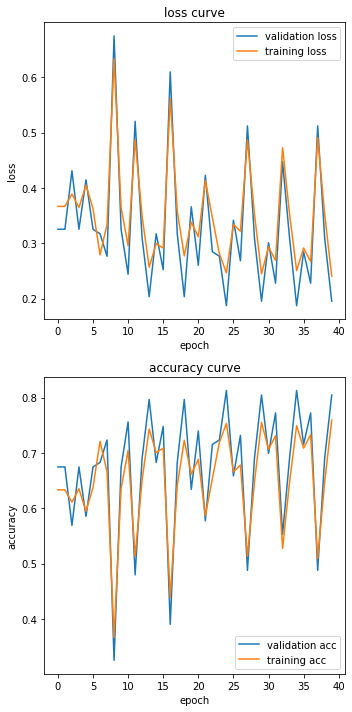

EPOCH 40 ITERATION 1 LR0.001
weight  [0.361637   0.73962153 0.62774699 0.36346904 0.16726237 0.61250217
 0.22687414 0.68647299]
train acc: 0.31365 val acc: 0.24390 best acc: 0.81301 best epoch:30 best lr:0.1 best weight:[-10.0982429  -29.94108841   2.96342022  -0.43492505   2.77589255
 -18.55053551  -8.2393587   -6.70156545]
train loss: 0.68635 val loss: 0.75610
----
EPOCH 40 ITERATION 2 LR0.001
weight  [ 0.17734285  0.74279238  0.63815683  0.20143874 -0.0595887   0.57659011
  0.03978277  0.48387298]
train acc: 0.26273 val acc: 0.25203 best acc: 0.81301 best epoch:30 best lr:0.1 best weight:[-10.0982429  -29.94108841   2.96342022  -0.43492505   2.77589255
 -18.55053551  -8.2393587   -6.70156545]
train loss: 0.73727 val loss: 0.74797
----
EPOCH 40 ITERATION 3 LR0.001
weight  [ 0.03934283  0.69673209  0.61743551  0.09200438 -0.20590548  0.53098058
 -0.07919075  0.32523964]
train acc: 0.38900 val acc: 0.44715 best acc: 0.81301 best epoch:30 best lr:0.1 best weight:[-10.0982429  -29.941088

EPOCH 40 ITERATION 27 LR0.001
weight  [-0.15665713 -0.19669493  0.02592719 -0.05177376 -0.14367388 -0.05414315
 -0.12110968 -0.06872711]
train acc: 0.65173 val acc: 0.69106 best acc: 0.81301 best epoch:30 best lr:0.1 best weight:[-10.0982429  -29.94108841   2.96342022  -0.43492505   2.77589255
 -18.55053551  -8.2393587   -6.70156545]
train loss: 0.34827 val loss: 0.30894
----
EPOCH 40 ITERATION 28 LR0.001
weight  [-0.08201005 -0.2628708  -0.00195806  0.04451915 -0.00908523 -0.06029368
 -0.01535562  0.01230623]
train acc: 0.69450 val acc: 0.66667 best acc: 0.81301 best epoch:30 best lr:0.1 best weight:[-10.0982429  -29.94108841   2.96342022  -0.43492505   2.77589255
 -18.55053551  -8.2393587   -6.70156545]
train loss: 0.30550 val loss: 0.33333
----
EPOCH 40 ITERATION 29 LR0.001
weight  [-0.1185983  -0.21932306  0.01782883 -0.02412731 -0.0839032  -0.0690746
 -0.08393889 -0.03346044]
train acc: 0.69246 val acc: 0.73984 best acc: 0.81301 best epoch:30 best lr:0.1 best weight:[-10.0982429  

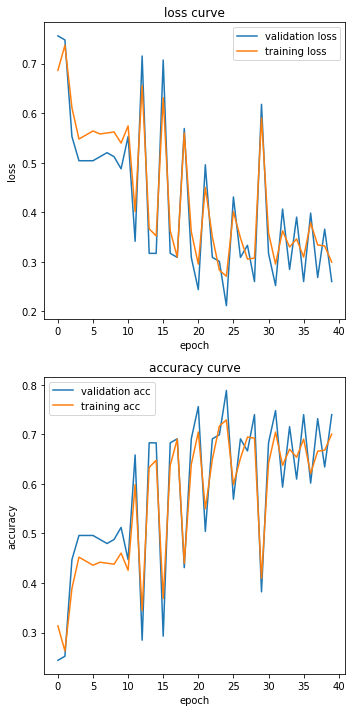

EPOCH 40 ITERATION 1 LR0.0001
weight  [0.53009585 0.71763258 0.60526174 0.52674177 0.39801556 0.64255492
 0.4165159  0.871243  ]
train acc: 0.34420 val acc: 0.29268 best acc: 0.81301 best epoch:30 best lr:0.1 best weight:[-10.0982429  -29.94108841   2.96342022  -0.43492505   2.77589255
 -18.55053551  -8.2393587   -6.70156545]
train loss: 0.65580 val loss: 0.70732
----
EPOCH 40 ITERATION 2 LR0.0001
weight  [0.51136644 0.71997329 0.60769125 0.50868318 0.37249546 0.63918264
 0.39554084 0.850723  ]
train acc: 0.34623 val acc: 0.29268 best acc: 0.81301 best epoch:30 best lr:0.1 best weight:[-10.0982429  -29.94108841   2.96342022  -0.43492505   2.77589255
 -18.55053551  -8.2393587   -6.70156545]
train loss: 0.65377 val loss: 0.70732
----
EPOCH 40 ITERATION 3 LR0.0001
weight  [0.49264291 0.72221901 0.61008961 0.4907246  0.34707537 0.63583257
 0.37462538 0.83014966]
train acc: 0.34420 val acc: 0.29268 best acc: 0.81301 best epoch:30 best lr:0.1 best weight:[-10.0982429  -29.94108841   2.963420

EPOCH 40 ITERATION 29 LR0.0001
weight  [ 0.07520166  0.67244365  0.59924698  0.13696599 -0.14303267  0.53231381
 -0.02800911  0.36199297]
train acc: 0.29532 val acc: 0.38211 best acc: 0.81301 best epoch:30 best lr:0.1 best weight:[-10.0982429  -29.94108841   2.96342022  -0.43492505   2.77589255
 -18.55053551  -8.2393587   -6.70156545]
train loss: 0.70468 val loss: 0.61789
----
EPOCH 40 ITERATION 30 LR0.0001
weight  [ 0.06546049  0.66600043  0.59536829  0.13109932 -0.15133716  0.52830904
 -0.03479963  0.3497863 ]
train acc: 0.30957 val acc: 0.39837 best acc: 0.81301 best epoch:30 best lr:0.1 best weight:[-10.0982429  -29.94108841   2.96342022  -0.43492505   2.77589255
 -18.55053551  -8.2393587   -6.70156545]
train loss: 0.69043 val loss: 0.60163
----
EPOCH 40 ITERATION 31 LR0.0001
weight  [ 0.05667813  0.65929742  0.59111583  0.1259367  -0.15846198  0.52435062
 -0.04052764  0.33875297]
train acc: 0.31976 val acc: 0.39837 best acc: 0.81301 best epoch:30 best lr:0.1 best weight:[-10.09824

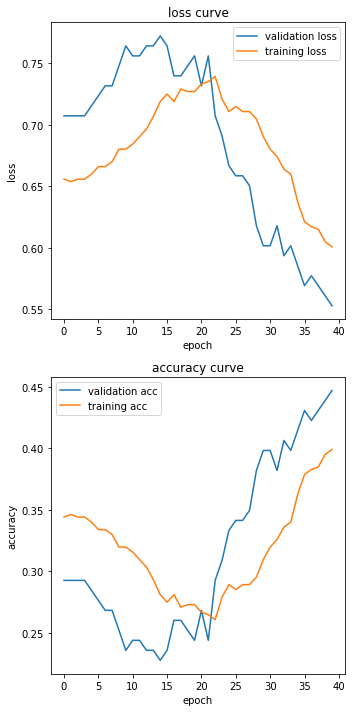

EPOCH 40 ITERATION 1 LR1e-05
weight  [0.54694174 0.71543369 0.60301321 0.54306904 0.42109088 0.64556019
 0.43548008 0.88972   ]
train acc: 0.34827 val acc: 0.29268 best acc: 0.81301 best epoch:30 best lr:0.1 best weight:[-10.0982429  -29.94108841   2.96342022  -0.43492505   2.77589255
 -18.55053551  -8.2393587   -6.70156545]
train loss: 0.65173 val loss: 0.70732
----
EPOCH 40 ITERATION 2 LR1e-05
weight  [0.54506997 0.71567801 0.60326305 0.5412549  0.41852695 0.64522627
 0.43337295 0.887667  ]
train acc: 0.34827 val acc: 0.29268 best acc: 0.81301 best epoch:30 best lr:0.1 best weight:[-10.0982429  -29.94108841   2.96342022  -0.43492505   2.77589255
 -18.55053551  -8.2393587   -6.70156545]
train loss: 0.65173 val loss: 0.70732
----
EPOCH 40 ITERATION 3 LR1e-05
weight  [0.54319821 0.71592233 0.60351288 0.53944076 0.41596303 0.64489235
 0.43126582 0.885614  ]
train acc: 0.34827 val acc: 0.29268 best acc: 0.81301 best epoch:30 best lr:0.1 best weight:[-10.0982429  -29.94108841   2.96342022 

EPOCH 40 ITERATION 29 LR1e-05
weight  [0.49453644 0.72181354 0.60972157 0.49269662 0.34984901 0.63615494
 0.3768606  0.83216966]
train acc: 0.34623 val acc: 0.29268 best acc: 0.81301 best epoch:30 best lr:0.1 best weight:[-10.0982429  -29.94108841   2.96342022  -0.43492505   2.77589255
 -18.55053551  -8.2393587   -6.70156545]
train loss: 0.65377 val loss: 0.70732
----
EPOCH 40 ITERATION 30 LR1e-05
weight  [0.49266761 0.72202404 0.60993846 0.49091813 0.34733906 0.6358159
 0.37479561 0.83010566]
train acc: 0.34420 val acc: 0.29268 best acc: 0.81301 best epoch:30 best lr:0.1 best weight:[-10.0982429  -29.94108841   2.96342022  -0.43492505   2.77589255
 -18.55053551  -8.2393587   -6.70156545]
train loss: 0.65580 val loss: 0.70732
----
EPOCH 40 ITERATION 31 LR1e-05
weight  [0.4907982  0.72222886 0.61015125 0.48914399 0.34483544 0.63547665
 0.37273112 0.82804466]
train acc: 0.34216 val acc: 0.29268 best acc: 0.81301 best epoch:30 best lr:0.1 best weight:[-10.0982429  -29.94108841   2.9634202

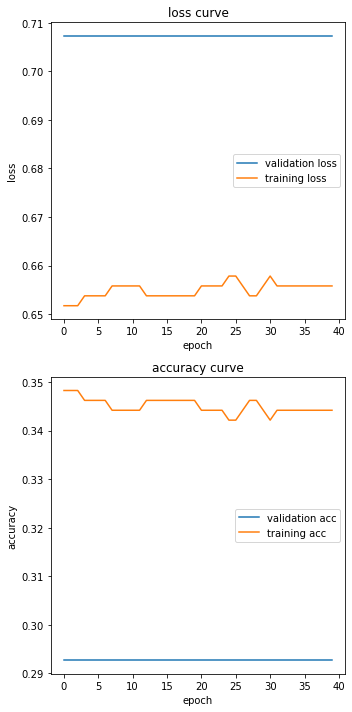

EPOCH 50 ITERATION 1 LR1
weight  [-186.62769      25.1473487    25.58637488 -180.86925492 -255.9687788
  -32.74604786 -210.27547989 -204.4082377 ]
train acc: 0.63340 val acc: 0.67480 best acc: 0.81301 best epoch:30 best lr:0.1 best weight:[-10.0982429  -29.94108841   2.96342022  -0.43492505   2.77589255
 -18.55053551  -8.2393587   -6.70156545]
train loss: 0.36660 val loss: 0.32520
----
EPOCH 50 ITERATION 2 LR1
weight  [-111.333555    -48.83254082   -5.52838732  -81.37432152 -119.1342705
  -40.46885595 -101.01501953 -122.2082364 ]
train acc: 0.63544 val acc: 0.67480 best acc: 0.81301 best epoch:30 best lr:0.1 best weight:[-10.0982429  -29.94108841   2.96342022  -0.43492505   2.77589255
 -18.55053551  -8.2393587   -6.70156545]
train loss: 0.36456 val loss: 0.32520
----
EPOCH 50 ITERATION 3 LR1
weight  [ -35.627655   -122.40539534  -36.29888752   17.98929888   17.4685598
  -48.02325904    7.62972783  -39.7749021 ]
train acc: 0.70061 val acc: 0.63415 best acc: 0.81301 best epoch:30 best lr

EPOCH 50 ITERATION 29 LR1
weight  [ -41.921739   -212.03855882   33.27491268   13.33267308   72.6410796
 -154.99053594  -49.09788163   11.3917224 ]
train acc: 0.56823 val acc: 0.58537 best acc: 0.81301 best epoch:30 best lr:0.1 best weight:[-10.0982429  -29.94108841   2.96342022  -0.43492505   2.77589255
 -18.55053551  -8.2393587   -6.70156545]
train loss: 0.43177 val loss: 0.41463
----
EPOCH 50 ITERATION 30 LR1
weight  [-148.627643   -165.75715733   57.42246138  -97.51580202  -86.0657757
 -157.72674676 -180.39677033 -107.9749502 ]
train acc: 0.64562 val acc: 0.68293 best acc: 0.81301 best epoch:30 best lr:0.1 best weight:[-10.0982429  -29.94108841   2.96342022  -0.43492505   2.77589255
 -18.55053551  -8.2393587   -6.70156545]
train loss: 0.35438 val loss: 0.31707
----
EPOCH 50 ITERATION 31 LR1
weight  [ -73.9217425  -234.39031485   28.73392918    0.74680938   47.3526584
 -163.37205885  -71.43605377  -27.8416162 ]
train acc: 0.75153 val acc: 0.76423 best acc: 0.81301 best epoch:30 best

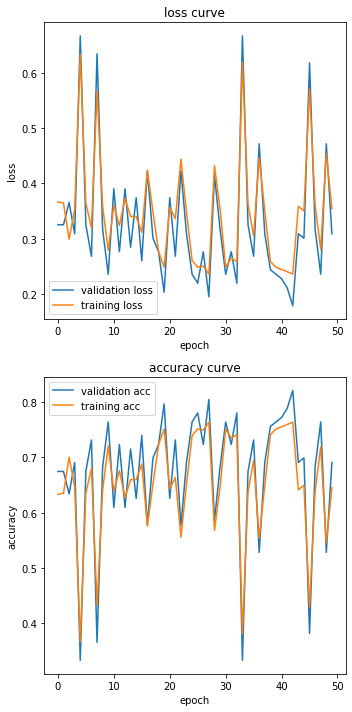

EPOCH 50 ITERATION 1 LR0.1
weight  [-18.16883685   3.1584053    3.10112453 -17.59653063 -25.21558856
  -2.69330008 -20.6337195  -19.63822807]
train acc: 0.63340 val acc: 0.67480 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.36660 val loss: 0.32520
----
EPOCH 50 ITERATION 2 LR0.1
weight  [-1.06394233e+01 -4.23958365e+00 -1.03516939e-02 -7.64703729e+00
 -1.15321377e+01 -3.46558089e+00 -9.70767346e+00 -1.14182279e+01]
train acc: 0.63340 val acc: 0.67480 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.36660 val loss: 0.32520
----
EPOCH 50 ITERATION 3 LR0.1
weight  [ -3.11000985 -11.6375726   -3.12182791   2.30245605   2.1513131
  -4.2378617    1.21837257  -3.19822781]
train acc: 0.61100 val acc: 0.56911 best acc: 0.82114 bes

EPOCH 50 ITERATION 30 LR0.1
weight  [-10.0982429  -29.94108841   2.96342022  -0.43492505   2.77589255
 -18.55053551  -8.2393587   -6.70156545]
train acc: 0.75560 val acc: 0.80488 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.24440 val loss: 0.19512
----
EPOCH 50 ITERATION 31 LR0.1
weight  [ -6.94530095 -28.97023425   2.84374835   2.12669099   6.66927295
 -18.18213062  -5.35063159  -3.16823224]
train acc: 0.70672 val acc: 0.69919 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.29328 val loss: 0.30081
----
EPOCH 50 ITERATION 32 LR0.1
weight  [-1.03923606e+01 -2.50677222e+01  4.72407686e+00 -3.03492461e+00
  7.80711934e-03 -1.78077640e+01 -1.11160462e+01 -6.46823240e+00]
train acc: 0.73116 val acc: 0.77236 best acc: 0.82114

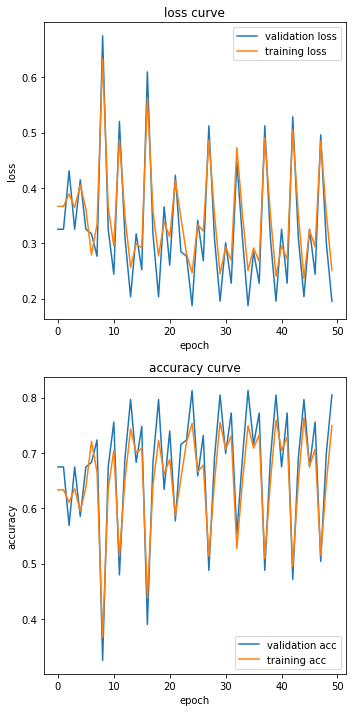

EPOCH 50 ITERATION 1 LR0.001
weight  [0.361637   0.73962153 0.62774699 0.36346904 0.16726237 0.61250217
 0.22687414 0.68647299]
train acc: 0.31365 val acc: 0.24390 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.68635 val loss: 0.75610
----
EPOCH 50 ITERATION 2 LR0.001
weight  [ 0.17734285  0.74279238  0.63815683  0.20143874 -0.0595887   0.57659011
  0.03978277  0.48387298]
train acc: 0.26273 val acc: 0.25203 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.73727 val loss: 0.74797
----
EPOCH 50 ITERATION 3 LR0.001
weight  [ 0.03934283  0.69673209  0.61743551  0.09200438 -0.20590548  0.53098058
 -0.07919075  0.32523964]
train acc: 0.38900 val acc: 0.44715 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -

EPOCH 50 ITERATION 29 LR0.001
weight  [-0.1185983  -0.21932306  0.01782883 -0.02412731 -0.0839032  -0.0690746
 -0.08393889 -0.03346044]
train acc: 0.69246 val acc: 0.73984 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.30754 val loss: 0.26016
----
EPOCH 50 ITERATION 30 LR0.001
weight  [-0.05277476 -0.26222256 -0.00202363  0.05840803  0.03393131 -0.07131455
  0.00870757  0.03583956]
train acc: 0.40937 val acc: 0.38211 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.59063 val loss: 0.61789
----
EPOCH 50 ITERATION 31 LR0.001
weight  [-0.2240689  -0.21720749  0.03097638 -0.11310711 -0.20376845 -0.09530858
 -0.19064769 -0.15069379]
train acc: 0.64155 val acc: 0.68293 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.

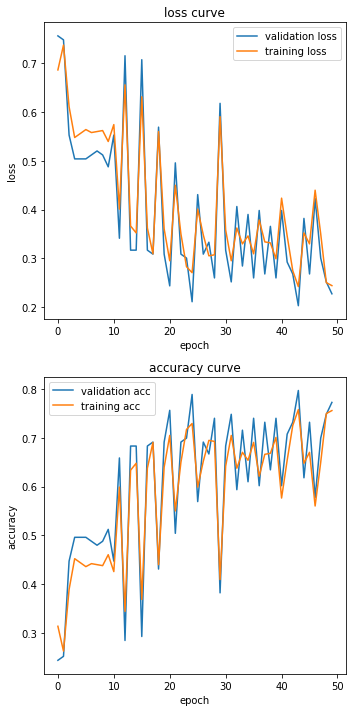

EPOCH 50 ITERATION 1 LR0.0001
weight  [0.53009585 0.71763258 0.60526174 0.52674177 0.39801556 0.64255492
 0.4165159  0.871243  ]
train acc: 0.34420 val acc: 0.29268 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.65580 val loss: 0.70732
----
EPOCH 50 ITERATION 2 LR0.0001
weight  [0.51136644 0.71997329 0.60769125 0.50868318 0.37249546 0.63918264
 0.39554084 0.850723  ]
train acc: 0.34623 val acc: 0.29268 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.65377 val loss: 0.70732
----
EPOCH 50 ITERATION 3 LR0.0001
weight  [0.49264291 0.72221901 0.61008961 0.4907246  0.34707537 0.63583257
 0.37462538 0.83014966]
train acc: 0.34420 val acc: 0.29268 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843 

EPOCH 50 ITERATION 28 LR0.0001
weight  [ 0.08572519  0.67866224  0.60286665  0.14369428 -0.13378231  0.53642841
 -0.02050809  0.37477964]
train acc: 0.28921 val acc: 0.34959 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.71079 val loss: 0.65041
----
EPOCH 50 ITERATION 29 LR0.0001
weight  [ 0.07520166  0.67244365  0.59924698  0.13696599 -0.14303267  0.53231381
 -0.02800911  0.36199297]
train acc: 0.29532 val acc: 0.38211 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.70468 val loss: 0.61789
----
EPOCH 50 ITERATION 30 LR0.0001
weight  [ 0.06546049  0.66600043  0.59536829  0.13109932 -0.15133716  0.52830904
 -0.03479963  0.3497863 ]
train acc: 0.30957 val acc: 0.39837 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-

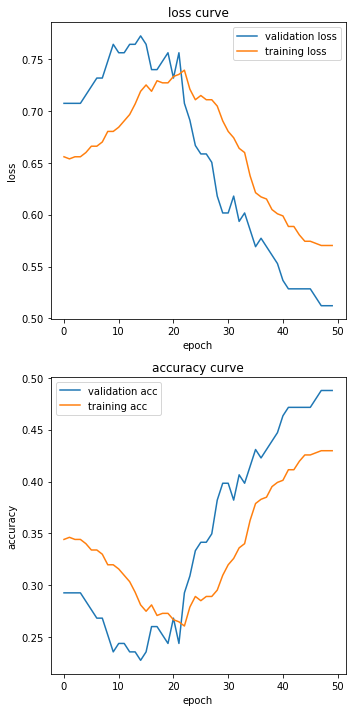

EPOCH 50 ITERATION 1 LR1e-05
weight  [0.54694174 0.71543369 0.60301321 0.54306904 0.42109088 0.64556019
 0.43548008 0.88972   ]
train acc: 0.34827 val acc: 0.29268 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.65173 val loss: 0.70732
----
EPOCH 50 ITERATION 2 LR1e-05
weight  [0.54506997 0.71567801 0.60326305 0.5412549  0.41852695 0.64522627
 0.43337295 0.887667  ]
train acc: 0.34827 val acc: 0.29268 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.65173 val loss: 0.70732
----
EPOCH 50 ITERATION 3 LR1e-05
weight  [0.54319821 0.71592233 0.60351288 0.53944076 0.41596303 0.64489235
 0.43126582 0.885614  ]
train acc: 0.34827 val acc: 0.29268 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   5

EPOCH 50 ITERATION 28 LR1e-05
weight  [0.49640526 0.72160303 0.60950469 0.4944751  0.35235896 0.63649397
 0.3789256  0.83423366]
train acc: 0.34623 val acc: 0.29268 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.65377 val loss: 0.70732
----
EPOCH 50 ITERATION 29 LR1e-05
weight  [0.49453644 0.72181354 0.60972157 0.49269662 0.34984901 0.63615494
 0.3768606  0.83216966]
train acc: 0.34623 val acc: 0.29268 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.65377 val loss: 0.70732
----
EPOCH 50 ITERATION 30 LR1e-05
weight  [0.49266761 0.72202404 0.60993846 0.49091813 0.34733906 0.6358159
 0.37479561 0.83010566]
train acc: 0.34420 val acc: 0.29268 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843  

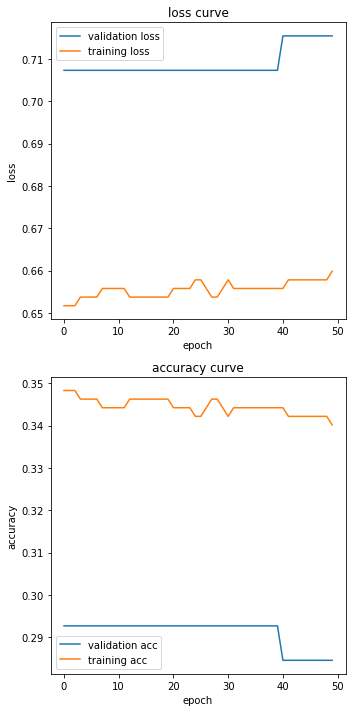

EPOCH 60 ITERATION 1 LR1
weight  [-186.62769      25.1473487    25.58637488 -180.86925492 -255.9687788
  -32.74604786 -210.27547989 -204.4082377 ]
train acc: 0.63340 val acc: 0.67480 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.36660 val loss: 0.32520
----
EPOCH 60 ITERATION 2 LR1
weight  [-111.333555    -48.83254082   -5.52838732  -81.37432152 -119.1342705
  -40.46885595 -101.01501953 -122.2082364 ]
train acc: 0.63544 val acc: 0.67480 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.36456 val loss: 0.32520
----
EPOCH 60 ITERATION 3 LR1
weight  [ -35.627655   -122.40539534  -36.29888752   17.98929888   17.4685598
  -48.02325904    7.62972783  -39.7749021 ]
train acc: 0.70061 val acc: 0.63415 best acc: 0.82114 best epoch:

EPOCH 60 ITERATION 29 LR1
weight  [ -41.921739   -212.03855882   33.27491268   13.33267308   72.6410796
 -154.99053594  -49.09788163   11.3917224 ]
train acc: 0.56823 val acc: 0.58537 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.43177 val loss: 0.41463
----
EPOCH 60 ITERATION 30 LR1
weight  [-148.627643   -165.75715733   57.42246138  -97.51580202  -86.0657757
 -157.72674676 -180.39677033 -107.9749502 ]
train acc: 0.64562 val acc: 0.68293 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.35438 val loss: 0.31707
----
EPOCH 60 ITERATION 31 LR1
weight  [ -73.9217425  -234.39031485   28.73392918    0.74680938   47.3526584
 -163.37205885  -71.43605377  -27.8416162 ]
train acc: 0.75153 val acc: 0.76423 best acc: 0.82114 best epo

EPOCH 60 ITERATION 55 LR1
weight  [ -84.1570065  -189.50591426   49.37332238  -20.28351772   13.9790813
 -175.45257346 -106.77513187  -32.5083272 ]
train acc: 0.73727 val acc: 0.78049 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.26273 val loss: 0.21951
----
EPOCH 60 ITERATION 56 LR1
weight  [ -25.509933   -216.69686438   35.57004208   46.39324568  101.3313233
 -172.13365154  -29.43013177   23.7583385 ]
train acc: 0.38086 val acc: 0.34146 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.61914 val loss: 0.65854
----
EPOCH 60 ITERATION 57 LR1
weight  [-207.3923175  -175.48078925   68.91431288 -130.85927252 -149.0445595
 -195.87134821 -237.53004607 -174.1083381 ]
train acc: 0.63951 val acc: 0.68293 best acc: 0.82114 best epo

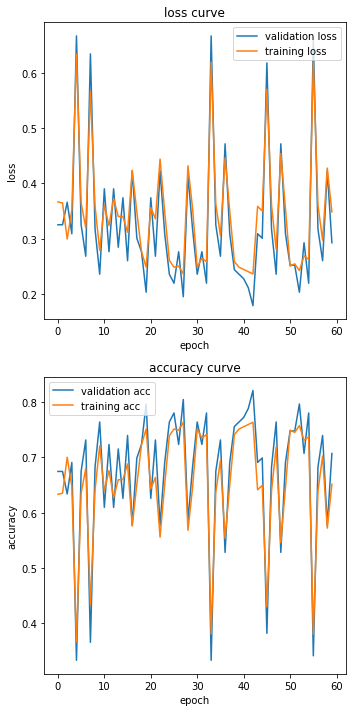

EPOCH 60 ITERATION 1 LR0.1
weight  [-18.16883685   3.1584053    3.10112453 -17.59653063 -25.21558856
  -2.69330008 -20.6337195  -19.63822807]
train acc: 0.63340 val acc: 0.67480 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.36660 val loss: 0.32520
----
EPOCH 60 ITERATION 2 LR0.1
weight  [-1.06394233e+01 -4.23958365e+00 -1.03516939e-02 -7.64703729e+00
 -1.15321377e+01 -3.46558089e+00 -9.70767346e+00 -1.14182279e+01]
train acc: 0.63340 val acc: 0.67480 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.36660 val loss: 0.32520
----
EPOCH 60 ITERATION 3 LR0.1
weight  [ -3.11000985 -11.6375726   -3.12182791   2.30245605   2.1513131
  -4.2378617    1.21837257  -3.19822781]
train acc: 0.61100 val acc: 0.56911 best acc: 0.82114 bes

EPOCH 60 ITERATION 28 LR0.1
weight  [ -4.3688306  -28.01646551   2.9781743    3.61154033   8.63452192
 -16.89897061  -3.01758269  -0.38823169]
train acc: 0.51324 val acc: 0.48780 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.48676 val loss: 0.51220
----
EPOCH 60 ITERATION 29 LR0.1
weight  [-17.5747153  -23.14963196   5.75194554 -10.20967099 -10.52268846
 -18.0213247  -19.09034066 -14.72489885]
train acc: 0.64766 val acc: 0.69106 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.35234 val loss: 0.30894
----
EPOCH 60 ITERATION 30 LR0.1
weight  [-10.0982429  -29.94108841   2.96342022  -0.43492505   2.77589255
 -18.55053551  -8.2393587   -6.70156545]
train acc: 0.75560 val acc: 0.80488 best acc: 0.82114 best epoch:50 best lr:1

EPOCH 60 ITERATION 53 LR0.1
weight  [ -5.4100031  -25.05515886   5.11096553   1.77416252   8.29314472
 -19.52565257  -6.72450458  -1.25490194]
train acc: 0.66191 val acc: 0.67480 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.33809 val loss: 0.32520
----
EPOCH 60 ITERATION 54 LR0.1
weight  [-10.92765145 -20.99787294   6.87654002  -4.63189718  -0.75744641
 -18.99241852 -14.14414592  -7.0382353 ]
train acc: 0.67413 val acc: 0.73984 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.32587 val loss: 0.26016
----
EPOCH 60 ITERATION 55 LR0.1
weight  [ -3.81000265 -26.43505829   4.50276892   4.13173796  11.22765949
 -19.25173374  -3.94132821   0.5450979 ]
train acc: 0.43381 val acc: 0.39024 best acc: 0.82114 best epoch:50 best lr:1

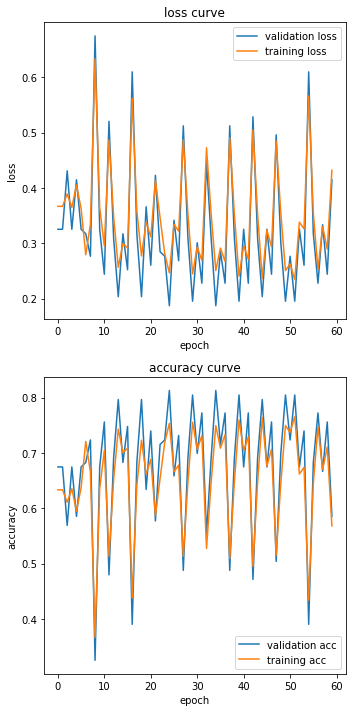

EPOCH 60 ITERATION 1 LR0.001
weight  [0.361637   0.73962153 0.62774699 0.36346904 0.16726237 0.61250217
 0.22687414 0.68647299]
train acc: 0.31365 val acc: 0.24390 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.68635 val loss: 0.75610
----
EPOCH 60 ITERATION 2 LR0.001
weight  [ 0.17734285  0.74279238  0.63815683  0.20143874 -0.0595887   0.57659011
  0.03978277  0.48387298]
train acc: 0.26273 val acc: 0.25203 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.73727 val loss: 0.74797
----
EPOCH 60 ITERATION 3 LR0.001
weight  [ 0.03934283  0.69673209  0.61743551  0.09200438 -0.20590548  0.53098058
 -0.07919075  0.32523964]
train acc: 0.38900 val acc: 0.44715 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -

EPOCH 60 ITERATION 28 LR0.001
weight  [-0.08201005 -0.2628708  -0.00195806  0.04451915 -0.00908523 -0.06029368
 -0.01535562  0.01230623]
train acc: 0.69450 val acc: 0.66667 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.30550 val loss: 0.33333
----
EPOCH 60 ITERATION 29 LR0.001
weight  [-0.1185983  -0.21932306  0.01782883 -0.02412731 -0.0839032  -0.0690746
 -0.08393889 -0.03346044]
train acc: 0.69246 val acc: 0.73984 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.30754 val loss: 0.26016
----
EPOCH 60 ITERATION 30 LR0.001
weight  [-0.05277476 -0.26222256 -0.00202363  0.05840803  0.03393131 -0.07131455
  0.00870757  0.03583956]
train acc: 0.40937 val acc: 0.38211 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.

EPOCH 60 ITERATION 54 LR0.001
weight  [-0.19759829 -0.20582056  0.06343542 -0.12021827 -0.1267685  -0.17050388
 -0.21687317 -0.14669382]
train acc: 0.64155 val acc: 0.68293 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.35845 val loss: 0.31707
----
EPOCH 60 ITERATION 55 LR0.001
weight  [-0.12289239 -0.27585071  0.03435345 -0.02130919  0.00751991 -0.17669465
 -0.10729589 -0.06619382]
train acc: 0.74134 val acc: 0.78049 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.25866 val loss: 0.21951
----
EPOCH 60 ITERATION 56 LR0.001
weight  [-0.06836297 -0.2885693   0.02861574  0.03092313  0.08093834 -0.17542938
 -0.04804568 -0.01009382]
train acc: 0.62525 val acc: 0.62602 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170

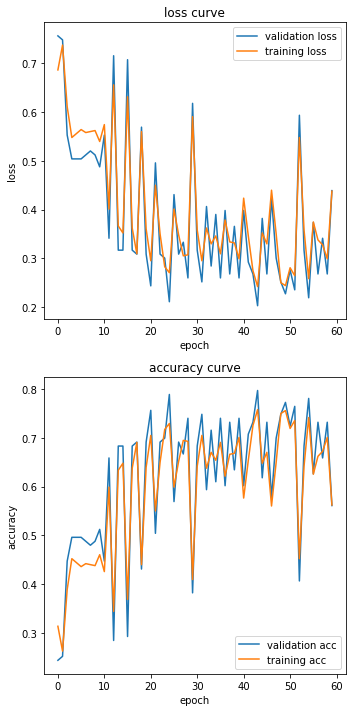

EPOCH 60 ITERATION 1 LR0.0001
weight  [0.53009585 0.71763258 0.60526174 0.52674177 0.39801556 0.64255492
 0.4165159  0.871243  ]
train acc: 0.34420 val acc: 0.29268 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.65580 val loss: 0.70732
----
EPOCH 60 ITERATION 2 LR0.0001
weight  [0.51136644 0.71997329 0.60769125 0.50868318 0.37249546 0.63918264
 0.39554084 0.850723  ]
train acc: 0.34623 val acc: 0.29268 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.65377 val loss: 0.70732
----
EPOCH 60 ITERATION 3 LR0.0001
weight  [0.49264291 0.72221901 0.61008961 0.4907246  0.34707537 0.63583257
 0.37462538 0.83014966]
train acc: 0.34420 val acc: 0.29268 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843 

EPOCH 60 ITERATION 27 LR0.0001
weight  [ 0.09677814  0.68465973  0.6061978   0.15112155 -0.12369461  0.54065837
 -0.01230869  0.38816297]
train acc: 0.28921 val acc: 0.34146 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.71079 val loss: 0.65854
----
EPOCH 60 ITERATION 28 LR0.0001
weight  [ 0.08572519  0.67866224  0.60286665  0.14369428 -0.13378231  0.53642841
 -0.02050809  0.37477964]
train acc: 0.28921 val acc: 0.34959 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.71079 val loss: 0.65041
----
EPOCH 60 ITERATION 29 LR0.0001
weight  [ 0.07520166  0.67244365  0.59924698  0.13696599 -0.14303267  0.53231381
 -0.02800911  0.36199297]
train acc: 0.29532 val acc: 0.38211 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-

EPOCH 60 ITERATION 54 LR0.0001
weight  [-0.03368657  0.48549945  0.46945843  0.09711037 -0.1869698   0.43813542
 -0.05205498  0.21603295]
train acc: 0.43788 val acc: 0.49593 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.56212 val loss: 0.50407
----
EPOCH 60 ITERATION 55 LR0.0001
weight  [-0.03558069  0.47778488  0.46390269  0.09731643 -0.18584426  0.43450442
 -0.05060144  0.21292295]
train acc: 0.43585 val acc: 0.49593 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.56415 val loss: 0.50407
----
EPOCH 60 ITERATION 56 LR0.0001
weight  [-0.0372454   0.47008086  0.4583781   0.09765077 -0.18448256  0.43081724
 -0.04902535  0.21004962]
train acc: 0.43585 val acc: 0.49593 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-

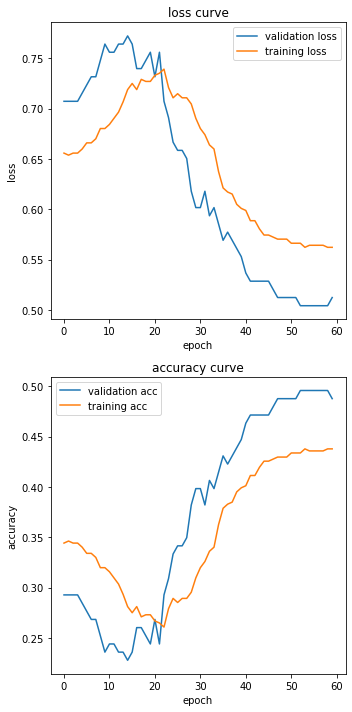

EPOCH 60 ITERATION 1 LR1e-05
weight  [0.54694174 0.71543369 0.60301321 0.54306904 0.42109088 0.64556019
 0.43548008 0.88972   ]
train acc: 0.34827 val acc: 0.29268 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.65173 val loss: 0.70732
----
EPOCH 60 ITERATION 2 LR1e-05
weight  [0.54506997 0.71567801 0.60326305 0.5412549  0.41852695 0.64522627
 0.43337295 0.887667  ]
train acc: 0.34827 val acc: 0.29268 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.65173 val loss: 0.70732
----
EPOCH 60 ITERATION 3 LR1e-05
weight  [0.54319821 0.71592233 0.60351288 0.53944076 0.41596303 0.64489235
 0.43126582 0.885614  ]
train acc: 0.34827 val acc: 0.29268 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   5

EPOCH 60 ITERATION 28 LR1e-05
weight  [0.49640526 0.72160303 0.60950469 0.4944751  0.35235896 0.63649397
 0.3789256  0.83423366]
train acc: 0.34623 val acc: 0.29268 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.65377 val loss: 0.70732
----
EPOCH 60 ITERATION 29 LR1e-05
weight  [0.49453644 0.72181354 0.60972157 0.49269662 0.34984901 0.63615494
 0.3768606  0.83216966]
train acc: 0.34623 val acc: 0.29268 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.65377 val loss: 0.70732
----
EPOCH 60 ITERATION 30 LR1e-05
weight  [0.49266761 0.72202404 0.60993846 0.49091813 0.34733906 0.6358159
 0.37479561 0.83010566]
train acc: 0.34420 val acc: 0.29268 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843  

EPOCH 60 ITERATION 54 LR1e-05
weight  [0.44778996 0.72657439 0.61475912 0.44866137 0.28781539 0.62754762
 0.32540198 0.78079433]
train acc: 0.33809 val acc: 0.28455 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.66191 val loss: 0.71545
----
EPOCH 60 ITERATION 55 LR1e-05
weight  [0.4459176  0.7267461  0.61495174 0.44690874 0.28535234 0.6272065
 0.3233592  0.77874333]
train acc: 0.33809 val acc: 0.28455 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.66191 val loss: 0.71545
----
EPOCH 60 ITERATION 56 LR1e-05
weight  [0.44404525 0.72691781 0.61514436 0.44515611 0.28288929 0.62686539
 0.32131643 0.77669233]
train acc: 0.33605 val acc: 0.28455 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843  

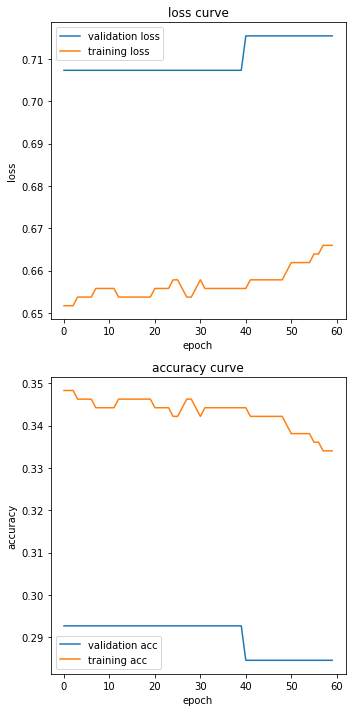

EPOCH 70 ITERATION 1 LR1
weight  [-186.62769      25.1473487    25.58637488 -180.86925492 -255.9687788
  -32.74604786 -210.27547989 -204.4082377 ]
train acc: 0.63340 val acc: 0.67480 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.36660 val loss: 0.32520
----
EPOCH 70 ITERATION 2 LR1
weight  [-111.333555    -48.83254082   -5.52838732  -81.37432152 -119.1342705
  -40.46885595 -101.01501953 -122.2082364 ]
train acc: 0.63544 val acc: 0.67480 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.36456 val loss: 0.32520
----
EPOCH 70 ITERATION 3 LR1
weight  [ -35.627655   -122.40539534  -36.29888752   17.98929888   17.4685598
  -48.02325904    7.62972783  -39.7749021 ]
train acc: 0.70061 val acc: 0.63415 best acc: 0.82114 best epoch:

EPOCH 70 ITERATION 27 LR1
weight  [ -64.2158635  -249.56116807   28.53720068    0.63570158   49.2037299
 -165.26027716  -64.40530333  -15.3416091 ]
train acc: 0.74949 val acc: 0.72358 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.25051 val loss: 0.27642
----
EPOCH 70 ITERATION 28 LR1
weight  [ -73.686454   -218.8626793    37.14376338  -18.24308232   27.4495916
 -159.91750559  -84.15082273  -23.0082777 ]
train acc: 0.76375 val acc: 0.80488 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.23625 val loss: 0.19512
----
EPOCH 70 ITERATION 29 LR1
weight  [ -41.921739   -212.03855882   33.27491268   13.33267308   72.6410796
 -154.99053594  -49.09788163   11.3917224 ]
train acc: 0.56823 val acc: 0.58537 best acc: 0.82114 best epo

EPOCH 70 ITERATION 54 LR1
weight  [ -60.1570005  -222.85264276   37.79954608   13.67607218   58.5346376
 -182.89519781  -70.15856147   -7.9416603 ]
train acc: 0.73116 val acc: 0.70732 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.26884 val loss: 0.29268
----
EPOCH 70 ITERATION 55 LR1
weight  [ -84.1570065  -189.50591426   49.37332238  -20.28351772   13.9790813
 -175.45257346 -106.77513187  -32.5083272 ]
train acc: 0.73727 val acc: 0.78049 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.26273 val loss: 0.21951
----
EPOCH 70 ITERATION 56 LR1
weight  [ -25.509933   -216.69686438   35.57004208   46.39324568  101.3313233
 -172.13365154  -29.43013177   23.7583385 ]
train acc: 0.38086 val acc: 0.34146 best acc: 0.82114 best epo

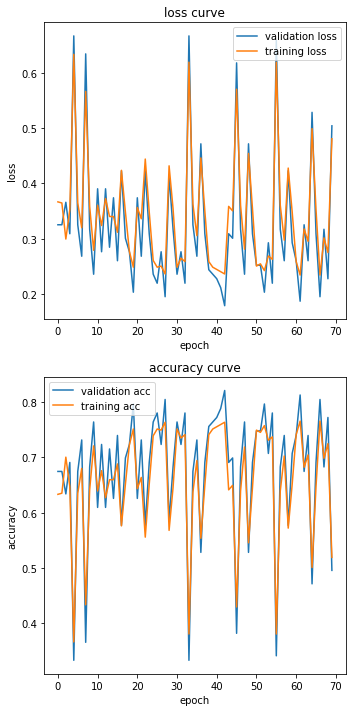

EPOCH 70 ITERATION 1 LR0.1
weight  [-18.16883685   3.1584053    3.10112453 -17.59653063 -25.21558856
  -2.69330008 -20.6337195  -19.63822807]
train acc: 0.63340 val acc: 0.67480 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.36660 val loss: 0.32520
----
EPOCH 70 ITERATION 2 LR0.1
weight  [-1.06394233e+01 -4.23958365e+00 -1.03516939e-02 -7.64703729e+00
 -1.15321377e+01 -3.46558089e+00 -9.70767346e+00 -1.14182279e+01]
train acc: 0.63340 val acc: 0.67480 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.36660 val loss: 0.32520
----
EPOCH 70 ITERATION 3 LR0.1
weight  [ -3.11000985 -11.6375726   -3.12182791   2.30245605   2.1513131
  -4.2378617    1.21837257  -3.19822781]
train acc: 0.61100 val acc: 0.56911 best acc: 0.82114 bes

EPOCH 70 ITERATION 28 LR0.1
weight  [ -4.3688306  -28.01646551   2.9781743    3.61154033   8.63452192
 -16.89897061  -3.01758269  -0.38823169]
train acc: 0.51324 val acc: 0.48780 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.48676 val loss: 0.51220
----
EPOCH 70 ITERATION 29 LR0.1
weight  [-17.5747153  -23.14963196   5.75194554 -10.20967099 -10.52268846
 -18.0213247  -19.09034066 -14.72489885]
train acc: 0.64766 val acc: 0.69106 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.35234 val loss: 0.30894
----
EPOCH 70 ITERATION 30 LR0.1
weight  [-10.0982429  -29.94108841   2.96342022  -0.43492505   2.77589255
 -18.55053551  -8.2393587   -6.70156545]
train acc: 0.75560 val acc: 0.80488 best acc: 0.82114 best epoch:50 best lr:1

EPOCH 70 ITERATION 56 LR0.1
weight  [-19.6100055  -22.00189298   7.55031086 -11.77331176 -11.24562644
 -20.84547379 -22.40161834 -16.62490296]
train acc: 0.64562 val acc: 0.68293 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.35438 val loss: 0.31707
----
EPOCH 70 ITERATION 57 LR0.1
weight  [-12.13941545 -28.86520873   4.68145764  -1.94705062   2.09621697
 -21.410005   -11.50554668  -8.61156956]
train acc: 0.74745 val acc: 0.77236 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.25255 val loss: 0.22764
----
EPOCH 70 ITERATION 58 LR0.1
weight  [ -6.89235555 -29.90842444   4.10604779   2.79234281   8.77541287
 -21.28988633  -5.94397564  -2.95823622]
train acc: 0.67006 val acc: 0.66667 best acc: 0.82114 best epoch:50 best lr:1

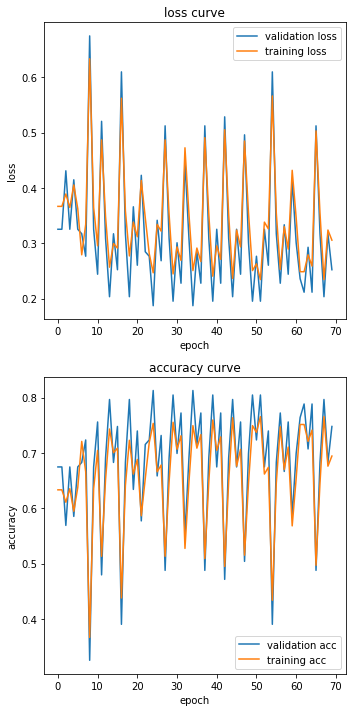

EPOCH 70 ITERATION 1 LR0.001
weight  [0.361637   0.73962153 0.62774699 0.36346904 0.16726237 0.61250217
 0.22687414 0.68647299]
train acc: 0.31365 val acc: 0.24390 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.68635 val loss: 0.75610
----
EPOCH 70 ITERATION 2 LR0.001
weight  [ 0.17734285  0.74279238  0.63815683  0.20143874 -0.0595887   0.57659011
  0.03978277  0.48387298]
train acc: 0.26273 val acc: 0.25203 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.73727 val loss: 0.74797
----
EPOCH 70 ITERATION 3 LR0.001
weight  [ 0.03934283  0.69673209  0.61743551  0.09200438 -0.20590548  0.53098058
 -0.07919075  0.32523964]
train acc: 0.38900 val acc: 0.44715 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -

EPOCH 70 ITERATION 29 LR0.001
weight  [-0.1185983  -0.21932306  0.01782883 -0.02412731 -0.0839032  -0.0690746
 -0.08393889 -0.03346044]
train acc: 0.69246 val acc: 0.73984 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.30754 val loss: 0.26016
----
EPOCH 70 ITERATION 30 LR0.001
weight  [-0.05277476 -0.26222256 -0.00202363  0.05840803  0.03393131 -0.07131455
  0.00870757  0.03583956]
train acc: 0.40937 val acc: 0.38211 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.59063 val loss: 0.61789
----
EPOCH 70 ITERATION 31 LR0.001
weight  [-0.2240689  -0.21720749  0.03097638 -0.11310711 -0.20376845 -0.09530858
 -0.19064769 -0.15069379]
train acc: 0.64155 val acc: 0.68293 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.

EPOCH 70 ITERATION 54 LR0.001
weight  [-0.19759829 -0.20582056  0.06343542 -0.12021827 -0.1267685  -0.17050388
 -0.21687317 -0.14669382]
train acc: 0.64155 val acc: 0.68293 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.35845 val loss: 0.31707
----
EPOCH 70 ITERATION 55 LR0.001
weight  [-0.12289239 -0.27585071  0.03435345 -0.02130919  0.00751991 -0.17669465
 -0.10729589 -0.06619382]
train acc: 0.74134 val acc: 0.78049 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.25866 val loss: 0.21951
----
EPOCH 70 ITERATION 56 LR0.001
weight  [-0.06836297 -0.2885693   0.02861574  0.03092313  0.08093834 -0.17542938
 -0.04804568 -0.01009382]
train acc: 0.62525 val acc: 0.62602 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170

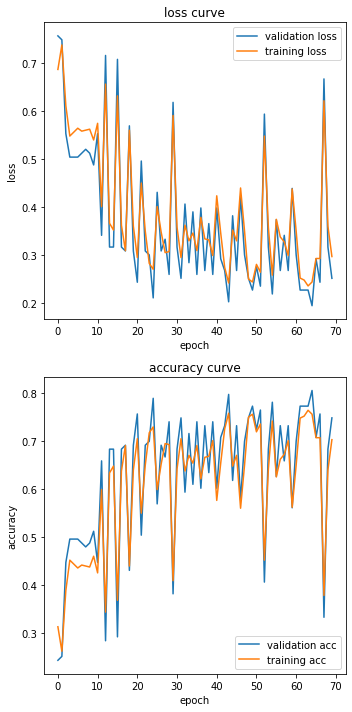

EPOCH 70 ITERATION 1 LR0.0001
weight  [0.53009585 0.71763258 0.60526174 0.52674177 0.39801556 0.64255492
 0.4165159  0.871243  ]
train acc: 0.34420 val acc: 0.29268 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.65580 val loss: 0.70732
----
EPOCH 70 ITERATION 2 LR0.0001
weight  [0.51136644 0.71997329 0.60769125 0.50868318 0.37249546 0.63918264
 0.39554084 0.850723  ]
train acc: 0.34623 val acc: 0.29268 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.65377 val loss: 0.70732
----
EPOCH 70 ITERATION 3 LR0.0001
weight  [0.49264291 0.72221901 0.61008961 0.4907246  0.34707537 0.63583257
 0.37462538 0.83014966]
train acc: 0.34420 val acc: 0.29268 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843 

EPOCH 70 ITERATION 29 LR0.0001
weight  [ 0.07520166  0.67244365  0.59924698  0.13696599 -0.14303267  0.53231381
 -0.02800911  0.36199297]
train acc: 0.29532 val acc: 0.38211 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.70468 val loss: 0.61789
----
EPOCH 70 ITERATION 30 LR0.0001
weight  [ 0.06546049  0.66600043  0.59536829  0.13109932 -0.15133716  0.52830904
 -0.03479963  0.3497863 ]
train acc: 0.30957 val acc: 0.39837 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.69043 val loss: 0.60163
----
EPOCH 70 ITERATION 31 LR0.0001
weight  [ 0.05667813  0.65929742  0.59111583  0.1259367  -0.15846198  0.52435062
 -0.04052764  0.33875297]
train acc: 0.31976 val acc: 0.39837 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-

EPOCH 70 ITERATION 56 LR0.0001
weight  [-0.0372454   0.47008086  0.4583781   0.09765077 -0.18448256  0.43081724
 -0.04902535  0.21004962]
train acc: 0.43585 val acc: 0.49593 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.56415 val loss: 0.50407
----
EPOCH 70 ITERATION 57 LR0.0001
weight  [-0.0389101   0.46237684  0.45285351  0.09798511 -0.18312086  0.42713006
 -0.04744926  0.20717629]
train acc: 0.43585 val acc: 0.49593 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.56415 val loss: 0.50407
----
EPOCH 70 ITERATION 58 LR0.0001
weight  [-0.04051599  0.45472508  0.44732892  0.09825885 -0.18175916  0.42338386
 -0.0459438   0.20432962]
train acc: 0.43585 val acc: 0.49593 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-

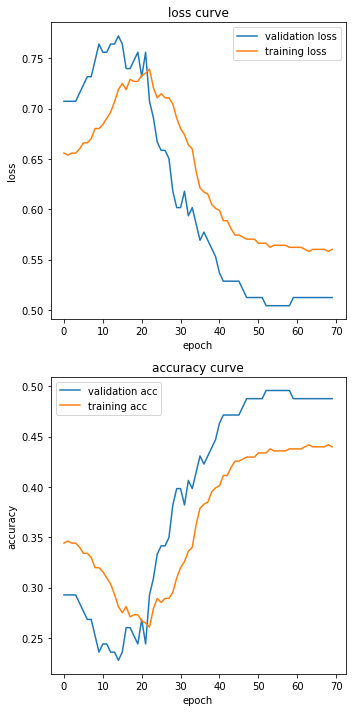

EPOCH 70 ITERATION 1 LR1e-05
weight  [0.54694174 0.71543369 0.60301321 0.54306904 0.42109088 0.64556019
 0.43548008 0.88972   ]
train acc: 0.34827 val acc: 0.29268 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.65173 val loss: 0.70732
----
EPOCH 70 ITERATION 2 LR1e-05
weight  [0.54506997 0.71567801 0.60326305 0.5412549  0.41852695 0.64522627
 0.43337295 0.887667  ]
train acc: 0.34827 val acc: 0.29268 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.65173 val loss: 0.70732
----
EPOCH 70 ITERATION 3 LR1e-05
weight  [0.54319821 0.71592233 0.60351288 0.53944076 0.41596303 0.64489235
 0.43126582 0.885614  ]
train acc: 0.34827 val acc: 0.29268 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   5

EPOCH 70 ITERATION 28 LR1e-05
weight  [0.49640526 0.72160303 0.60950469 0.4944751  0.35235896 0.63649397
 0.3789256  0.83423366]
train acc: 0.34623 val acc: 0.29268 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.65377 val loss: 0.70732
----
EPOCH 70 ITERATION 29 LR1e-05
weight  [0.49453644 0.72181354 0.60972157 0.49269662 0.34984901 0.63615494
 0.3768606  0.83216966]
train acc: 0.34623 val acc: 0.29268 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.65377 val loss: 0.70732
----
EPOCH 70 ITERATION 30 LR1e-05
weight  [0.49266761 0.72202404 0.60993846 0.49091813 0.34733906 0.6358159
 0.37479561 0.83010566]
train acc: 0.34420 val acc: 0.29268 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843  

EPOCH 70 ITERATION 55 LR1e-05
weight  [0.4459176  0.7267461  0.61495174 0.44690874 0.28535234 0.6272065
 0.3233592  0.77874333]
train acc: 0.33809 val acc: 0.28455 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.66191 val loss: 0.71545
----
EPOCH 70 ITERATION 56 LR1e-05
weight  [0.44404525 0.72691781 0.61514436 0.44515611 0.28288929 0.62686539
 0.32131643 0.77669233]
train acc: 0.33605 val acc: 0.28455 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.66395 val loss: 0.71545
----
EPOCH 70 ITERATION 57 LR1e-05
weight  [0.44217466 0.72708072 0.61533584 0.44340561 0.28042906 0.62652303
 0.31928215 0.77464466]
train acc: 0.33605 val acc: 0.28455 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843  

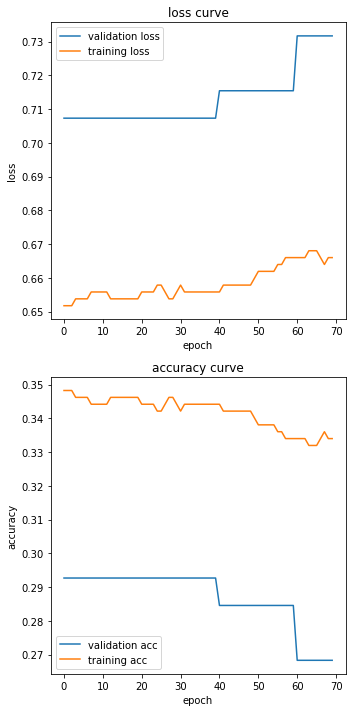

EPOCH 80 ITERATION 1 LR1
weight  [-186.62769      25.1473487    25.58637488 -180.86925492 -255.9687788
  -32.74604786 -210.27547989 -204.4082377 ]
train acc: 0.63340 val acc: 0.67480 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.36660 val loss: 0.32520
----
EPOCH 80 ITERATION 2 LR1
weight  [-111.333555    -48.83254082   -5.52838732  -81.37432152 -119.1342705
  -40.46885595 -101.01501953 -122.2082364 ]
train acc: 0.63544 val acc: 0.67480 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.36456 val loss: 0.32520
----
EPOCH 80 ITERATION 3 LR1
weight  [ -35.627655   -122.40539534  -36.29888752   17.98929888   17.4685598
  -48.02325904    7.62972783  -39.7749021 ]
train acc: 0.70061 val acc: 0.63415 best acc: 0.82114 best epoch:

EPOCH 80 ITERATION 29 LR1
weight  [ -41.921739   -212.03855882   33.27491268   13.33267308   72.6410796
 -154.99053594  -49.09788163   11.3917224 ]
train acc: 0.56823 val acc: 0.58537 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.43177 val loss: 0.41463
----
EPOCH 80 ITERATION 30 LR1
weight  [-148.627643   -165.75715733   57.42246138  -97.51580202  -86.0657757
 -157.72674676 -180.39677033 -107.9749502 ]
train acc: 0.64562 val acc: 0.68293 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.35438 val loss: 0.31707
----
EPOCH 80 ITERATION 31 LR1
weight  [ -73.9217425  -234.39031485   28.73392918    0.74680938   47.3526584
 -163.37205885  -71.43605377  -27.8416162 ]
train acc: 0.75153 val acc: 0.76423 best acc: 0.82114 best epo

EPOCH 80 ITERATION 55 LR1
weight  [ -84.1570065  -189.50591426   49.37332238  -20.28351772   13.9790813
 -175.45257346 -106.77513187  -32.5083272 ]
train acc: 0.73727 val acc: 0.78049 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.26273 val loss: 0.21951
----
EPOCH 80 ITERATION 56 LR1
weight  [ -25.509933   -216.69686438   35.57004208   46.39324568  101.3313233
 -172.13365154  -29.43013177   23.7583385 ]
train acc: 0.38086 val acc: 0.34146 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.61914 val loss: 0.65854
----
EPOCH 80 ITERATION 57 LR1
weight  [-207.3923175  -175.48078925   68.91431288 -130.85927252 -149.0445595
 -195.87134821 -237.53004607 -174.1083381 ]
train acc: 0.63951 val acc: 0.68293 best acc: 0.82114 best epo

EPOCH 80 ITERATION 80 LR1
weight  [ -37.0393065  -254.66670661   45.63565028   40.55482558  103.5605832
 -200.49734007  -45.53607337    3.3916372 ]
train acc: 0.47047 val acc: 0.43089 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.52953 val loss: 0.56911
----
sample= 768 and feature = 8
EPOCH 80 ITERATION 80 LR1


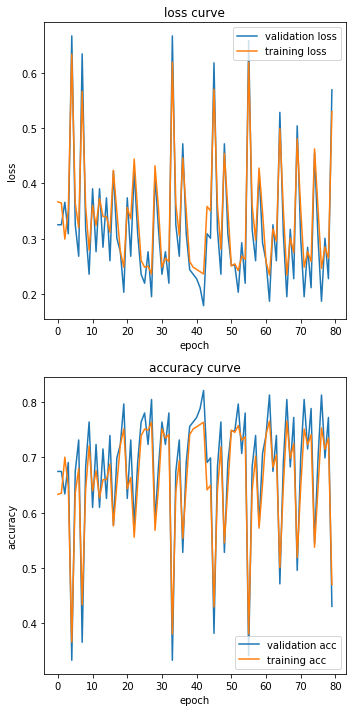

EPOCH 80 ITERATION 1 LR0.1
weight  [-18.16883685   3.1584053    3.10112453 -17.59653063 -25.21558856
  -2.69330008 -20.6337195  -19.63822807]
train acc: 0.63340 val acc: 0.67480 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.36660 val loss: 0.32520
----
EPOCH 80 ITERATION 2 LR0.1
weight  [-1.06394233e+01 -4.23958365e+00 -1.03516939e-02 -7.64703729e+00
 -1.15321377e+01 -3.46558089e+00 -9.70767346e+00 -1.14182279e+01]
train acc: 0.63340 val acc: 0.67480 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.36660 val loss: 0.32520
----
EPOCH 80 ITERATION 3 LR0.1
weight  [ -3.11000985 -11.6375726   -3.12182791   2.30245605   2.1513131
  -4.2378617    1.21837257  -3.19822781]
train acc: 0.61100 val acc: 0.56911 best acc: 0.82114 bes

EPOCH 80 ITERATION 27 LR0.1
weight  [-11.28647935 -22.81546096   5.31260114  -5.1076503   -3.49810168
 -16.61551228 -13.0431161   -7.96156489]
train acc: 0.67821 val acc: 0.73171 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.32179 val loss: 0.26829
----
EPOCH 80 ITERATION 28 LR0.1
weight  [ -4.3688306  -28.01646551   2.9781743    3.61154033   8.63452192
 -16.89897061  -3.01758269  -0.38823169]
train acc: 0.51324 val acc: 0.48780 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.48676 val loss: 0.51220
----
EPOCH 80 ITERATION 29 LR0.1
weight  [-17.5747153  -23.14963196   5.75194554 -10.20967099 -10.52268846
 -18.0213247  -19.09034066 -14.72489885]
train acc: 0.64766 val acc: 0.69106 best acc: 0.82114 best epoch:50 best lr:1

EPOCH 80 ITERATION 53 LR0.1
weight  [ -5.4100031  -25.05515886   5.11096553   1.77416252   8.29314472
 -19.52565257  -6.72450458  -1.25490194]
train acc: 0.66191 val acc: 0.67480 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.33809 val loss: 0.32520
----
EPOCH 80 ITERATION 54 LR0.1
weight  [-10.92765145 -20.99787294   6.87654002  -4.63189718  -0.75744641
 -18.99241852 -14.14414592  -7.0382353 ]
train acc: 0.67413 val acc: 0.73984 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.32587 val loss: 0.26016
----
EPOCH 80 ITERATION 55 LR0.1
weight  [ -3.81000265 -26.43505829   4.50276892   4.13173796  11.22765949
 -19.25173374  -3.94132821   0.5450979 ]
train acc: 0.43381 val acc: 0.39024 best acc: 0.82114 best epoch:50 best lr:1

EPOCH 80 ITERATION 79 LR0.1
weight  [ -6.8805876  -28.10239425   5.02736302   1.71557276   7.59621144
 -21.64130654  -7.57122149  -3.21490573]
train acc: 0.72709 val acc: 0.72358 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.27291 val loss: 0.27642
----
EPOCH 80 ITERATION 80 LR0.1
weight  [ -8.8923529  -24.79485697   6.15195378  -1.56725503   3.39361081
 -21.03296072 -11.07532083  -4.87490572]
train acc: 0.76171 val acc: 0.80488 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.23829 val loss: 0.19512
----
sample= 768 and feature = 8
EPOCH 80 ITERATION 80 LR0.1


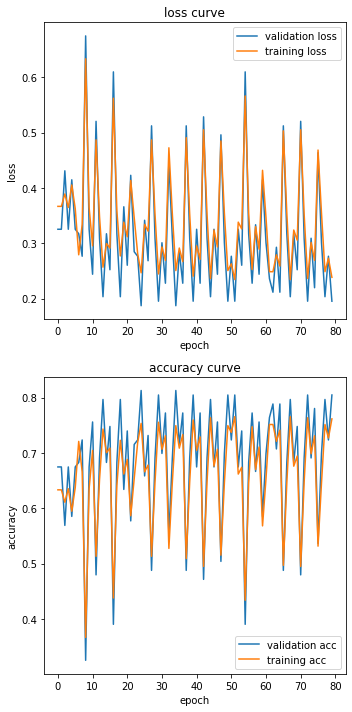

EPOCH 80 ITERATION 1 LR0.001
weight  [0.361637   0.73962153 0.62774699 0.36346904 0.16726237 0.61250217
 0.22687414 0.68647299]
train acc: 0.31365 val acc: 0.24390 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.68635 val loss: 0.75610
----
EPOCH 80 ITERATION 2 LR0.001
weight  [ 0.17734285  0.74279238  0.63815683  0.20143874 -0.0595887   0.57659011
  0.03978277  0.48387298]
train acc: 0.26273 val acc: 0.25203 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.73727 val loss: 0.74797
----
EPOCH 80 ITERATION 3 LR0.001
weight  [ 0.03934283  0.69673209  0.61743551  0.09200438 -0.20590548  0.53098058
 -0.07919075  0.32523964]
train acc: 0.38900 val acc: 0.44715 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -

EPOCH 80 ITERATION 27 LR0.001
weight  [-0.15665713 -0.19669493  0.02592719 -0.05177376 -0.14367388 -0.05414315
 -0.12110968 -0.06872711]
train acc: 0.65173 val acc: 0.69106 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.34827 val loss: 0.30894
----
EPOCH 80 ITERATION 28 LR0.001
weight  [-0.08201005 -0.2628708  -0.00195806  0.04451915 -0.00908523 -0.06029368
 -0.01535562  0.01230623]
train acc: 0.69450 val acc: 0.66667 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.30550 val loss: 0.33333
----
EPOCH 80 ITERATION 29 LR0.001
weight  [-0.1185983  -0.21932306  0.01782883 -0.02412731 -0.0839032  -0.0690746
 -0.08393889 -0.03346044]
train acc: 0.69246 val acc: 0.73984 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.

EPOCH 80 ITERATION 54 LR0.001
weight  [-0.19759829 -0.20582056  0.06343542 -0.12021827 -0.1267685  -0.17050388
 -0.21687317 -0.14669382]
train acc: 0.64155 val acc: 0.68293 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.35845 val loss: 0.31707
----
EPOCH 80 ITERATION 55 LR0.001
weight  [-0.12289239 -0.27585071  0.03435345 -0.02130919  0.00751991 -0.17669465
 -0.10729589 -0.06619382]
train acc: 0.74134 val acc: 0.78049 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.25866 val loss: 0.21951
----
EPOCH 80 ITERATION 56 LR0.001
weight  [-0.06836297 -0.2885693   0.02861574  0.03092313  0.08093834 -0.17542938
 -0.04804568 -0.01009382]
train acc: 0.62525 val acc: 0.62602 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170

EPOCH 80 ITERATION 79 LR0.001
weight  [-0.10712765 -0.29274518  0.04340266 -0.00825872  0.03487682 -0.20616117
 -0.1001277  -0.07422719]
train acc: 0.76578 val acc: 0.79675 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.23422 val loss: 0.20325
----
EPOCH 80 ITERATION 80 LR0.001
weight  [-0.06836293 -0.28886076  0.04323873  0.02520592  0.08445129 -0.20267831
 -0.06189201 -0.03216052]
train acc: 0.68432 val acc: 0.66667 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.31568 val loss: 0.33333
----
sample= 768 and feature = 8
EPOCH 80 ITERATION 80 LR0.001


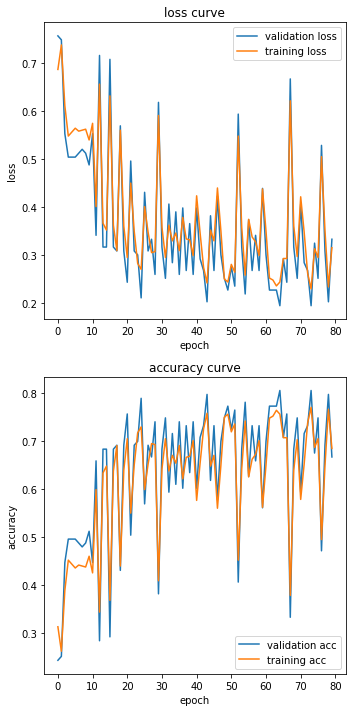

EPOCH 80 ITERATION 1 LR0.0001
weight  [0.53009585 0.71763258 0.60526174 0.52674177 0.39801556 0.64255492
 0.4165159  0.871243  ]
train acc: 0.34420 val acc: 0.29268 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.65580 val loss: 0.70732
----
EPOCH 80 ITERATION 2 LR0.0001
weight  [0.51136644 0.71997329 0.60769125 0.50868318 0.37249546 0.63918264
 0.39554084 0.850723  ]
train acc: 0.34623 val acc: 0.29268 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.65377 val loss: 0.70732
----
EPOCH 80 ITERATION 3 LR0.0001
weight  [0.49264291 0.72221901 0.61008961 0.4907246  0.34707537 0.63583257
 0.37462538 0.83014966]
train acc: 0.34420 val acc: 0.29268 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843 

EPOCH 80 ITERATION 28 LR0.0001
weight  [ 0.08572519  0.67866224  0.60286665  0.14369428 -0.13378231  0.53642841
 -0.02050809  0.37477964]
train acc: 0.28921 val acc: 0.34959 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.71079 val loss: 0.65041
----
EPOCH 80 ITERATION 29 LR0.0001
weight  [ 0.07520166  0.67244365  0.59924698  0.13696599 -0.14303267  0.53231381
 -0.02800911  0.36199297]
train acc: 0.29532 val acc: 0.38211 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.70468 val loss: 0.61789
----
EPOCH 80 ITERATION 30 LR0.0001
weight  [ 0.06546049  0.66600043  0.59536829  0.13109932 -0.15133716  0.52830904
 -0.03479963  0.3497863 ]
train acc: 0.30957 val acc: 0.39837 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-

EPOCH 80 ITERATION 54 LR0.0001
weight  [-0.03368657  0.48549945  0.46945843  0.09711037 -0.1869698   0.43813542
 -0.05205498  0.21603295]
train acc: 0.43788 val acc: 0.49593 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.56212 val loss: 0.50407
----
EPOCH 80 ITERATION 55 LR0.0001
weight  [-0.03558069  0.47778488  0.46390269  0.09731643 -0.18584426  0.43450442
 -0.05060144  0.21292295]
train acc: 0.43585 val acc: 0.49593 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.56415 val loss: 0.50407
----
EPOCH 80 ITERATION 56 LR0.0001
weight  [-0.0372454   0.47008086  0.4583781   0.09765077 -0.18448256  0.43081724
 -0.04902535  0.21004962]
train acc: 0.43585 val acc: 0.49593 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-

EPOCH 80 ITERATION 80 LR0.0001
weight  [-0.07041598  0.28715275  0.32576988  0.10559111 -0.14829912  0.34026121
 -0.0093661   0.14632627]
train acc: 0.43992 val acc: 0.48780 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.56008 val loss: 0.51220
----
sample= 768 and feature = 8
EPOCH 80 ITERATION 80 LR0.0001


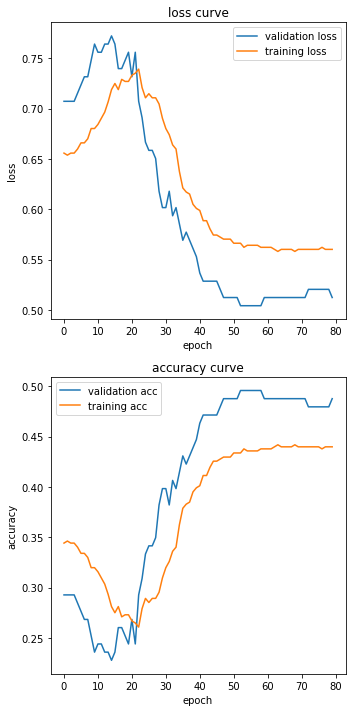

EPOCH 80 ITERATION 1 LR1e-05
weight  [0.54694174 0.71543369 0.60301321 0.54306904 0.42109088 0.64556019
 0.43548008 0.88972   ]
train acc: 0.34827 val acc: 0.29268 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.65173 val loss: 0.70732
----
EPOCH 80 ITERATION 2 LR1e-05
weight  [0.54506997 0.71567801 0.60326305 0.5412549  0.41852695 0.64522627
 0.43337295 0.887667  ]
train acc: 0.34827 val acc: 0.29268 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.65173 val loss: 0.70732
----
EPOCH 80 ITERATION 3 LR1e-05
weight  [0.54319821 0.71592233 0.60351288 0.53944076 0.41596303 0.64489235
 0.43126582 0.885614  ]
train acc: 0.34827 val acc: 0.29268 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   5

EPOCH 80 ITERATION 28 LR1e-05
weight  [0.49640526 0.72160303 0.60950469 0.4944751  0.35235896 0.63649397
 0.3789256  0.83423366]
train acc: 0.34623 val acc: 0.29268 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.65377 val loss: 0.70732
----
EPOCH 80 ITERATION 29 LR1e-05
weight  [0.49453644 0.72181354 0.60972157 0.49269662 0.34984901 0.63615494
 0.3768606  0.83216966]
train acc: 0.34623 val acc: 0.29268 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.65377 val loss: 0.70732
----
EPOCH 80 ITERATION 30 LR1e-05
weight  [0.49266761 0.72202404 0.60993846 0.49091813 0.34733906 0.6358159
 0.37479561 0.83010566]
train acc: 0.34420 val acc: 0.29268 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843  

EPOCH 80 ITERATION 54 LR1e-05
weight  [0.44778996 0.72657439 0.61475912 0.44866137 0.28781539 0.62754762
 0.32540198 0.78079433]
train acc: 0.33809 val acc: 0.28455 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.66191 val loss: 0.71545
----
EPOCH 80 ITERATION 55 LR1e-05
weight  [0.4459176  0.7267461  0.61495174 0.44690874 0.28535234 0.6272065
 0.3233592  0.77874333]
train acc: 0.33809 val acc: 0.28455 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.66191 val loss: 0.71545
----
EPOCH 80 ITERATION 56 LR1e-05
weight  [0.44404525 0.72691781 0.61514436 0.44515611 0.28288929 0.62686539
 0.32131643 0.77669233]
train acc: 0.33605 val acc: 0.28455 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843  

EPOCH 80 ITERATION 79 LR1e-05
weight  [0.40108642 0.73033509 0.61930272 0.40517632 0.22665617 0.61889317
 0.27510115 0.72964599]
train acc: 0.32994 val acc: 0.26016 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.67006 val loss: 0.73984
----
EPOCH 80 ITERATION 80 LR1e-05
weight  [0.39922348 0.73046218 0.6194701  0.40345116 0.2242383  0.61854296
 0.27311945 0.72760599]
train acc: 0.32994 val acc: 0.26829 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.67006 val loss: 0.73171
----
sample= 768 and feature = 8
EPOCH 80 ITERATION 80 LR1e-05


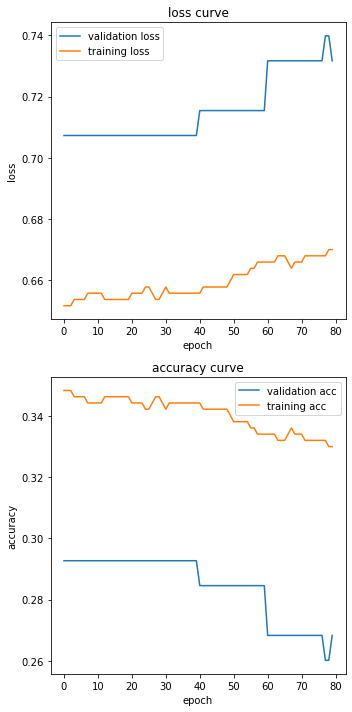

EPOCH 90 ITERATION 1 LR1
weight  [-186.62769      25.1473487    25.58637488 -180.86925492 -255.9687788
  -32.74604786 -210.27547989 -204.4082377 ]
train acc: 0.63340 val acc: 0.67480 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.36660 val loss: 0.32520
----
EPOCH 90 ITERATION 2 LR1
weight  [-111.333555    -48.83254082   -5.52838732  -81.37432152 -119.1342705
  -40.46885595 -101.01501953 -122.2082364 ]
train acc: 0.63544 val acc: 0.67480 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.36456 val loss: 0.32520
----
EPOCH 90 ITERATION 3 LR1
weight  [ -35.627655   -122.40539534  -36.29888752   17.98929888   17.4685598
  -48.02325904    7.62972783  -39.7749021 ]
train acc: 0.70061 val acc: 0.63415 best acc: 0.82114 best epoch:

EPOCH 90 ITERATION 27 LR1
weight  [ -64.2158635  -249.56116807   28.53720068    0.63570158   49.2037299
 -165.26027716  -64.40530333  -15.3416091 ]
train acc: 0.74949 val acc: 0.72358 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.25051 val loss: 0.27642
----
EPOCH 90 ITERATION 28 LR1
weight  [ -73.686454   -218.8626793    37.14376338  -18.24308232   27.4495916
 -159.91750559  -84.15082273  -23.0082777 ]
train acc: 0.76375 val acc: 0.80488 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.23625 val loss: 0.19512
----
EPOCH 90 ITERATION 29 LR1
weight  [ -41.921739   -212.03855882   33.27491268   13.33267308   72.6410796
 -154.99053594  -49.09788163   11.3917224 ]
train acc: 0.56823 val acc: 0.58537 best acc: 0.82114 best epo

EPOCH 90 ITERATION 53 LR1
weight  [ -76.686418   -240.58630817   36.06183778    3.50435378   42.3927955
 -188.547951    -83.20637907  -28.2416614 ]
train acc: 0.75764 val acc: 0.79675 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.24236 val loss: 0.20325
----
EPOCH 90 ITERATION 54 LR1
weight  [ -60.1570005  -222.85264276   37.79954608   13.67607218   58.5346376
 -182.89519781  -70.15856147   -7.9416603 ]
train acc: 0.73116 val acc: 0.70732 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.26884 val loss: 0.29268
----
EPOCH 90 ITERATION 55 LR1
weight  [ -84.1570065  -189.50591426   49.37332238  -20.28351772   13.9790813
 -175.45257346 -106.77513187  -32.5083272 ]
train acc: 0.73727 val acc: 0.78049 best acc: 0.82114 best epo

train acc: 0.73523 val acc: 0.77236 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.26477 val loss: 0.22764
----
EPOCH 90 ITERATION 80 LR1
weight  [ -37.0393065  -254.66670661   45.63565028   40.55482558  103.5605832
 -200.49734007  -45.53607337    3.3916372 ]
train acc: 0.47047 val acc: 0.43089 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.52953 val loss: 0.56911
----
EPOCH 90 ITERATION 81 LR1
weight  [-184.451097   -209.14912381   75.25860948 -106.69769262 -103.8862251
 -210.95038944 -216.13128767 -156.4083704 ]
train acc: 0.64562 val acc: 0.68293 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train 

EPOCH 90 ITERATION 1 LR0.1
weight  [-18.16883685   3.1584053    3.10112453 -17.59653063 -25.21558856
  -2.69330008 -20.6337195  -19.63822807]
train acc: 0.63340 val acc: 0.67480 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.36660 val loss: 0.32520
----
EPOCH 90 ITERATION 2 LR0.1
weight  [-1.06394233e+01 -4.23958365e+00 -1.03516939e-02 -7.64703729e+00
 -1.15321377e+01 -3.46558089e+00 -9.70767346e+00 -1.14182279e+01]
train acc: 0.63340 val acc: 0.67480 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.36660 val loss: 0.32520
----
EPOCH 90 ITERATION 3 LR0.1
weight  [ -3.11000985 -11.6375726   -3.12182791   2.30245605   2.1513131
  -4.2378617    1.21837257  -3.19822781]
train acc: 0.61100 val acc: 0.56911 best acc: 0.82114 bes

EPOCH 90 ITERATION 27 LR0.1
weight  [-11.28647935 -22.81546096   5.31260114  -5.1076503   -3.49810168
 -16.61551228 -13.0431161   -7.96156489]
train acc: 0.67821 val acc: 0.73171 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.32179 val loss: 0.26829
----
EPOCH 90 ITERATION 28 LR0.1
weight  [ -4.3688306  -28.01646551   2.9781743    3.61154033   8.63452192
 -16.89897061  -3.01758269  -0.38823169]
train acc: 0.51324 val acc: 0.48780 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.48676 val loss: 0.51220
----
EPOCH 90 ITERATION 29 LR0.1
weight  [-17.5747153  -23.14963196   5.75194554 -10.20967099 -10.52268846
 -18.0213247  -19.09034066 -14.72489885]
train acc: 0.64766 val acc: 0.69106 best acc: 0.82114 best epoch:50 best lr:1

EPOCH 90 ITERATION 54 LR0.1
weight  [-10.92765145 -20.99787294   6.87654002  -4.63189718  -0.75744641
 -18.99241852 -14.14414592  -7.0382353 ]
train acc: 0.67413 val acc: 0.73984 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.32587 val loss: 0.26016
----
EPOCH 90 ITERATION 55 LR0.1
weight  [ -3.81000265 -26.43505829   4.50276892   4.13173796  11.22765949
 -19.25173374  -3.94132821   0.5450979 ]
train acc: 0.43381 val acc: 0.39024 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.56619 val loss: 0.60976
----
EPOCH 90 ITERATION 56 LR0.1
weight  [-19.6100055  -22.00189298   7.55031086 -11.77331176 -11.24562644
 -20.84547379 -22.40161834 -16.62490296]
train acc: 0.64562 val acc: 0.68293 best acc: 0.82114 best epoch:50 best lr:1

EPOCH 90 ITERATION 80 LR0.1
weight  [ -8.8923529  -24.79485697   6.15195378  -1.56725503   3.39361081
 -21.03296072 -11.07532083  -4.87490572]
train acc: 0.76171 val acc: 0.80488 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.23829 val loss: 0.19512
----
EPOCH 90 ITERATION 81 LR0.1
weight  [ -5.20411665 -24.75214328   5.39457687   2.1529468    8.95507641
 -20.55024882  -6.62630332  -0.87157225]
train acc: 0.63747 val acc: 0.64228 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.36253 val loss: 0.35772
----
EPOCH 90 ITERATION 82 LR0.1
weight  [-12.42764765 -20.53907848   7.33720057  -5.6127086   -2.31064472
 -20.04711898 -15.96601276  -8.66823921]
train acc: 0.65988 val acc: 0.73171 best acc: 0.82114 best epoch:50 best lr:1

EPOCH 90 ITERATION 1 LR0.001
weight  [0.361637   0.73962153 0.62774699 0.36346904 0.16726237 0.61250217
 0.22687414 0.68647299]
train acc: 0.31365 val acc: 0.24390 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.68635 val loss: 0.75610
----
EPOCH 90 ITERATION 2 LR0.001
weight  [ 0.17734285  0.74279238  0.63815683  0.20143874 -0.0595887   0.57659011
  0.03978277  0.48387298]
train acc: 0.26273 val acc: 0.25203 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.73727 val loss: 0.74797
----
EPOCH 90 ITERATION 3 LR0.001
weight  [ 0.03934283  0.69673209  0.61743551  0.09200438 -0.20590548  0.53098058
 -0.07919075  0.32523964]
train acc: 0.38900 val acc: 0.44715 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -

EPOCH 90 ITERATION 28 LR0.001
weight  [-0.08201005 -0.2628708  -0.00195806  0.04451915 -0.00908523 -0.06029368
 -0.01535562  0.01230623]
train acc: 0.69450 val acc: 0.66667 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.30550 val loss: 0.33333
----
EPOCH 90 ITERATION 29 LR0.001
weight  [-0.1185983  -0.21932306  0.01782883 -0.02412731 -0.0839032  -0.0690746
 -0.08393889 -0.03346044]
train acc: 0.69246 val acc: 0.73984 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.30754 val loss: 0.26016
----
EPOCH 90 ITERATION 30 LR0.001
weight  [-0.05277476 -0.26222256 -0.00202363  0.05840803  0.03393131 -0.07131455
  0.00870757  0.03583956]
train acc: 0.40937 val acc: 0.38211 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.

EPOCH 90 ITERATION 54 LR0.001
weight  [-0.19759829 -0.20582056  0.06343542 -0.12021827 -0.1267685  -0.17050388
 -0.21687317 -0.14669382]
train acc: 0.64155 val acc: 0.68293 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.35845 val loss: 0.31707
----
EPOCH 90 ITERATION 55 LR0.001
weight  [-0.12289239 -0.27585071  0.03435345 -0.02130919  0.00751991 -0.17669465
 -0.10729589 -0.06619382]
train acc: 0.74134 val acc: 0.78049 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.25866 val loss: 0.21951
----
EPOCH 90 ITERATION 56 LR0.001
weight  [-0.06836297 -0.2885693   0.02861574  0.03092313  0.08093834 -0.17542938
 -0.04804568 -0.01009382]
train acc: 0.62525 val acc: 0.62602 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170

EPOCH 90 ITERATION 80 LR0.001
weight  [-0.06836293 -0.28886076  0.04323873  0.02520592  0.08445129 -0.20267831
 -0.06189201 -0.03216052]
train acc: 0.68432 val acc: 0.66667 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.31568 val loss: 0.33333
----
EPOCH 90 ITERATION 81 LR0.001
weight  [-0.11159824 -0.24925775  0.06155021 -0.03440013  0.00466405 -0.19833107
 -0.12923702 -0.07602719]
train acc: 0.71487 val acc: 0.76423 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.28513 val loss: 0.23577
----
EPOCH 90 ITERATION 82 LR0.001
weight  [-0.04606881 -0.28254418  0.04755021  0.03917562  0.10194301 -0.19759486
 -0.04729339 -0.01062719]
train acc: 0.52342 val acc: 0.51220 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170

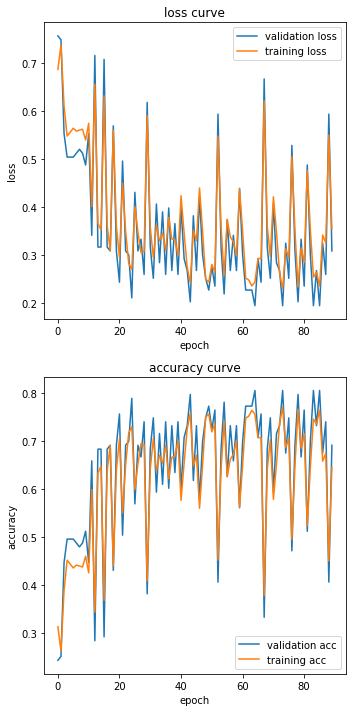

EPOCH 90 ITERATION 1 LR0.0001
weight  [0.53009585 0.71763258 0.60526174 0.52674177 0.39801556 0.64255492
 0.4165159  0.871243  ]
train acc: 0.34420 val acc: 0.29268 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.65580 val loss: 0.70732
----
EPOCH 90 ITERATION 2 LR0.0001
weight  [0.51136644 0.71997329 0.60769125 0.50868318 0.37249546 0.63918264
 0.39554084 0.850723  ]
train acc: 0.34623 val acc: 0.29268 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.65377 val loss: 0.70732
----
EPOCH 90 ITERATION 3 LR0.0001
weight  [0.49264291 0.72221901 0.61008961 0.4907246  0.34707537 0.63583257
 0.37462538 0.83014966]
train acc: 0.34420 val acc: 0.29268 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843 

EPOCH 90 ITERATION 28 LR0.0001
weight  [ 0.08572519  0.67866224  0.60286665  0.14369428 -0.13378231  0.53642841
 -0.02050809  0.37477964]
train acc: 0.28921 val acc: 0.34959 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.71079 val loss: 0.65041
----
EPOCH 90 ITERATION 29 LR0.0001
weight  [ 0.07520166  0.67244365  0.59924698  0.13696599 -0.14303267  0.53231381
 -0.02800911  0.36199297]
train acc: 0.29532 val acc: 0.38211 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.70468 val loss: 0.61789
----
EPOCH 90 ITERATION 30 LR0.0001
weight  [ 0.06546049  0.66600043  0.59536829  0.13109932 -0.15133716  0.52830904
 -0.03479963  0.3497863 ]
train acc: 0.30957 val acc: 0.39837 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-

EPOCH 90 ITERATION 55 LR0.0001
weight  [-0.03558069  0.47778488  0.46390269  0.09731643 -0.18584426  0.43450442
 -0.05060144  0.21292295]
train acc: 0.43585 val acc: 0.49593 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.56415 val loss: 0.50407
----
EPOCH 90 ITERATION 56 LR0.0001
weight  [-0.0372454   0.47008086  0.4583781   0.09765077 -0.18448256  0.43081724
 -0.04902535  0.21004962]
train acc: 0.43585 val acc: 0.49593 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.56415 val loss: 0.50407
----
EPOCH 90 ITERATION 57 LR0.0001
weight  [-0.0389101   0.46237684  0.45285351  0.09798511 -0.18312086  0.42713006
 -0.04744926  0.20717629]
train acc: 0.43585 val acc: 0.49593 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-

EPOCH 90 ITERATION 81 LR0.0001
weight  [-0.07168068  0.27960853  0.32034692  0.10574565 -0.14686674  0.33631709
 -0.00776029  0.14375627]
train acc: 0.43992 val acc: 0.48780 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.56008 val loss: 0.51220
----
EPOCH 90 ITERATION 82 LR0.0001
weight  [-0.07294539  0.27206431  0.31492397  0.10590019 -0.14543435  0.33237298
 -0.00615448  0.14118627]
train acc: 0.43788 val acc: 0.48780 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.56212 val loss: 0.51220
----
EPOCH 90 ITERATION 83 LR0.0001
weight  [-0.07416892  0.26452662  0.30953217  0.10595474 -0.14410196  0.32839921
 -0.00464364  0.13859294]
train acc: 0.43788 val acc: 0.48780 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-

EPOCH 90 ITERATION 1 LR1e-05
weight  [0.54694174 0.71543369 0.60301321 0.54306904 0.42109088 0.64556019
 0.43548008 0.88972   ]
train acc: 0.34827 val acc: 0.29268 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.65173 val loss: 0.70732
----
EPOCH 90 ITERATION 2 LR1e-05
weight  [0.54506997 0.71567801 0.60326305 0.5412549  0.41852695 0.64522627
 0.43337295 0.887667  ]
train acc: 0.34827 val acc: 0.29268 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.65173 val loss: 0.70732
----
EPOCH 90 ITERATION 3 LR1e-05
weight  [0.54319821 0.71592233 0.60351288 0.53944076 0.41596303 0.64489235
 0.43126582 0.885614  ]
train acc: 0.34827 val acc: 0.29268 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   5

EPOCH 90 ITERATION 27 LR1e-05
weight  [0.4982782  0.72139218 0.6092801  0.49625611 0.35487891 0.63683131
 0.38099865 0.836293  ]
train acc: 0.34420 val acc: 0.29268 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.65580 val loss: 0.70732
----
EPOCH 90 ITERATION 28 LR1e-05
weight  [0.49640526 0.72160303 0.60950469 0.4944751  0.35235896 0.63649397
 0.3789256  0.83423366]
train acc: 0.34623 val acc: 0.29268 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.65377 val loss: 0.70732
----
EPOCH 90 ITERATION 29 LR1e-05
weight  [0.49453644 0.72181354 0.60972157 0.49269662 0.34984901 0.63615494
 0.3768606  0.83216966]
train acc: 0.34623 val acc: 0.29268 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843 

EPOCH 90 ITERATION 52 LR1e-05
weight  [0.45153466 0.72623097 0.61437387 0.45216662 0.29274149 0.62822986
 0.32948753 0.78489633]
train acc: 0.33809 val acc: 0.28455 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.66191 val loss: 0.71545
----
EPOCH 90 ITERATION 53 LR1e-05
weight  [0.44966231 0.72640268 0.61456649 0.45041399 0.29027844 0.62788874
 0.32744475 0.78284533]
train acc: 0.33809 val acc: 0.28455 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.66191 val loss: 0.71545
----
EPOCH 90 ITERATION 54 LR1e-05
weight  [0.44778996 0.72657439 0.61475912 0.44866137 0.28781539 0.62754762
 0.32540198 0.78079433]
train acc: 0.33809 val acc: 0.28455 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843 

EPOCH 90 ITERATION 78 LR1e-05
weight  [0.40295113 0.73019952 0.61913158 0.4069048  0.22908404 0.61924279
 0.27709048 0.73168933]
train acc: 0.33198 val acc: 0.26016 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.66802 val loss: 0.73984
----
EPOCH 90 ITERATION 79 LR1e-05
weight  [0.40108642 0.73033509 0.61930272 0.40517632 0.22665617 0.61889317
 0.27510115 0.72964599]
train acc: 0.32994 val acc: 0.26016 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.67006 val loss: 0.73984
----
EPOCH 90 ITERATION 80 LR1e-05
weight  [0.39922348 0.73046218 0.6194701  0.40345116 0.2242383  0.61854296
 0.27311945 0.72760599]
train acc: 0.32994 val acc: 0.26829 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843 

EPOCH 100 ITERATION 1 LR1
weight  [-186.62769      25.1473487    25.58637488 -180.86925492 -255.9687788
  -32.74604786 -210.27547989 -204.4082377 ]
train acc: 0.63340 val acc: 0.67480 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.36660 val loss: 0.32520
----
EPOCH 100 ITERATION 2 LR1
weight  [-111.333555    -48.83254082   -5.52838732  -81.37432152 -119.1342705
  -40.46885595 -101.01501953 -122.2082364 ]
train acc: 0.63544 val acc: 0.67480 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.36456 val loss: 0.32520
----
EPOCH 100 ITERATION 3 LR1
weight  [ -35.627655   -122.40539534  -36.29888752   17.98929888   17.4685598
  -48.02325904    7.62972783  -39.7749021 ]
train acc: 0.70061 val acc: 0.63415 best acc: 0.82114 best epo

EPOCH 100 ITERATION 27 LR1
weight  [ -64.2158635  -249.56116807   28.53720068    0.63570158   49.2037299
 -165.26027716  -64.40530333  -15.3416091 ]
train acc: 0.74949 val acc: 0.72358 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.25051 val loss: 0.27642
----
EPOCH 100 ITERATION 28 LR1
weight  [ -73.686454   -218.8626793    37.14376338  -18.24308232   27.4495916
 -159.91750559  -84.15082273  -23.0082777 ]
train acc: 0.76375 val acc: 0.80488 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.23625 val loss: 0.19512
----
EPOCH 100 ITERATION 29 LR1
weight  [ -41.921739   -212.03855882   33.27491268   13.33267308   72.6410796
 -154.99053594  -49.09788163   11.3917224 ]
train acc: 0.56823 val acc: 0.58537 best acc: 0.82114 best 

EPOCH 100 ITERATION 52 LR1
weight  [ -81.451123   -265.66670471   28.50445548   15.59525948   55.0996528
 -193.60756247  -71.95359867  -35.3416605 ]
train acc: 0.74542 val acc: 0.74797 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.25458 val loss: 0.25203
----
EPOCH 100 ITERATION 53 LR1
weight  [ -76.686418   -240.58630817   36.06183778    3.50435378   42.3927955
 -188.547951    -83.20637907  -28.2416614 ]
train acc: 0.75764 val acc: 0.79675 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.24236 val loss: 0.20325
----
EPOCH 100 ITERATION 54 LR1
weight  [ -60.1570005  -222.85264276   37.79954608   13.67607218   58.5346376
 -182.89519781  -70.15856147   -7.9416603 ]
train acc: 0.73116 val acc: 0.70732 best acc: 0.82114 best 

EPOCH 100 ITERATION 78 LR1
weight  [ -64.33343    -264.46570052   43.75040028   20.79724828   75.1799725
 -209.00404204  -71.85203437  -24.9083616 ]
train acc: 0.71487 val acc: 0.69919 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.28513 val loss: 0.30081
----
EPOCH 100 ITERATION 79 LR1
weight  [ -95.8628505  -228.78731349   59.61925898  -25.68759372   14.2130692
 -202.62550189 -121.32599277  -55.7083622 ]
train acc: 0.73523 val acc: 0.77236 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.26477 val loss: 0.22764
----
EPOCH 100 ITERATION 80 LR1
weight  [ -37.0393065  -254.66670661   45.63565028   40.55482558  103.5605832
 -200.49734007  -45.53607337    3.3916372 ]
train acc: 0.47047 val acc: 0.43089 best acc: 0.82114 best 

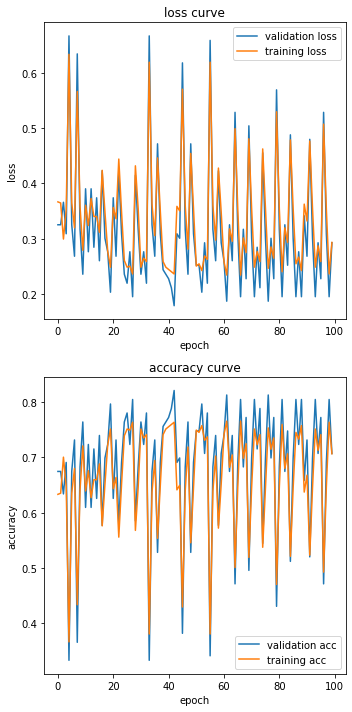

EPOCH 100 ITERATION 1 LR0.1
weight  [-18.16883685   3.1584053    3.10112453 -17.59653063 -25.21558856
  -2.69330008 -20.6337195  -19.63822807]
train acc: 0.63340 val acc: 0.67480 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.36660 val loss: 0.32520
----
EPOCH 100 ITERATION 2 LR0.1
weight  [-1.06394233e+01 -4.23958365e+00 -1.03516939e-02 -7.64703729e+00
 -1.15321377e+01 -3.46558089e+00 -9.70767346e+00 -1.14182279e+01]
train acc: 0.63340 val acc: 0.67480 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.36660 val loss: 0.32520
----
EPOCH 100 ITERATION 3 LR0.1
weight  [ -3.11000985 -11.6375726   -3.12182791   2.30245605   2.1513131
  -4.2378617    1.21837257  -3.19822781]
train acc: 0.61100 val acc: 0.56911 best acc: 0.82114 

EPOCH 100 ITERATION 28 LR0.1
weight  [ -4.3688306  -28.01646551   2.9781743    3.61154033   8.63452192
 -16.89897061  -3.01758269  -0.38823169]
train acc: 0.51324 val acc: 0.48780 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.48676 val loss: 0.51220
----
EPOCH 100 ITERATION 29 LR0.1
weight  [-17.5747153  -23.14963196   5.75194554 -10.20967099 -10.52268846
 -18.0213247  -19.09034066 -14.72489885]
train acc: 0.64766 val acc: 0.69106 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.35234 val loss: 0.30894
----
EPOCH 100 ITERATION 30 LR0.1
weight  [-10.0982429  -29.94108841   2.96342022  -0.43492505   2.77589255
 -18.55053551  -8.2393587   -6.70156545]
train acc: 0.75560 val acc: 0.80488 best acc: 0.82114 best epoch:50 best l

EPOCH 100 ITERATION 52 LR0.1
weight  [ -8.8629452  -25.49887745   5.60604734  -1.42482711   3.30591082
 -19.95441511 -10.64619509  -5.10823528]
train acc: 0.76578 val acc: 0.80488 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.23422 val loss: 0.19512
----
EPOCH 100 ITERATION 53 LR0.1
weight  [ -5.4100031  -25.05515886   5.11096553   1.77416252   8.29314472
 -19.52565257  -6.72450458  -1.25490194]
train acc: 0.66191 val acc: 0.67480 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.33809 val loss: 0.32520
----
EPOCH 100 ITERATION 54 LR0.1
weight  [-10.92765145 -20.99787294   6.87654002  -4.63189718  -0.75744641
 -18.99241852 -14.14414592  -7.0382353 ]
train acc: 0.67413 val acc: 0.73984 best acc: 0.82114 best epoch:50 best l

EPOCH 100 ITERATION 78 LR0.1
weight  [ -9.3629413  -29.50942925   5.06998559   0.36809812   5.27209814
 -22.04130606  -9.3393678   -6.29823904]
train acc: 0.75153 val acc: 0.79675 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.24847 val loss: 0.20325
----
EPOCH 100 ITERATION 79 LR0.1
weight  [ -6.8805876  -28.10239425   5.02736302   1.71557276   7.59621144
 -21.64130654  -7.57122149  -3.21490573]
train acc: 0.72709 val acc: 0.72358 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.27291 val loss: 0.27642
----
EPOCH 100 ITERATION 80 LR0.1
weight  [ -8.8923529  -24.79485697   6.15195378  -1.56725503   3.39361081
 -21.03296072 -11.07532083  -4.87490572]
train acc: 0.76171 val acc: 0.80488 best acc: 0.82114 best epoch:50 best l

EPOCH 100 ITERATION 1 LR0.001
weight  [0.361637   0.73962153 0.62774699 0.36346904 0.16726237 0.61250217
 0.22687414 0.68647299]
train acc: 0.31365 val acc: 0.24390 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.68635 val loss: 0.75610
----
EPOCH 100 ITERATION 2 LR0.001
weight  [ 0.17734285  0.74279238  0.63815683  0.20143874 -0.0595887   0.57659011
  0.03978277  0.48387298]
train acc: 0.26273 val acc: 0.25203 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.73727 val loss: 0.74797
----
EPOCH 100 ITERATION 3 LR0.001
weight  [ 0.03934283  0.69673209  0.61743551  0.09200438 -0.20590548  0.53098058
 -0.07919075  0.32523964]
train acc: 0.38900 val acc: 0.44715 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975

EPOCH 100 ITERATION 28 LR0.001
weight  [-0.08201005 -0.2628708  -0.00195806  0.04451915 -0.00908523 -0.06029368
 -0.01535562  0.01230623]
train acc: 0.69450 val acc: 0.66667 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.30550 val loss: 0.33333
----
EPOCH 100 ITERATION 29 LR0.001
weight  [-0.1185983  -0.21932306  0.01782883 -0.02412731 -0.0839032  -0.0690746
 -0.08393889 -0.03346044]
train acc: 0.69246 val acc: 0.73984 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.30754 val loss: 0.26016
----
EPOCH 100 ITERATION 30 LR0.001
weight  [-0.05277476 -0.26222256 -0.00202363  0.05840803  0.03393131 -0.07131455
  0.00870757  0.03583956]
train acc: 0.40937 val acc: 0.38211 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-1

EPOCH 100 ITERATION 53 LR0.001
weight  [-0.0431865  -0.25158438  0.03474689  0.03377162  0.08931187 -0.15629078
 -0.0379748   0.02223952]
train acc: 0.45214 val acc: 0.40650 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.54786 val loss: 0.59350
----
EPOCH 100 ITERATION 54 LR0.001
weight  [-0.19759829 -0.20582056  0.06343542 -0.12021827 -0.1267685  -0.17050388
 -0.21687317 -0.14669382]
train acc: 0.64155 val acc: 0.68293 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.35845 val loss: 0.31707
----
EPOCH 100 ITERATION 55 LR0.001
weight  [-0.12289239 -0.27585071  0.03435345 -0.02130919  0.00751991 -0.17669465
 -0.10729589 -0.06619382]
train acc: 0.74134 val acc: 0.78049 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-

EPOCH 100 ITERATION 79 LR0.001
weight  [-0.10712765 -0.29274518  0.04340266 -0.00825872  0.03487682 -0.20616117
 -0.1001277  -0.07422719]
train acc: 0.76578 val acc: 0.79675 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.23422 val loss: 0.20325
----
EPOCH 100 ITERATION 80 LR0.001
weight  [-0.06836293 -0.28886076  0.04323873  0.02520592  0.08445129 -0.20267831
 -0.06189201 -0.03216052]
train acc: 0.68432 val acc: 0.66667 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.31568 val loss: 0.33333
----
EPOCH 100 ITERATION 81 LR0.001
weight  [-0.11159824 -0.24925775  0.06155021 -0.03440013  0.00466405 -0.19833107
 -0.12923702 -0.07602719]
train acc: 0.71487 val acc: 0.76423 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-

EPOCH 100 ITERATION 1 LR0.0001
weight  [0.53009585 0.71763258 0.60526174 0.52674177 0.39801556 0.64255492
 0.4165159  0.871243  ]
train acc: 0.34420 val acc: 0.29268 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.65580 val loss: 0.70732
----
EPOCH 100 ITERATION 2 LR0.0001
weight  [0.51136644 0.71997329 0.60769125 0.50868318 0.37249546 0.63918264
 0.39554084 0.850723  ]
train acc: 0.34623 val acc: 0.29268 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.65377 val loss: 0.70732
----
EPOCH 100 ITERATION 3 LR0.0001
weight  [0.49264291 0.72221901 0.61008961 0.4907246  0.34707537 0.63583257
 0.37462538 0.83014966]
train acc: 0.34420 val acc: 0.29268 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.264698

EPOCH 100 ITERATION 29 LR0.0001
weight  [ 0.07520166  0.67244365  0.59924698  0.13696599 -0.14303267  0.53231381
 -0.02800911  0.36199297]
train acc: 0.29532 val acc: 0.38211 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.70468 val loss: 0.61789
----
EPOCH 100 ITERATION 30 LR0.0001
weight  [ 0.06546049  0.66600043  0.59536829  0.13109932 -0.15133716  0.52830904
 -0.03479963  0.3497863 ]
train acc: 0.30957 val acc: 0.39837 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.69043 val loss: 0.60163
----
EPOCH 100 ITERATION 31 LR0.0001
weight  [ 0.05667813  0.65929742  0.59111583  0.1259367  -0.15846198  0.52435062
 -0.04052764  0.33875297]
train acc: 0.31976 val acc: 0.39837 best acc: 0.82114 best epoch:50 best lr:1 best weight

EPOCH 100 ITERATION 56 LR0.0001
weight  [-0.0372454   0.47008086  0.4583781   0.09765077 -0.18448256  0.43081724
 -0.04902535  0.21004962]
train acc: 0.43585 val acc: 0.49593 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.56415 val loss: 0.50407
----
EPOCH 100 ITERATION 57 LR0.0001
weight  [-0.0389101   0.46237684  0.45285351  0.09798511 -0.18312086  0.42713006
 -0.04744926  0.20717629]
train acc: 0.43585 val acc: 0.49593 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.56415 val loss: 0.50407
----
EPOCH 100 ITERATION 58 LR0.0001
weight  [-0.04051599  0.45472508  0.44732892  0.09825885 -0.18175916  0.42338386
 -0.0459438   0.20432962]
train acc: 0.43585 val acc: 0.49593 best acc: 0.82114 best epoch:50 best lr:1 best weight

EPOCH 100 ITERATION 82 LR0.0001
weight  [-0.07294539  0.27206431  0.31492397  0.10590019 -0.14543435  0.33237298
 -0.00615448  0.14118627]
train acc: 0.43788 val acc: 0.48780 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.56212 val loss: 0.51220
----
EPOCH 100 ITERATION 83 LR0.0001
weight  [-0.07416892  0.26452662  0.30953217  0.10595474 -0.14410196  0.32839921
 -0.00464364  0.13859294]
train acc: 0.43788 val acc: 0.48780 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.56212 val loss: 0.51220
----
EPOCH 100 ITERATION 84 LR0.0001
weight  [-0.07536892  0.25701305  0.30415676  0.10597696 -0.14274901  0.32439712
 -0.00310436  0.13604294]
train acc: 0.43788 val acc: 0.49593 best acc: 0.82114 best epoch:50 best lr:1 best weight

EPOCH 100 ITERATION 1 LR1e-05
weight  [0.54694174 0.71543369 0.60301321 0.54306904 0.42109088 0.64556019
 0.43548008 0.88972   ]
train acc: 0.34827 val acc: 0.29268 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.65173 val loss: 0.70732
----
EPOCH 100 ITERATION 2 LR1e-05
weight  [0.54506997 0.71567801 0.60326305 0.5412549  0.41852695 0.64522627
 0.43337295 0.887667  ]
train acc: 0.34827 val acc: 0.29268 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.65173 val loss: 0.70732
----
EPOCH 100 ITERATION 3 LR1e-05
weight  [0.54319821 0.71592233 0.60351288 0.53944076 0.41596303 0.64489235
 0.43126582 0.885614  ]
train acc: 0.34827 val acc: 0.29268 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843 

EPOCH 100 ITERATION 29 LR1e-05
weight  [0.49453644 0.72181354 0.60972157 0.49269662 0.34984901 0.63615494
 0.3768606  0.83216966]
train acc: 0.34623 val acc: 0.29268 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.65377 val loss: 0.70732
----
EPOCH 100 ITERATION 30 LR1e-05
weight  [0.49266761 0.72202404 0.60993846 0.49091813 0.34733906 0.6358159
 0.37479561 0.83010566]
train acc: 0.34420 val acc: 0.29268 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.65580 val loss: 0.70732
----
EPOCH 100 ITERATION 31 LR1e-05
weight  [0.4907982  0.72222886 0.61015125 0.48914399 0.34483544 0.63547665
 0.37273112 0.82804466]
train acc: 0.34216 val acc: 0.29268 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.2646984

EPOCH 100 ITERATION 54 LR1e-05
weight  [0.44778996 0.72657439 0.61475912 0.44866137 0.28781539 0.62754762
 0.32540198 0.78079433]
train acc: 0.33809 val acc: 0.28455 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.66191 val loss: 0.71545
----
EPOCH 100 ITERATION 55 LR1e-05
weight  [0.4459176  0.7267461  0.61495174 0.44690874 0.28535234 0.6272065
 0.3233592  0.77874333]
train acc: 0.33809 val acc: 0.28455 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.66191 val loss: 0.71545
----
EPOCH 100 ITERATION 56 LR1e-05
weight  [0.44404525 0.72691781 0.61514436 0.44515611 0.28288929 0.62686539
 0.32131643 0.77669233]
train acc: 0.33605 val acc: 0.28455 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.2646984

EPOCH 100 ITERATION 78 LR1e-05
weight  [0.40295113 0.73019952 0.61913158 0.4069048  0.22908404 0.61924279
 0.27709048 0.73168933]
train acc: 0.33198 val acc: 0.26016 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.66802 val loss: 0.73984
----
EPOCH 100 ITERATION 79 LR1e-05
weight  [0.40108642 0.73033509 0.61930272 0.40517632 0.22665617 0.61889317
 0.27510115 0.72964599]
train acc: 0.32994 val acc: 0.26016 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
train loss: 0.67006 val loss: 0.73984
----
EPOCH 100 ITERATION 80 LR1e-05
weight  [0.39922348 0.73046218 0.6194701  0.40345116 0.2242383  0.61854296
 0.27311945 0.72760599]
train acc: 0.32994 val acc: 0.26829 best acc: 0.82114 best epoch:50 best lr:1 best weight:[-170.3334975  -218.264698

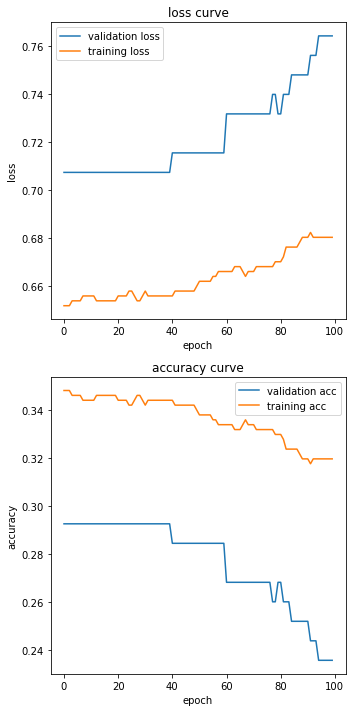

In [99]:
epoch_list = list(range(10,110,10))
lr = [1, 0.1, 0.001, 0.0001, 0.00001]

best_acc5 = 0
best_epoch5 = 0
best_lr5 = 0
best_weight5 = 0


for epoch_item in epoch_list:
    for l5 in lr:
        np.random.seed(0)
        initial_weight5 = np.random.rand(8)
        weight5 = initial_weight5
        val_loss_list5 = []
        train_loss_list5 = []
        val_acc_list5 = []
        train_acc_list5 = []
        for i in range(epoch_item):
            weight5 = update_weight(X_train, y_train, weight5, lr = l5)
            y_train_pred5 = make_prediction(X_train, y_train, weight5)
            y_val_pred5 = make_prediction(X_val, y_val, weight5)

            train_acc5 = accuracy_score(y_train, y_train_pred5)
            val_acc5 = accuracy_score(y_val, y_val_pred5)

            train_acc_list5.append(train_acc5)
            val_acc_list5.append(val_acc5)

            train_loss5 = zero_one_loss(X_train, y_train, weight5)
            val_loss5 = zero_one_loss(X_val, y_val, weight5)

            train_loss_list5.append(train_loss5)
            val_loss_list5.append(val_loss5)


            if val_acc5 > best_acc5:
                best_acc5 = val_acc5
                best_epoch5 = epoch_item
                best_lr5 = l5
                best_weight5 = weight5
                
            print('EPOCH %d'%(epoch_item) ,'ITERATION %d'%(i+1), f'LR{l5}')
            
            print('weight ', weight5)
            print('train acc: %.5f'%train_acc5, 'val acc: %.5f'%val_acc5, 
                  'best acc: %.5f'%best_acc5, f'best epoch:{best_epoch5}', 
                  f'best lr:{best_lr5}', f'best weight:{best_weight5}')
            print('train loss: %.5f'%train_loss5, 'val loss: %.5f'%val_loss5)

            print('----')
        print(f'sample= {n_samples} and feature = {n_features}') 

        print('EPOCH %d'%(epoch_item) ,'ITERATION %d'%(i+1), f'LR{l5}')
        plot_graph(epoch_item, val_loss_list5, train_loss_list5, val_acc_list5, train_acc_list5, figsize=(5,10))

In [116]:
# epoch_list = list(range(10,61,10))
# lr = [1, 0.1, 0.001, 0.0001, 0.00001]

# best_acc5b = 0
# best_epoch5b = 0
# best_lr5b = 0
# best_weight5b = 0


# for l5b in lr:
#     for epoch_item5 in epoch_list:
#         np.random.seed(0)
#         initial_weight5b = np.random.rand(9)
#         weight5b = initial_weight5b
#         val_loss_list5b = []
#         train_loss_list5b = []
#         val_acc_list5b = []
#         train_acc_list5b = []
#         for i in range(epoch_item5):
#             weight5b = update_weight(X_b_train, y_b_train, weight5b, lr=l5b)
#             y_train_pred5b = make_prediction(X_b_train, y_b_train, weight5b)
#             y_val_pred5b = make_prediction(X_b_val, y_b_val, weight5b)

#             train_acc5b = accuracy_score(y_b_train, y_train_pred5b)
#             val_acc5b = accuracy_score(y_b_val, y_val_pred5b)

#             train_acc_list5b.append(train_acc5b)
#             val_acc_list5b.append(val_acc5b)

#             train_loss5b = zero_one_loss(X_b_train, y_b_train, weight5b)
#             val_loss5b = zero_one_loss(X_b_val, y_b_val, weight5b)

#             train_loss_list5b.append(train_loss5b)
#             val_loss_list5b.append(val_loss5b)

#             if val_acc5b > best_acc5b:
#                 best_acc5b = val_acc5b
#                 best_epoch5b = epoch_item5
#                 best_lr5b = l5b
#                 best_weight5b = weight5b
            
#             print('EPOCH %d'%(epoch_item5) ,'ITERATION %d'%(i+1), f'LR{l5b}')

            
#             print('weight ', weight5b)

#             print('train acc: %.5f'%train_acc5b, 'val acc: %.5f'%val_acc5b, 
#                   'best acc: %.5f'%best_acc5b, f'best epoch:{best_epoch5b}', f'best lr:{best_lr5b}', 
#                   f'best weight:{best_weight5b}')
                  
#             print('train loss: %.5f'%train_loss5b, 'val loss: %.5f'%val_loss5b)

#             print('----')
#         print(f'sample= {n_samples_b}, feature = {n_features_b} included bias')
#         print('EPOCH %d'%(epoch_item5),'ITERATION %d'%(i+1), f'LR {l5b}')
#         plot_graph(epoch_item5, val_loss_list5b, train_loss_list5b, val_acc_list5b, train_acc_list5b, figsize=(5,10))

In [66]:
# from sklearn.linear_model import Perceptron
# clf = Perceptron(tol=1e-3, random_state=0)
# clf.fit(X_trainval, y_trainval)
# Perceptron()
# y_pred_sk = clf.predict(X_test)
# clf.score(X_test, y_test)


In [67]:
# accuracy = accuracy_score(y_test, y_pred_sk ) # accuracy: (tp + tn) / (p + n)
# print('Accuracy: %f' % accuracy)

# precision = precision_score(y_test, y_pred_sk) # precision tp / (tp + fp)
# print('Precision: %f' % precision)

# recall = recall_score(y_test, y_pred_sk) # recall: tp / (tp + fn)
# print('Recall: %f' % recall)

# f1 = f1_score(y_test, y_pred_sk) # f1: 2 tp / (2 tp + fp + fn)
# print('F1 score: %f' % f1)

In [68]:
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_pred_sk))

In [86]:
# from sklearn.metrics import confusion_matrix
# print(confusion_matrix(y_test,y_pred_sk))
# sns.heatmap(confusion_matrix(y_test,y_pred_sk),annot=True)



# test on experiment 6

In [27]:
# EPOCH 40 ITERATION 36 LR0.001 bias=Y

In [105]:
# optimal_epoch = 40
# optimal_lr = 0.01
print(best_weight5)
optimal_weight = best_weight5


y_test_pred = make_prediction(X_test, y_test, optimal_weight)

test_acc = accuracy_score(y_test, y_test_pred)

print('test acc: %.5f'%test_acc)


[-170.3334975  -218.26469843   50.71757198  -81.26331232  -81.6993944
 -192.98609377 -183.10730743 -138.0416596 ]
test acc: 0.70130


In [103]:
# # optimal_epoch = 40
# # optimal_lr = 0.01
# print(best_weight5b)
# optimal_weightb = best_weight5b


# y_test_pred = make_prediction(X_b_test, y_b_test, optimal_weightb)

# test_acc_b = accuracy_score(y_b_test, y_test_pred)

# print('test acc: %.5f'%test_acc_b)


[-230.8629115  -317.18427581   87.35693018 -118.50576562 -129.3566174
 -276.70741449 -265.77343111 -184.1750069   194.96366276]
test acc: 0.68831


In [106]:
accuracy = accuracy_score(y_test, y_test_pred ) # accuracy: (tp + tn) / (p + n)
print('Accuracy: %f' % accuracy)

precision = precision_score(y_test, y_test_pred) # precision tp / (tp + fp)
print('Precision: %f' % precision)

recall = recall_score(y_test, y_test_pred) # recall: tp / (tp + fn)
print('Recall: %f' % recall)

f1 = f1_score(y_test, y_test_pred) # f1: 2 tp / (2 tp + fp + fn)
print('F1 score: %f' % f1)

Accuracy: 0.701299
Precision: 0.695364
Recall: 1.000000
F1 score: 0.820312


In [107]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

        -1.0       1.00      0.06      0.12        49
         1.0       0.70      1.00      0.82       105

    accuracy                           0.70       154
   macro avg       0.85      0.53      0.47       154
weighted avg       0.79      0.70      0.60       154



In [108]:
from sklearn.metrics import confusion_matrix

In [109]:
c_matrix = confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(c_matrix, annot = True, xticklabels = ['No Diabetes', 'Diabetes'], yticklabels = ['No Diabetes', 'Diabetes'], cbar = False, cmap = 'Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()
plt.clf()

<Figure size 432x288 with 0 Axes>